# Housekeeping

In [2]:
sessionInfo()
options(repr.plot.width=14,repr.plot.antialias='subpixel',repr.plot.res=218)
update.packages()

R version 4.0.3 Patched (2020-10-12 r79333)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_4.0.3  ellipsis_0.3.1  IRdisplay_0.7.0 pbdZMQ_0.3-3   
 [5] tools_4.0.3     htmltools_0.5.0 pillar_1.4.6    base64enc_0.1-3
 [9] crayon_1.3.4    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.7.1 
[13] digest_0.6.25   lifecycle_0.2.0 repr_1.1.0      rlang_0.4.8    
[17] evaluate_0.14  

# Orange Juice Regressions

Read in the data and look around.

In [3]:
oj <- read.csv("oj.csv") 
oj$brand <- factor(oj$brand)
head(oj)
levels(oj$brand)

sales price brand     feat
1 8256  3.87  tropicana 0   
2 6144  3.87  tropicana 0   
3 3840  3.87  tropicana 0   
4 8000  3.87  tropicana 0   
5 8896  3.87  tropicana 0   
6 7168  3.87  tropicana 0

[1] "dominicks"   "minute.maid" "tropicana"

We associate a triplet of colors with the brands, and plot a continuous variable against a discrete list of categories/factors or another continuous variable:

In [ ]:
brandcol <- c("green","red","gold")
par(mfrow=c(1,2))
plot(log(price) ~ brand, data=oj, col=brandcol)
plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand])

Old-school regression:

In [5]:
reg = glm(log(sales) ~ log(price) + brand, data=oj)

Though have a careful look at what it did, especially for the factors we included:

In [6]:
summary(reg) ## coef, tests, fit
coef(reg) ## just coefficients


Call:
glm(formula = log(sales) ~ log(price) + brand, data = oj)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3152  -0.5246  -0.0502   0.4929   3.5088  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.82882    0.01453  745.04   <2e-16 ***
log(price)       -3.13869    0.02293 -136.89   <2e-16 ***
brandminute.maid  0.87017    0.01293   67.32   <2e-16 ***
brandtropicana    1.52994    0.01631   93.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6296804)

    Null deviance: 30079  on 28946  degrees of freedom
Residual deviance: 18225  on 28943  degrees of freedom
AIC: 68765

Number of Fisher Scoring iterations: 2


(Intercept)       log(price) brandminute.maid   brandtropicana 
      10.8288216       -3.1386914        0.8701747        1.5299428

For practice, we can build the design matrix ourselves, and check three lines, say lines number 100, 200, and 300. You can compare it to the original lines of the data frame.

In [7]:
x <- model.matrix( ~ log(price) + brand, data=oj)
x[c(100,200,300),]
oj[c(100,200,300),]

(Intercept) log(price) brandminute.maid brandtropicana
100 1           1.1600209  0                1             
200 1           1.0260416  1                0             
300 1           0.3293037  0                0

sales price brand       feat
100  4416 3.19  tropicana   0   
200  5440 2.79  minute.maid 0   
300 51264 1.39  dominicks   1

We can save the coefficients separately. And what is more, we can see how the different constants for the three brands shift the regression line around. But our modeled assumed (allowed) the same price elasticity for the three brands.

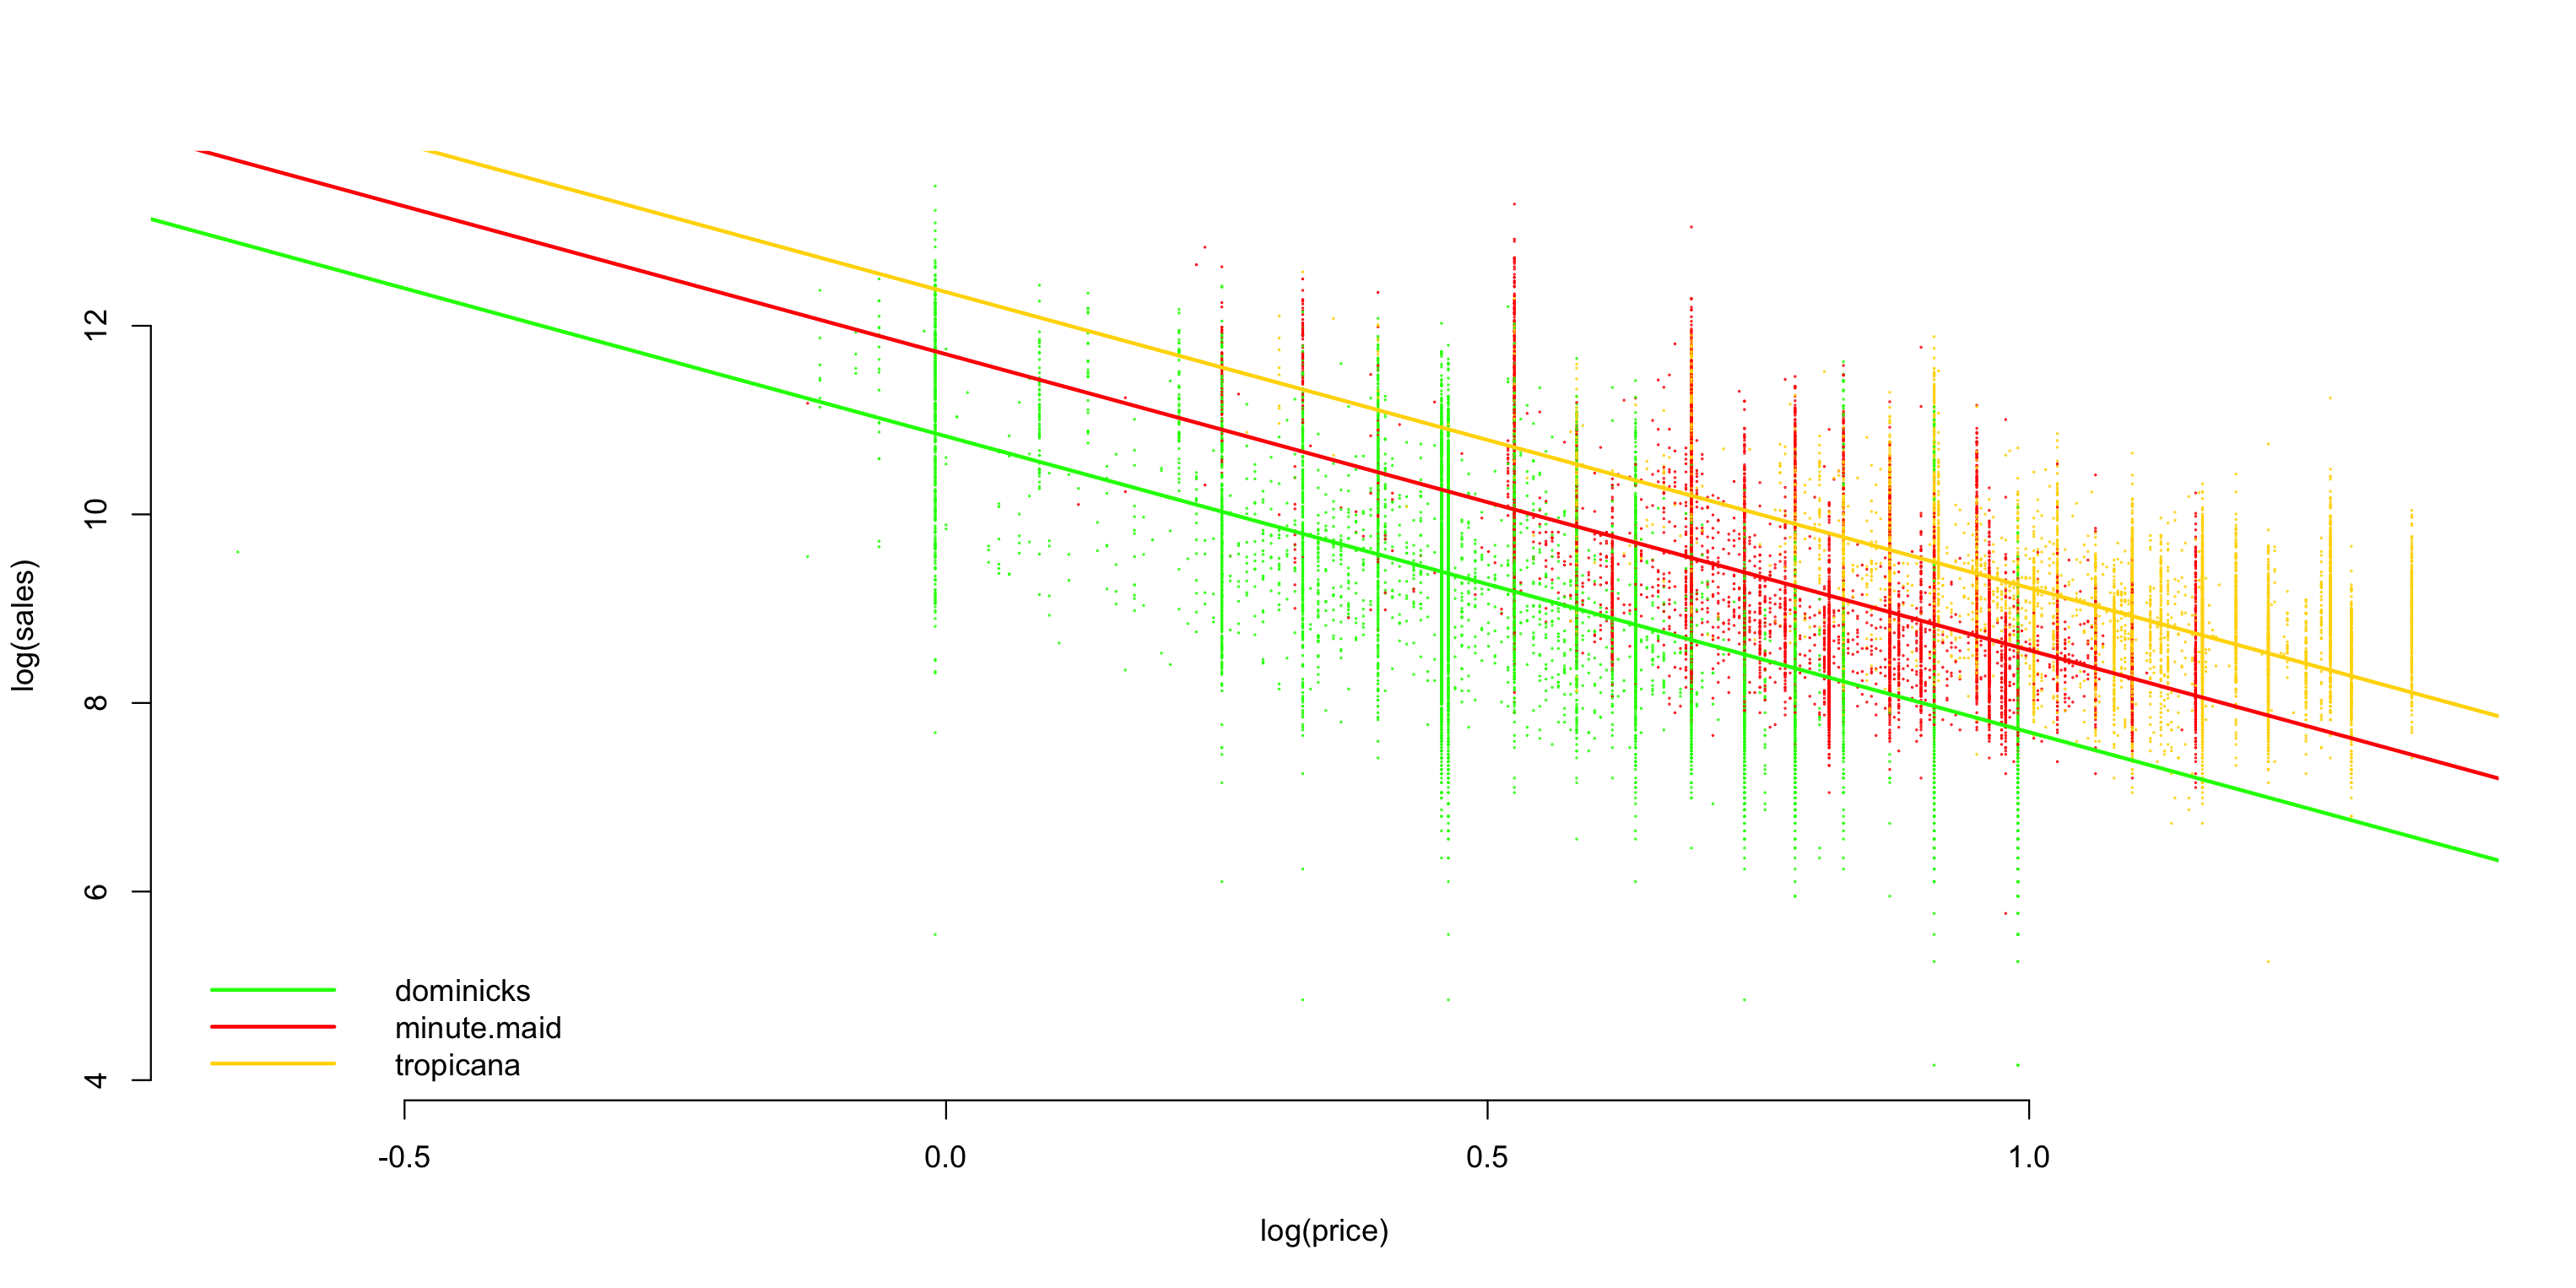

In [8]:
beta <- coef(reg)

plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand], 
	cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=brandcol[1], lwd=2)
abline(a=beta[1]+beta[3], b=beta[2], col=brandcol[2], lwd=2)
abline(a=beta[1]+beta[4], b=beta[2], col=brandcol[3], lwd=2)
legend("bottomleft", bty="n", lwd=2, col=brandcol, legend=levels(oj$brand))

This is what we relax with interactions.


The `*` shorthand of R is very handy, but don't forget it includes the main effects as well.

Our new model first has a name, but then we can have a look at the coefficient or save them and plot the corresponding regression lines.

(Intercept)                  log(price) 
                10.95468173                 -3.37752963 
           brandminute.maid              brandtropicana 
                 0.88825363                  0.96238960 
log(price):brandminute.maid   log(price):brandtropicana 
                 0.05679476                  0.66576088

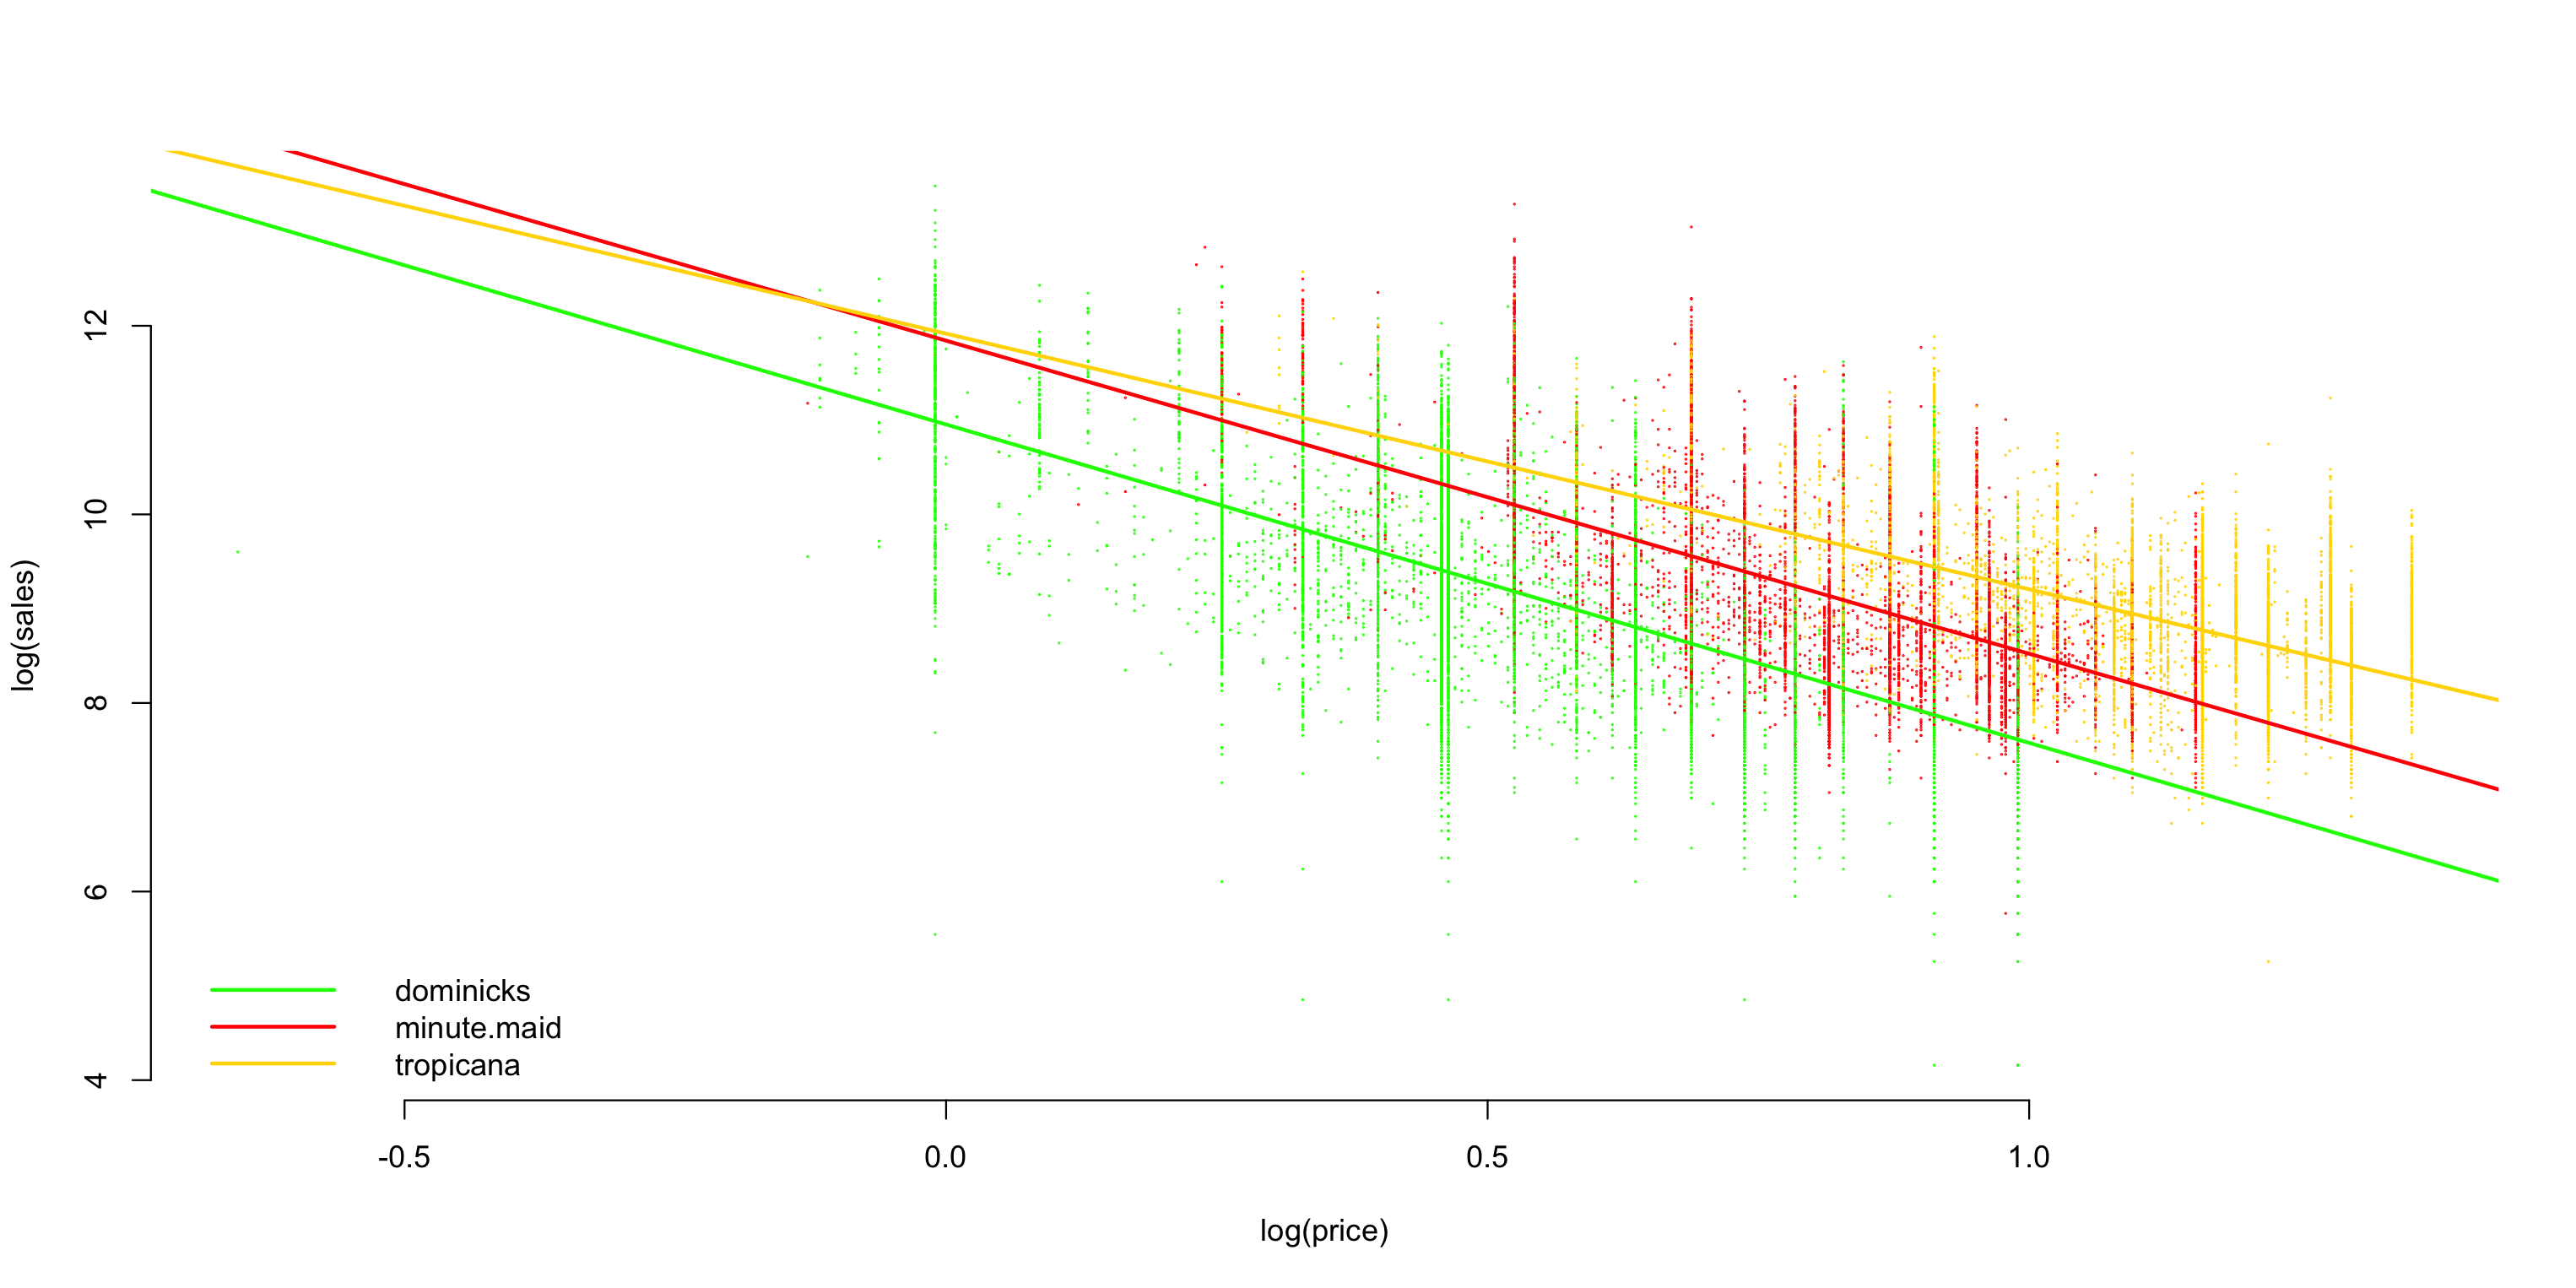

In [9]:
reg_interact = glm(log(sales) ~ log(price)*brand, data=oj)
coef(reg_interact)
## compare brand-specific log(price) slopes to our earlier elasticity (-3.1)
beta <- coef(reg_interact)

plot(log(sales) ~ log(price), data=oj, col=brandcol[oj$brand], 
	cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=brandcol[1], lwd=2)
abline(a=beta[1]+beta[3], b=beta[2]+beta[5], col=brandcol[2], lwd=2)
abline(a=beta[1]+beta[4], b=beta[2]+beta[6], col=brandcol[3], lwd=2)
legend("bottomleft", bty="n", lwd=2, col=brandcol, legend=levels(oj$brand))

It is easy to go overboard, say, consider 3-way interactions.

Let's list the coefficients. Make sure you understand how they would add up for each specific observations (predicting sales for a brand promoted but sold at a specific price).

In [10]:
ojreg <- glm(log(sales) ~ log(price)*brand*feat, data=oj)
coef(ojreg)

(Intercept)                       log(price) 
                     10.40657579                      -2.77415436 
                brandminute.maid                   brandtropicana 
                      0.04720317                       0.70794089 
                            feat      log(price):brandminute.maid 
                      1.09440665                       0.78293210 
       log(price):brandtropicana                  log(price):feat 
                      0.73579299                      -0.47055331 
           brandminute.maid:feat              brandtropicana:feat 
                      1.17294361                       0.78525237 
log(price):brandminute.maid:feat   log(price):brandtropicana:feat 
                     -1.10922376                      -0.98614093

Here are the elasticities for different cases (Table 2.2 in the book):

In [11]:
b <- coef(ojreg)
b["log(price)"] 
b["log(price)"] + b["log(price):brandminute.maid"]
b["log(price)"] + b["log(price):brandtropicana"]
b["log(price)"] + b["log(price):feat"] 
b["log(price)"] + b["log(price):brandminute.maid"] + b["log(price):feat"] + b["log(price):brandminute.maid:feat"]
b["log(price)"] + b["log(price):brandtropicana"] + b["log(price):feat"] + b["log(price):brandtropicana:feat"]

log(price) 
 -2.774154

log(price) 
 -1.991222

log(price) 
 -2.038361

log(price) 
 -3.244708

log(price) 
 -3.570999

log(price) 
 -3.495056

Here is the chart showing you which brands sold more advertised and which not, which confounded are brand-specific elasticity estimates when we did not control for marketing campaigns.

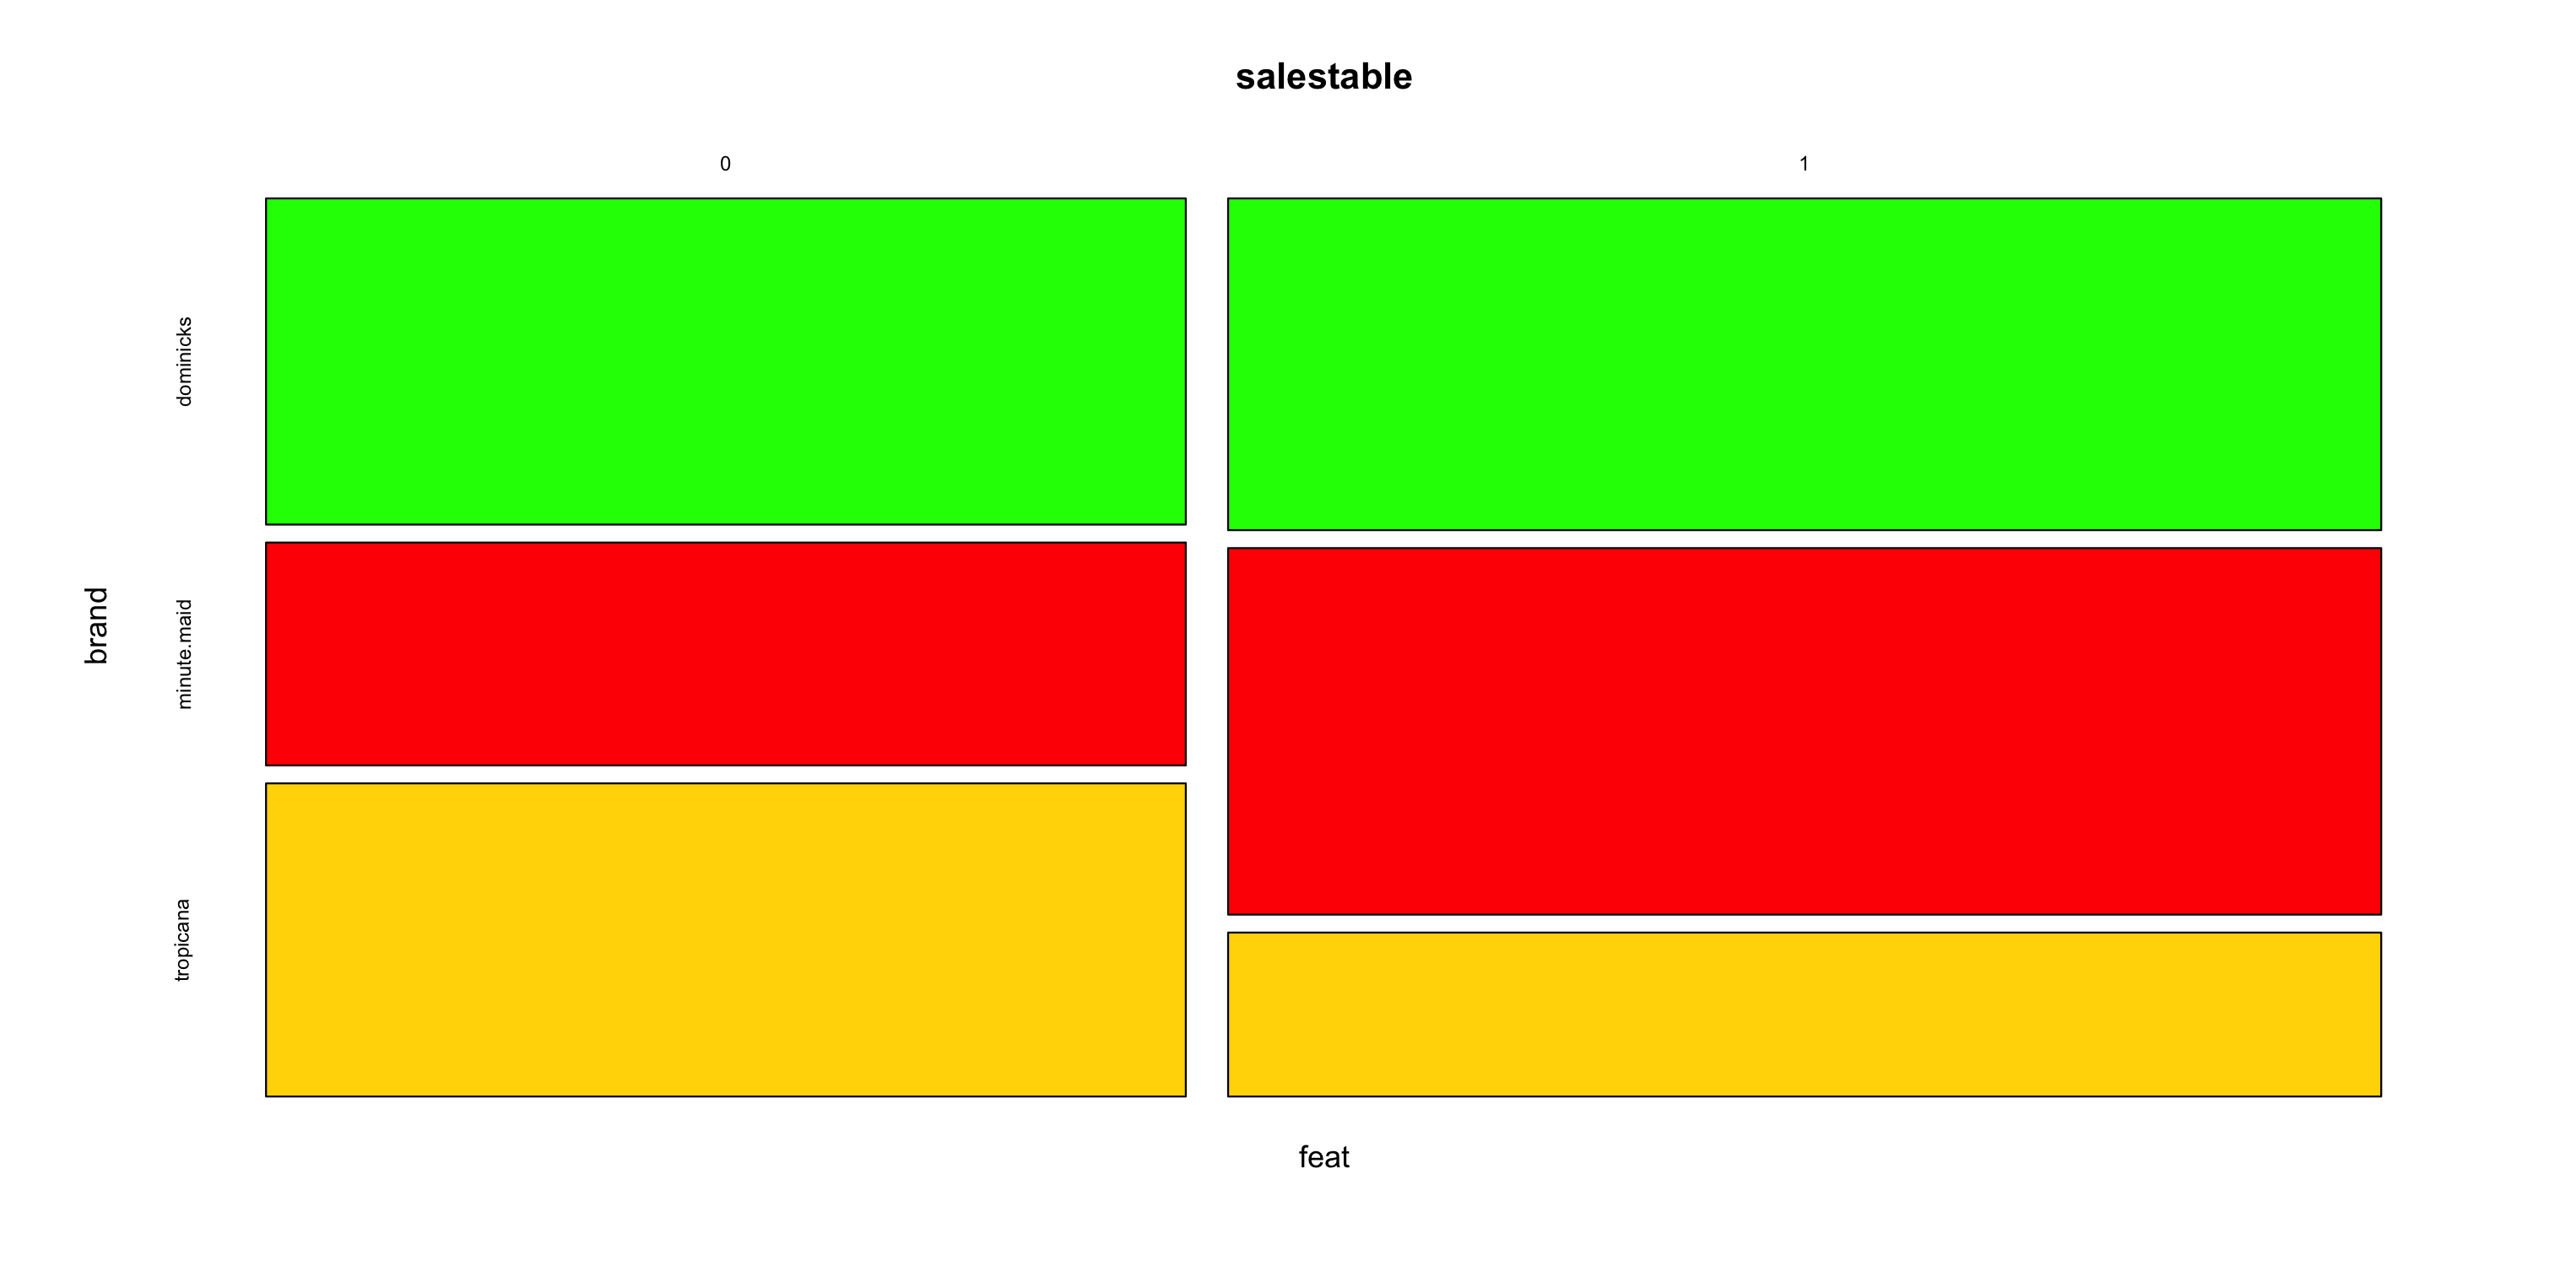

In [12]:
salestable <- tapply(oj$sales, oj[,c("feat","brand")], sum)
mosaicplot(salestable,col=brandcol)

## Fit plots and R2

Jumping ahead a little in the book, here are fit statistics for the orange juice analysis.

We can plot the predicted values of the model against the true observations. The square of their correlation should be the in-sample R2 for the linear case (as on page 56).

In [ ]:
plot(ojreg$fitted ~ log(oj$sales), col=brandcol[oj$brand], bty="n")
abline(a=0,b=1)#  add a line with slope 1, intercept 0
legend("topleft",legend=levels(oj$brand),fill=brandcol, bty="n")
cor(ojreg$fitted,log(oj$sales))^2

[1] 0.5353939

# The logistic regression of spam

New data:

In [14]:
email <- read.csv("spam.csv")
email$spam <- factor(email$spam)

Full model:

In [15]:
spammy <- glm(spam ~ ., data=email, family='binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Recall the example from the book that in this old spam data, the recipient's name was a good predictor of a message not being spam, while the word free occurred as often in spam as not. Here are the contingency tables:

In [16]:
table(email$spam, email$word_george)
table(email$spam, email$word_free)

   
       0    1
  0 2016  772
  1 1805    8

   
       0    1
  0 2536  252
  1  824  989

The estimated coefficients reflect these correlations:

In [17]:
b <- coef(spammy)
exp(b["word_george"]) # George => !SPAM
exp(b["word_free"]) # Free => SPAM

word_george 
0.003089205

word_free 
 4.677229

This is how you plot fitted (estimated) probabilities from a logistic model against the original categories.

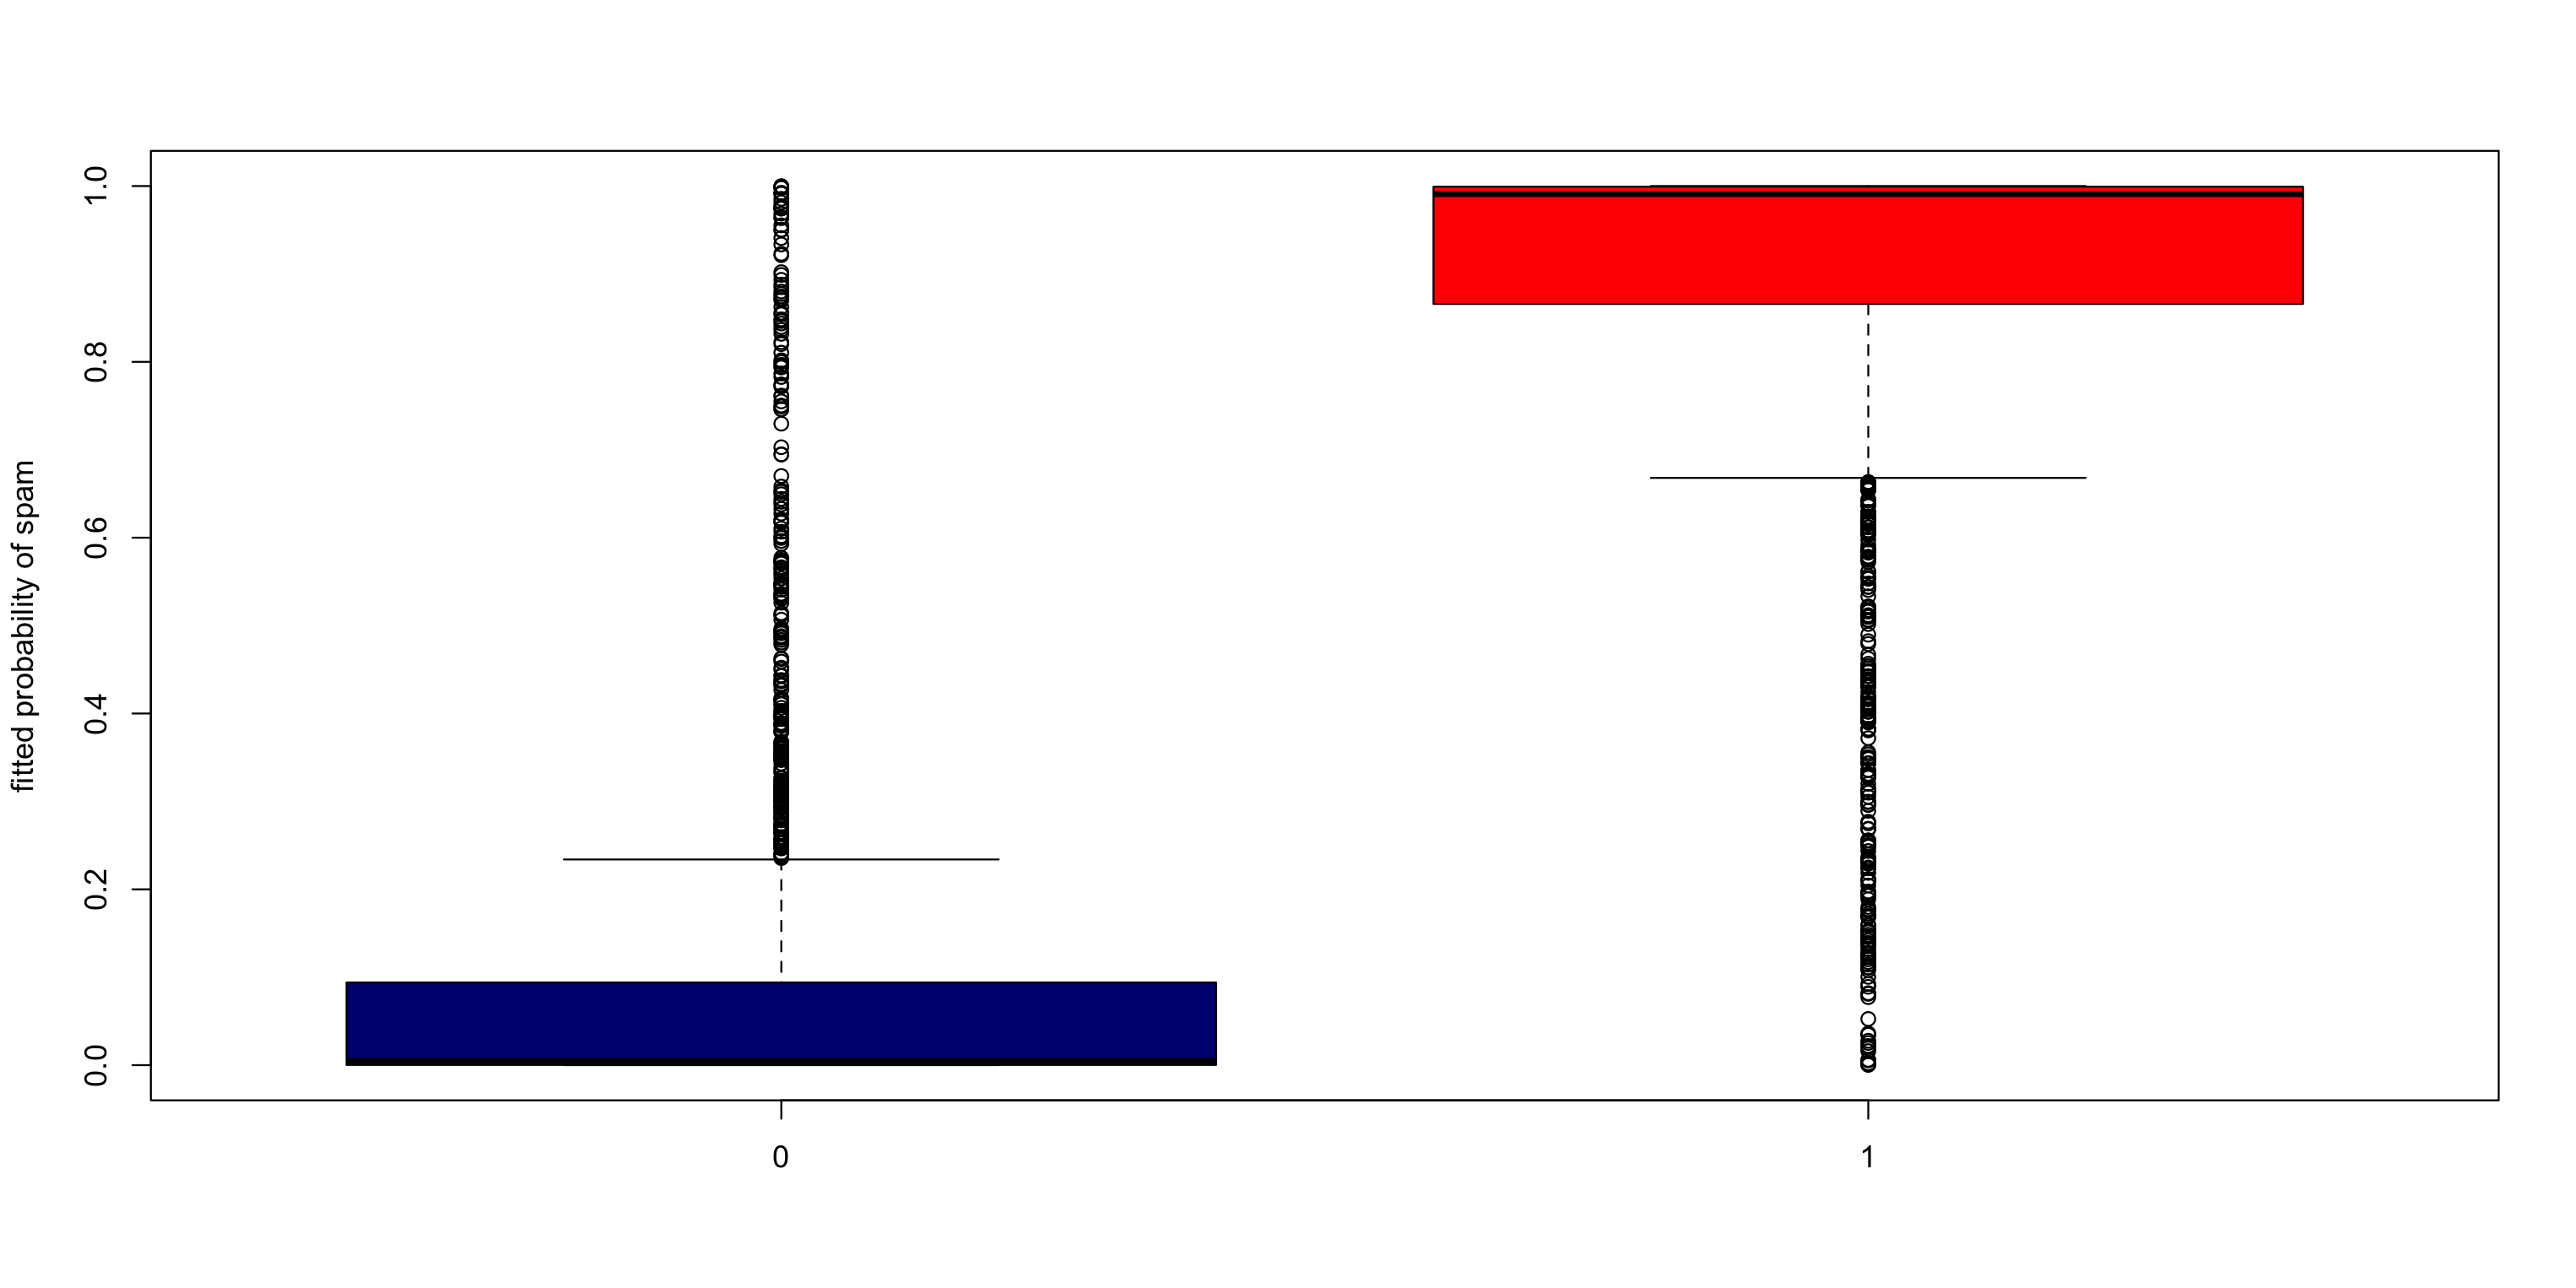

In [18]:
plot(spammy$fit~email$spam, 
	xlab="", ylab=c("fitted probability of spam"), 
	col=c("navy","red"))

We can have a look at prediction for 2 observations. Remember how to convert these into probabilities.

In [19]:
predict(spammy, newdata=email[c(1,4000),])
predict(spammy, newdata=email[c(1,4000),], type="response")

1      4000 
 2.029963 -1.726788

1      4000 
0.8839073 0.1509989

### Out-of-sample predictions

Take 1000 indices at random:

In [20]:
leaveout <- sample(1:nrow(email), 1000)

Now estimate/fit/train the model without these observations (-index removes those).

In [21]:
spamtrain <- glm(spam ~ ., data=email[-leaveout,], family='binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


But get the predicted probability of spam for the left out data (using the model's coefficients on the left-out data's numbers).

In [22]:
pspam <- predict(spamtrain, newdata=email[leaveout,], type="response")

Plot the out-of-sample fit

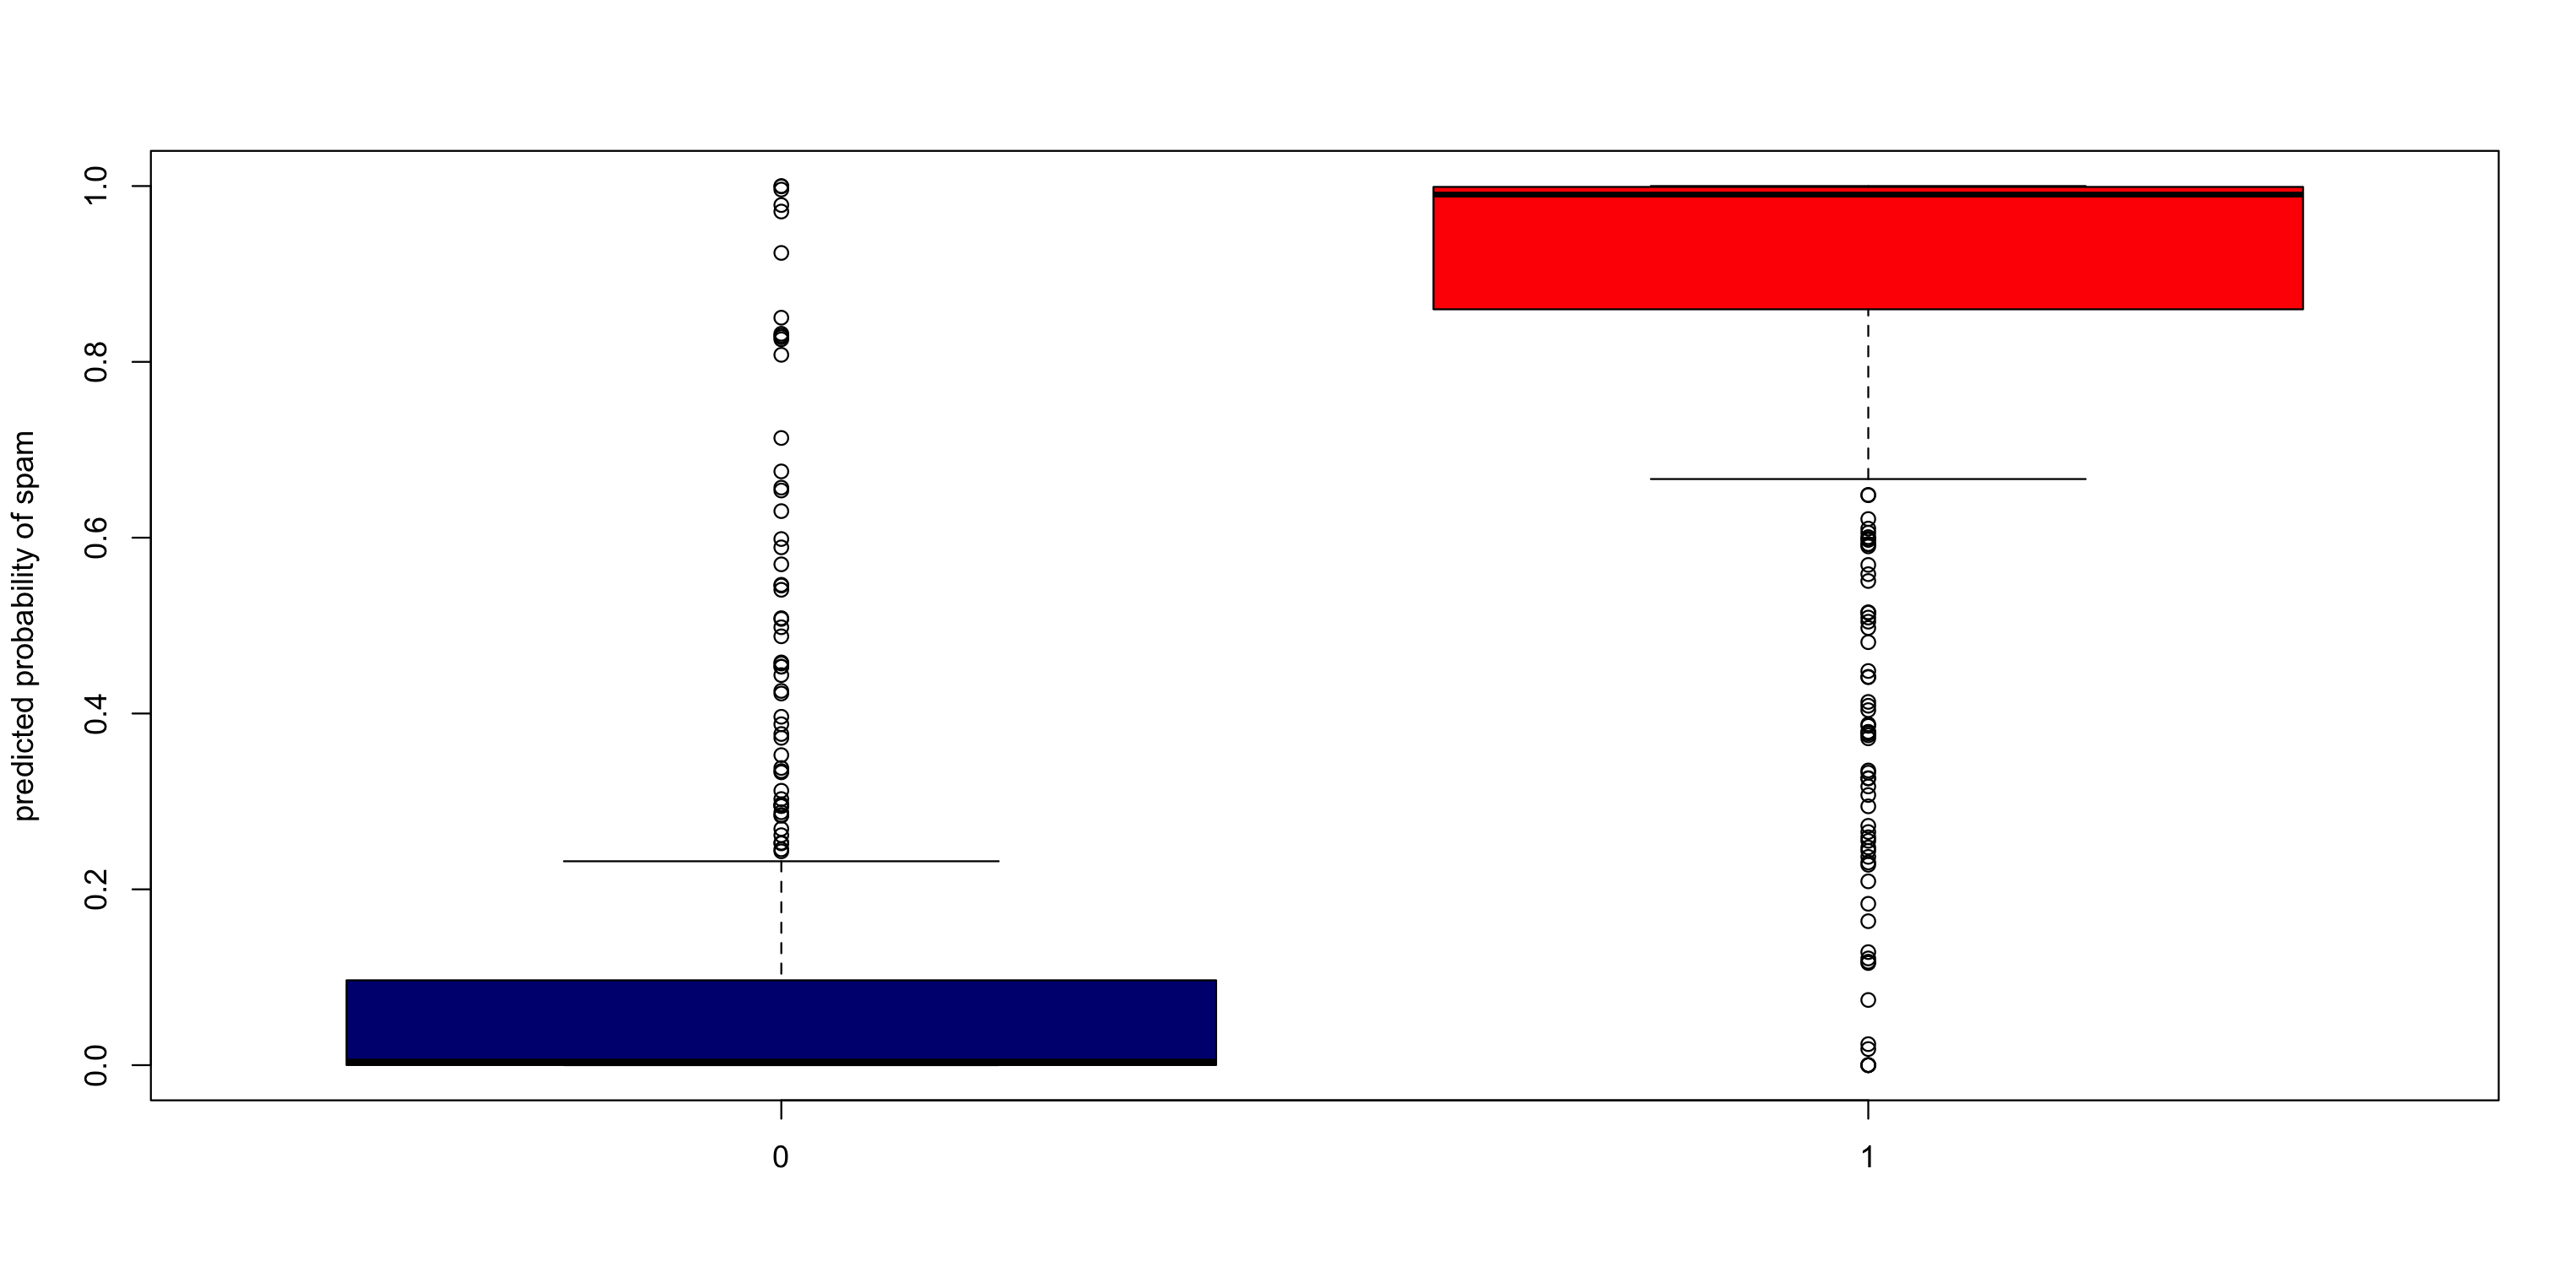

In [23]:
plot(pspam ~ email$spam[leaveout],
	xlab="", ylab=c("predicted probability of spam"), 
	col=c("navy","red"))

We can go back to the `deviance` for calculating deviance between real observations and a prediction. It does not matter whether these predictions were in-sample or out-of. Just remember to specify the family correctly.

In [24]:
source("deviance.R")
D <- deviance(y=email$spam[leaveout], pred=pspam, family="binomial")

For the null deviance, we need to generate our prediction as the mean for spam

In [25]:
ybar <- mean(email$spam[-leaveout]==1)
D0 <- deviance(y=email$spam[leaveout], pred=ybar, family="binomial")

Now we can compare the out-of-sample R2 to in-sample one in the model summary.

In [26]:
1 - D/D0  
summary(spamtrain)

[1] 0.6327254


Call:
glm(formula = spam ~ ., family = "binomial", data = email[-leaveout, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1068  -0.1699  -0.0034   0.0696   3.7799  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.028e+00  1.653e-01 -12.270  < 2e-16 ***
word_make                  -6.197e-01  2.732e-01  -2.269 0.023276 *  
word_address               -1.971e-01  2.538e-01  -0.776 0.437535    
word_all                   -5.269e-01  2.007e-01  -2.625 0.008663 ** 
word_3d                     9.942e-01  1.210e+00   0.822 0.411089    
word_our                    1.088e+00  1.968e-01   5.528 3.24e-08 ***
word_over                   3.071e-01  2.556e-01   1.202 0.229501    
word_remove                 2.242e+00  3.017e-01   7.433 1.07e-13 ***
word_internet               6.132e-01  2.800e-01   2.190 0.028527 *  
word_order                  2.672e-01  2.979e-01   0.897 0.369826    
word_mail        

In [27]:
1-1226.7/4841.8

[1] 0.7466438

# Regression uncertainty

In [28]:
data(airquality)
fit <- lm(Ozone ~ ., data=airquality)
summary(fit)$coef["Wind",]

Estimate    Std. Error       t value      Pr(>|t|) 
-3.318444e+00  6.445095e-01 -5.148789e+00  1.231276e-06

In [29]:
install.packages("AER")
library(AER)
bvar <- vcovHC(fit)
round(bvar,1)


The downloaded binary packages are in
	/var/folders/dk/2_0472cd7h35shgpvb9y6g6xp8980h/T//RtmpfCmWRv/downloaded_packages


Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



(Intercept) Solar.R Wind  Temp Month Day 
(Intercept) 432.9       0.1     -13.3 -3.6 -3.2   0.3
Solar.R       0.1       0.0       0.0  0.0  0.0   0.0
Wind        -13.3       0.0       0.8  0.1 -0.2  -0.1
Temp         -3.6       0.0       0.1  0.1 -0.1   0.0
Month        -3.2       0.0      -0.2 -0.1  1.8   0.0
Day           0.3       0.0      -0.1  0.0  0.0   0.1

In [30]:
sqrt(bvar["Wind","Wind"])

[1] 0.9128877

[1] 0.8703056

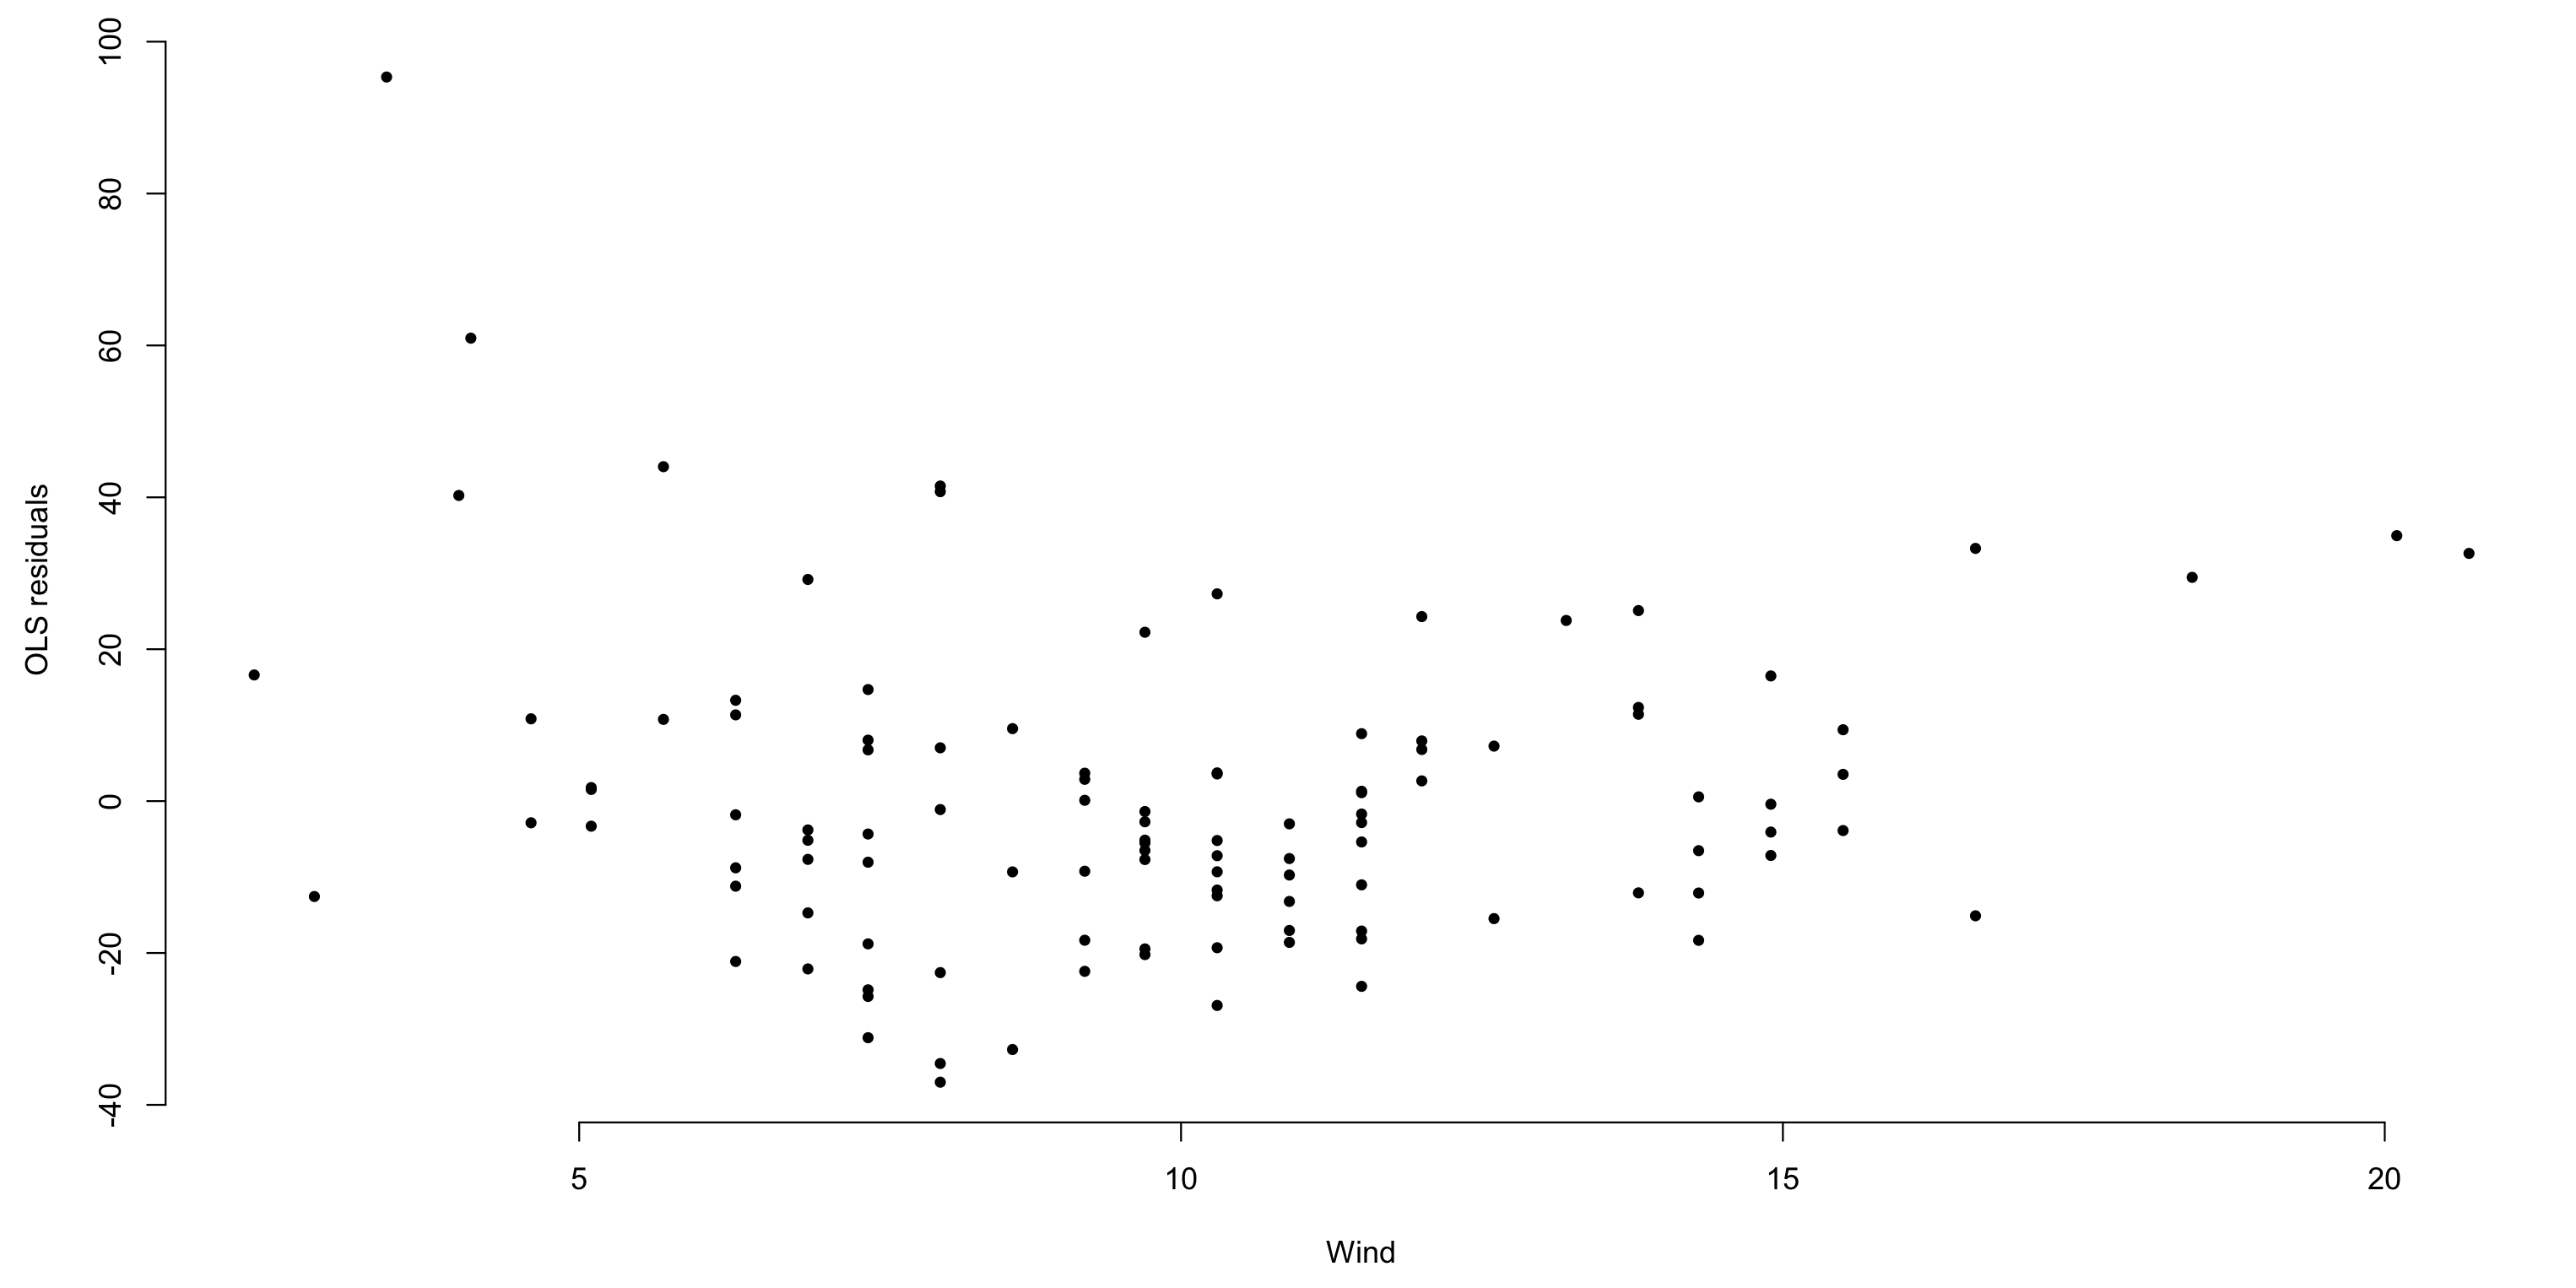

In [31]:
par(mai=c(.9,.9,.2,.1))
plot(na.omit(airquality)$Wind, fit$residuals, pch=20, bg=8, bty="n",
	xlab="Wind", ylab="OLS residuals")

B <- 10000
beta <- vector(length=B)
n <- nrow(airquality)
for(b in 1:B){
  bs = sample.int(n,n,replace=TRUE)
  bsfit <- lm(Ozone ~., data=airquality, subset=bs)
  beta[b] <- coef(bsfit)["Wind"] }
sd(beta)

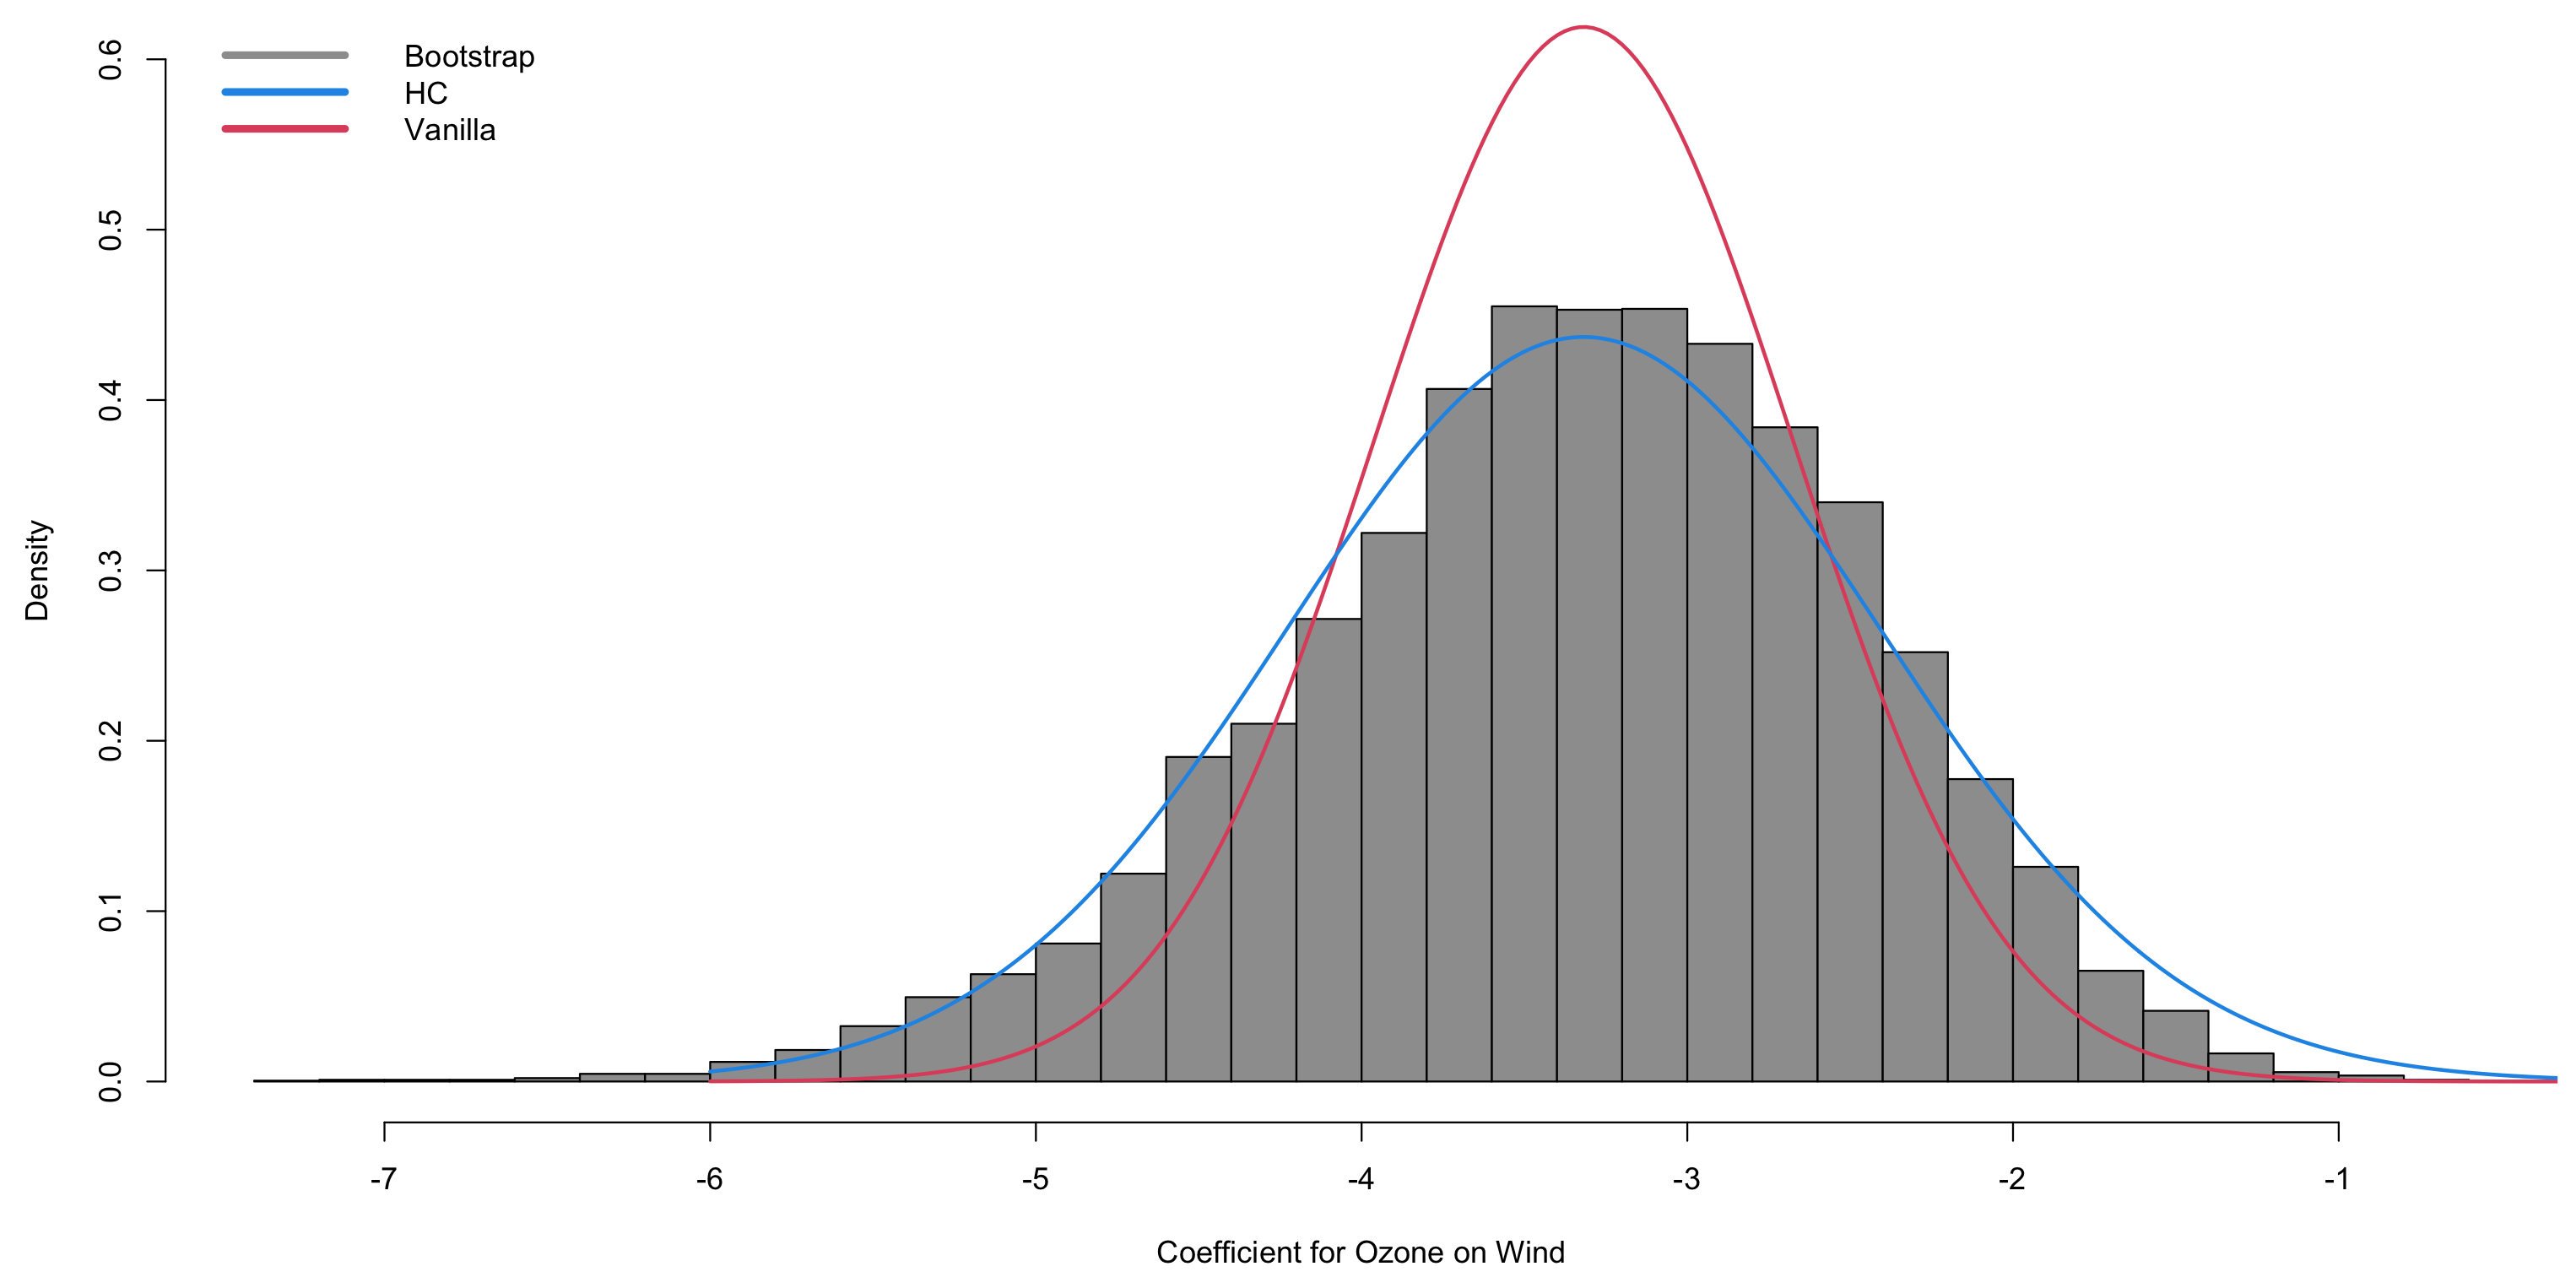

In [32]:
coef <- summary(fit)$coef["Wind",1:2]
par(mai=c(.9,.9,.1,.1))
hist(beta, col=8, main="", 
  xlab="Coefficient for Ozone on Wind", 
  freq=FALSE,ylim=c(0,0.6),breaks=25)
grid <- seq(-6,5,length=500)
lines(grid, dnorm(grid,coef[1],coef[2]),col=2,lwd=2)
lines(grid, dnorm(grid,coef[1],sqrt(bvar["Wind","Wind"])),col=4,lwd=2)
legend("topleft",col=c(8,4,2),lwd=4, 
  legend=c("Bootstrap",
           "HC",
           "Vanilla"),bty="n")

# Space and time

Airline passenger numbers:

In [33]:
airline <- read.csv("airline.csv")

You can tell R you are working with dates.
`sprintf` creates strings from numbers.
E.g. for the first of every month; as there's a whole syntax to this...

In [34]:
dmy <- sprintf("01-%d-19%d", airline$Month,  airline$Year)

`as.Date` creates a Date classed variable. As always, see `help(as.Date)` and `help(strptime)`. This stuff can quickly get complicated...

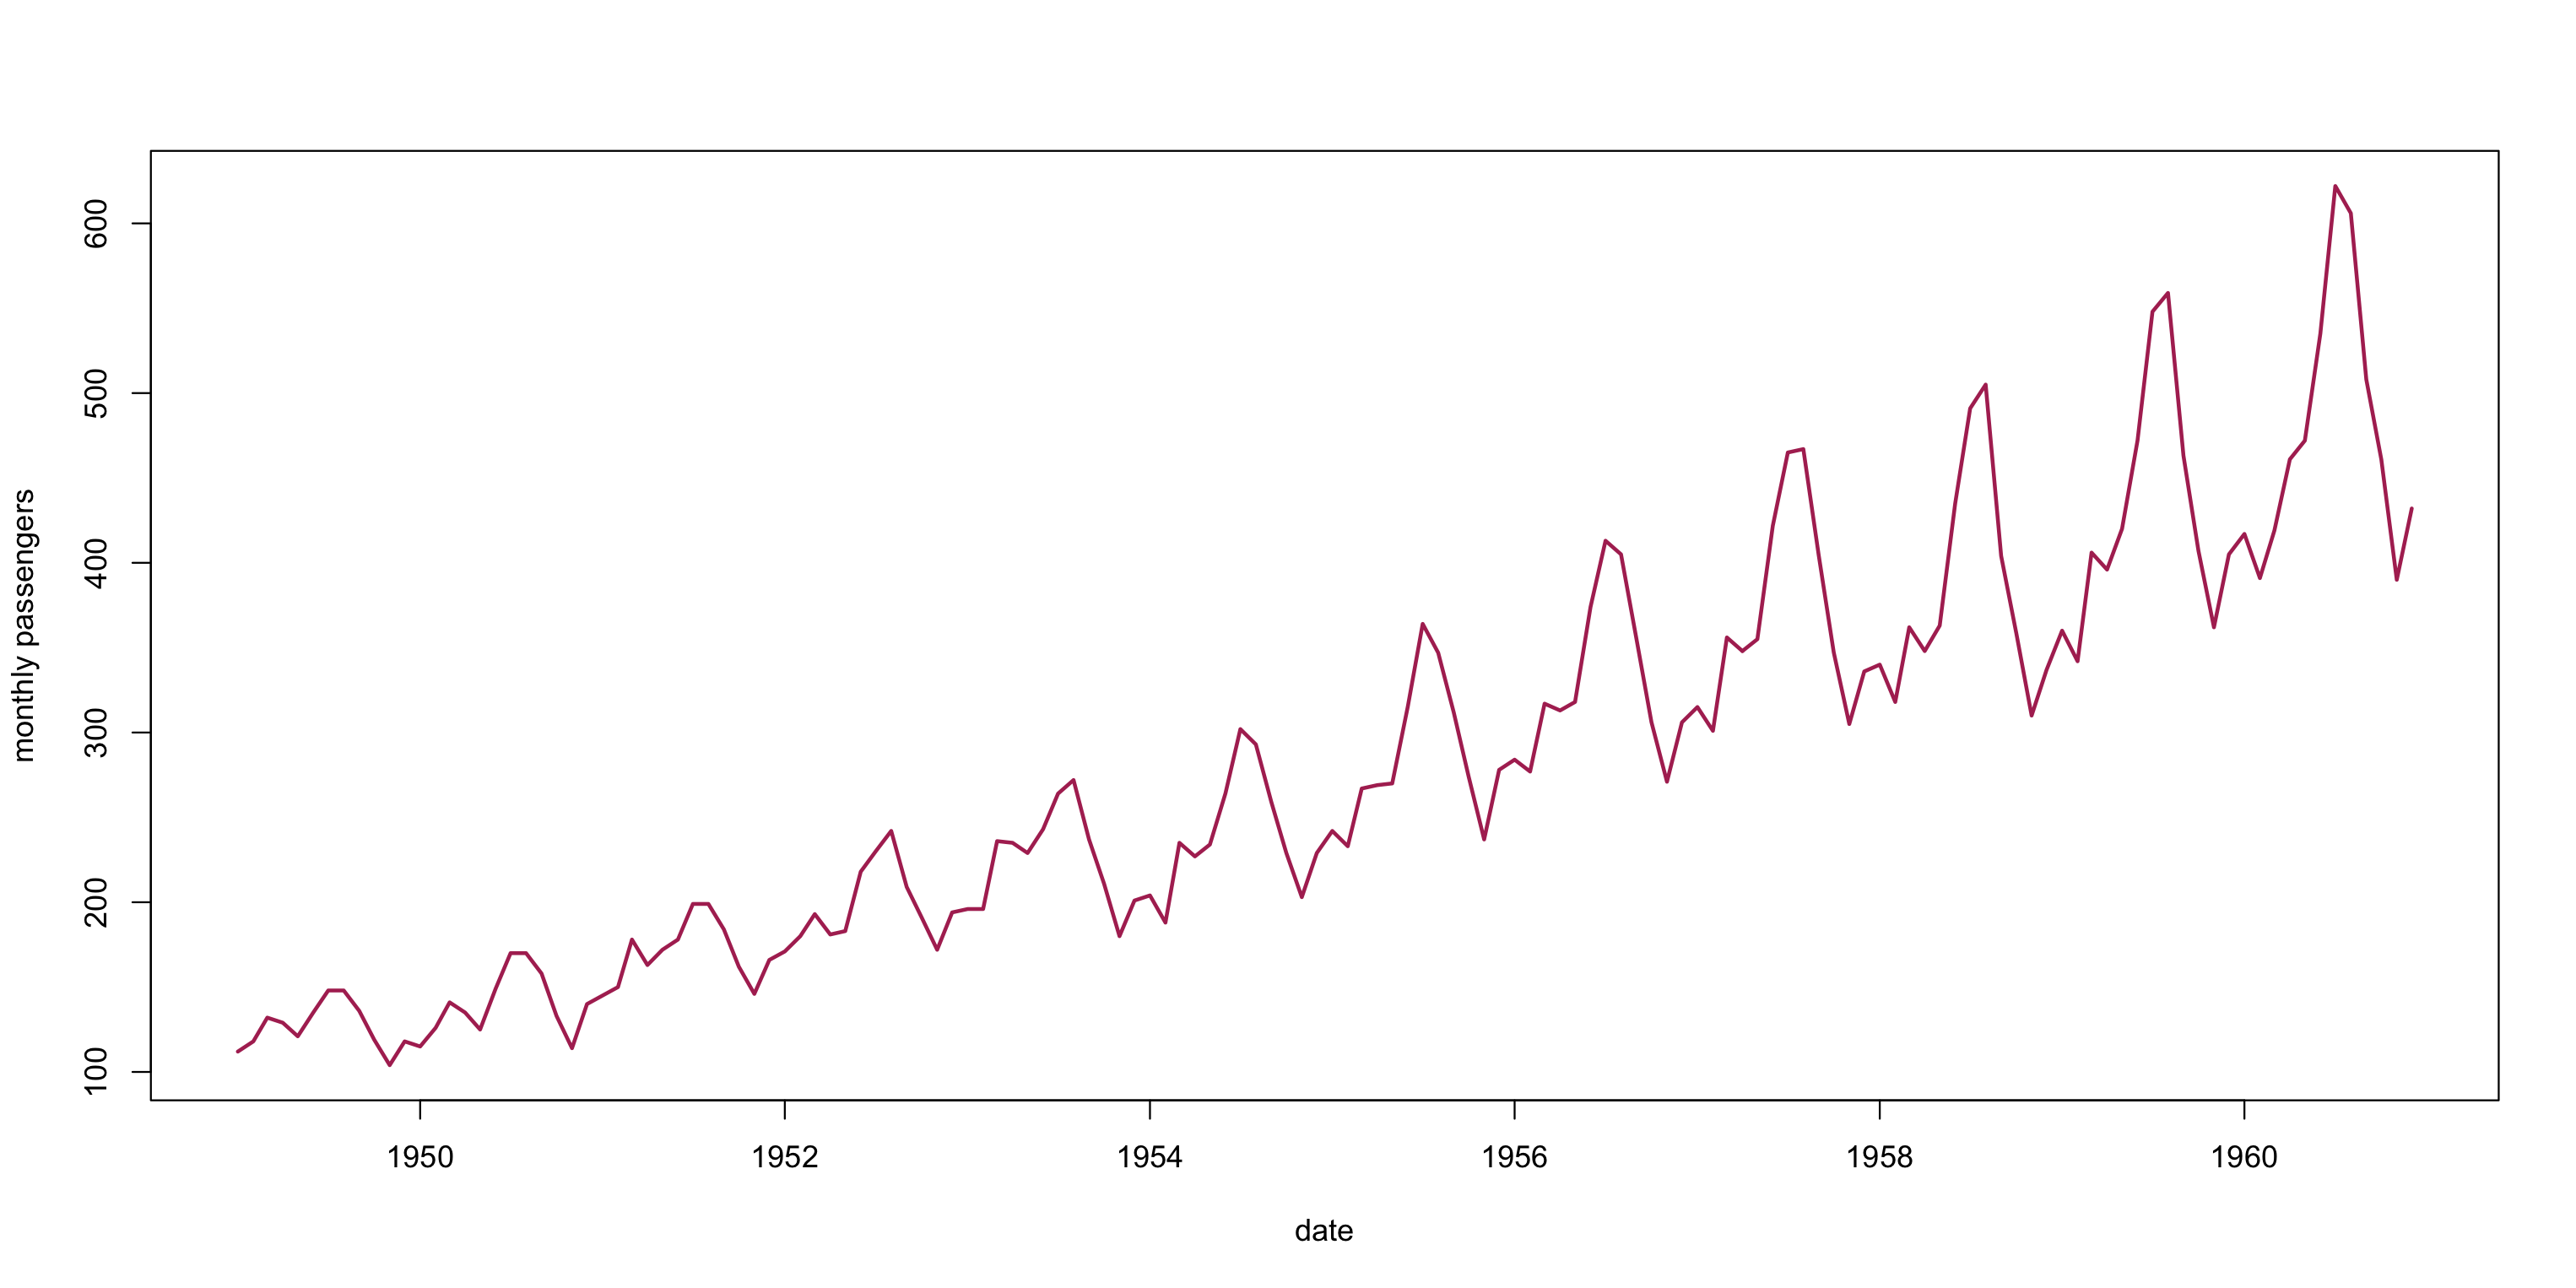

In [35]:
date <- as.Date(dmy, format="%d-%m-%Y") 
passengers <- airline$Passengers
plot(date, passengers, 
	ylab="monthly passengers", type="l", col="maroon", lwd=2)

Plot the log version:

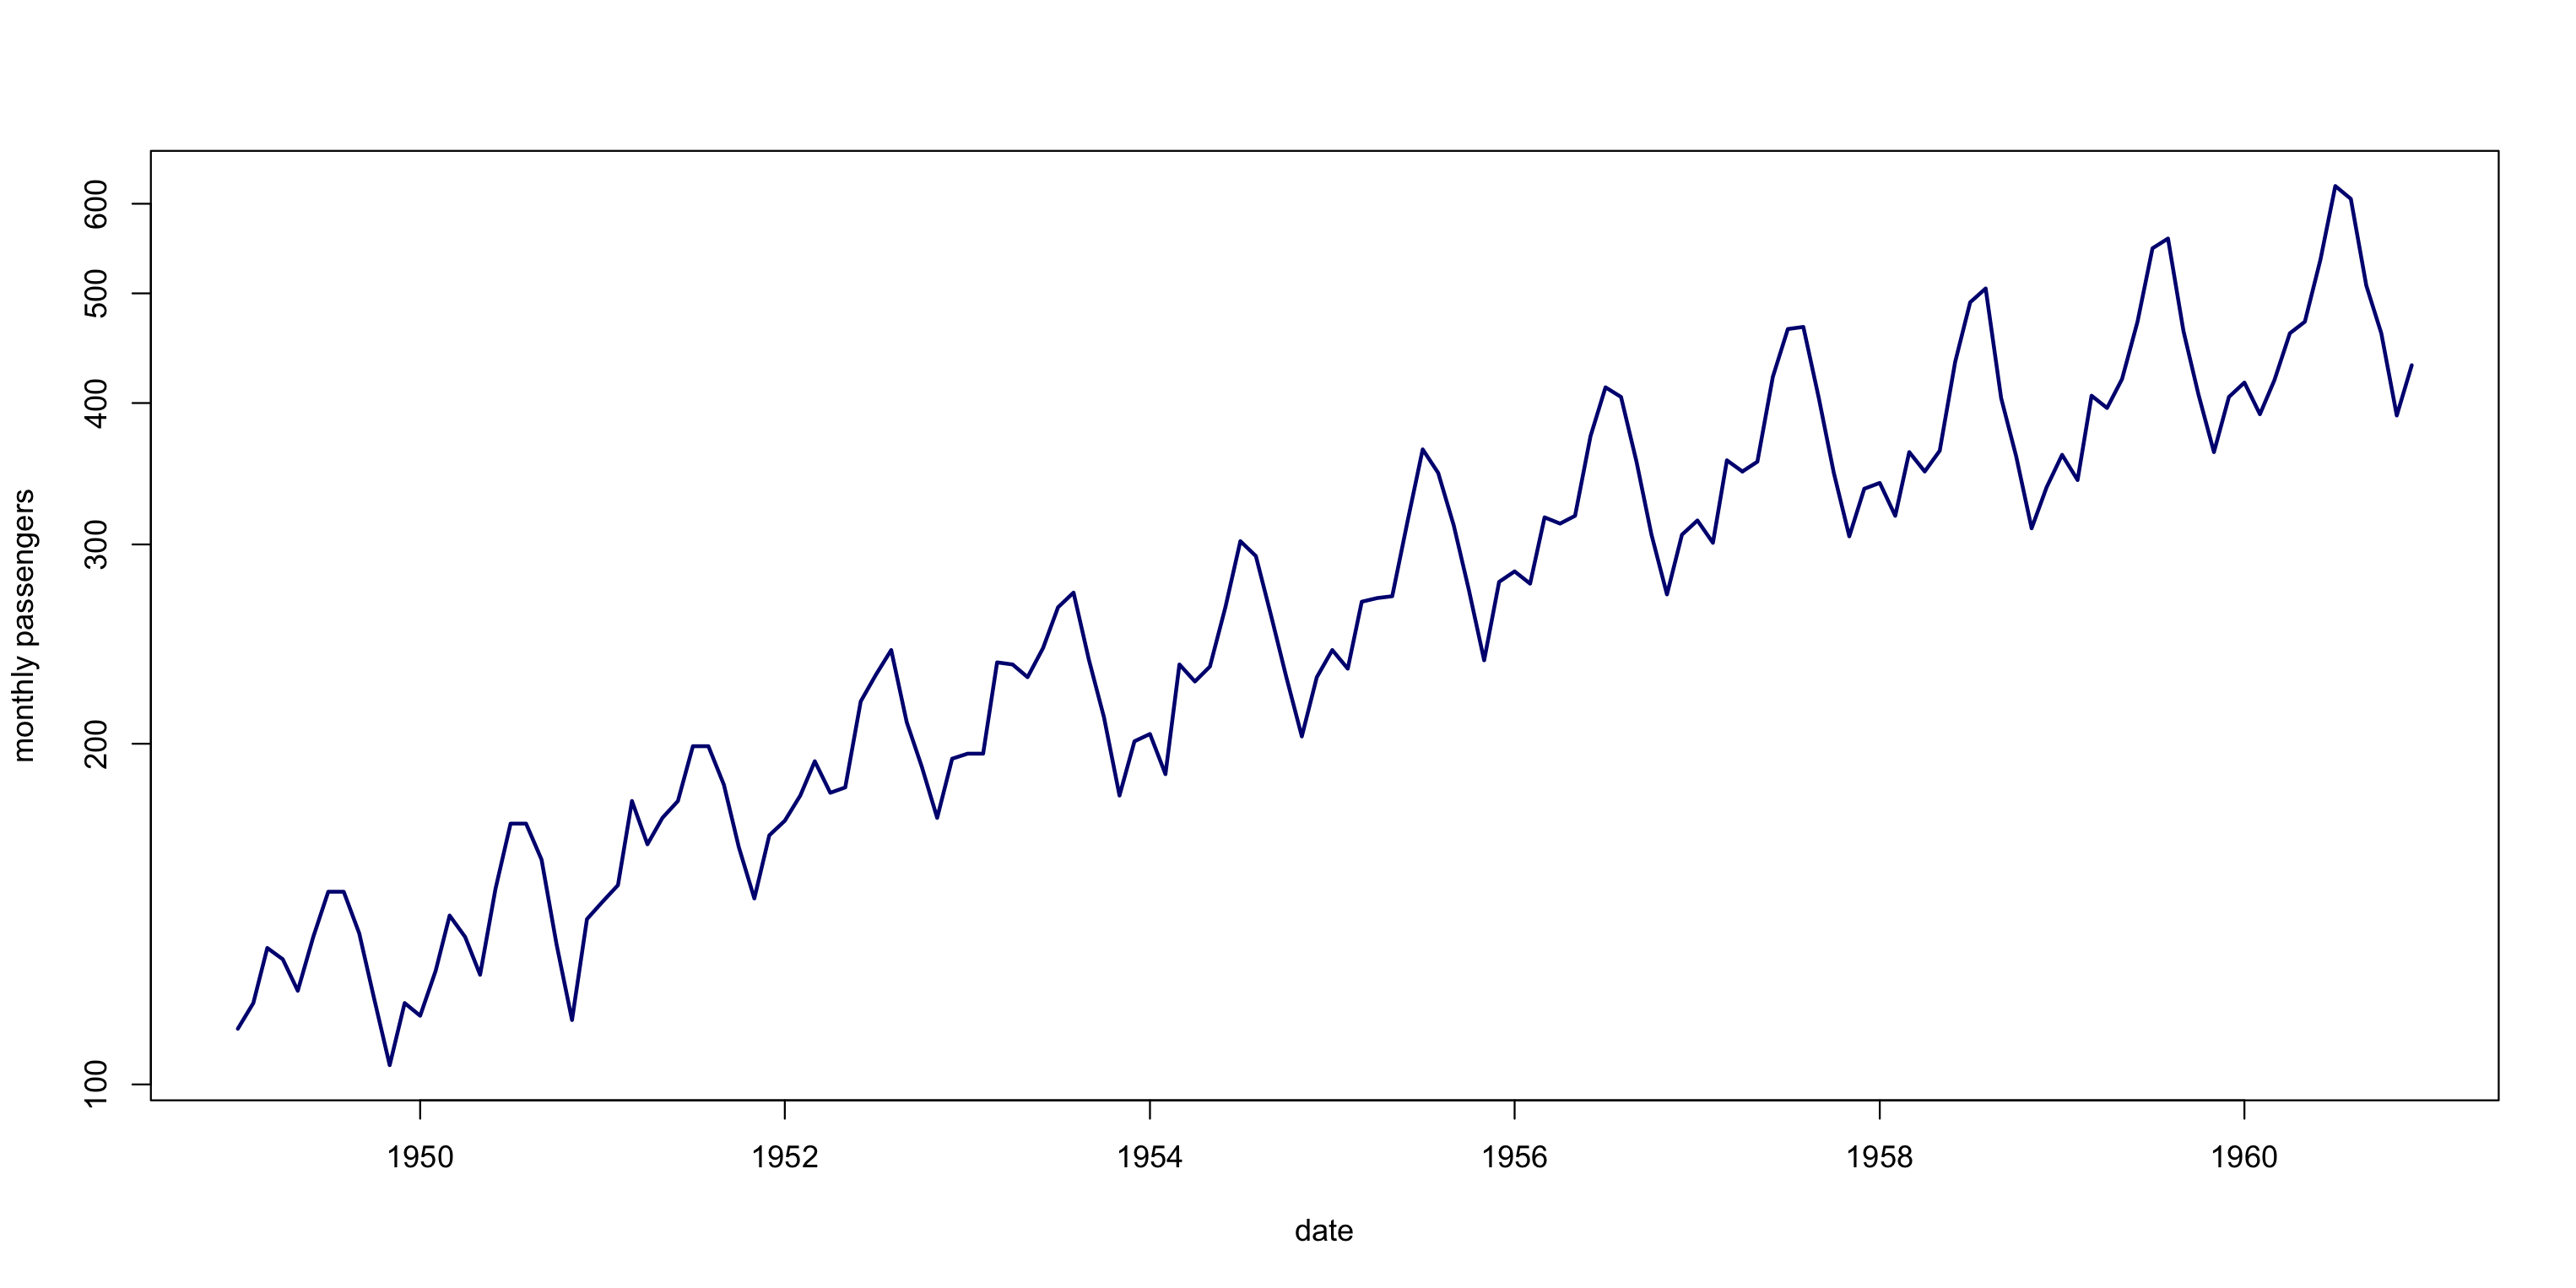

In [36]:
plot(date, passengers,  log="y",
	ylab="monthly passengers", type="l", col="navy", lwd=2)

After this, it is easier to not work with fancy Date objects. Note the following both are 'month' variables; the first is categorical, the second numeric

In [37]:
month <- factor(airline$Month)
time <- (airline$Year-min(airline$Year))*12 + airline$Month

Fit a regression. We could get fancier and group months together (summer, holidays), but we'll assume you have enough data that this doesn't make a difference.

In [38]:
summary(air <- glm(log(passengers) ~ time + month))


Call:
glm(formula = log(passengers) ~ time + month)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.156370  -0.041016   0.003677   0.044069   0.132324  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7267804  0.0188935 250.180  < 2e-16 ***
time         0.0100688  0.0001193  84.399  < 2e-16 ***
month2      -0.0220548  0.0242109  -0.911  0.36400    
month3       0.1081723  0.0242118   4.468 1.69e-05 ***
month4       0.0769034  0.0242132   3.176  0.00186 ** 
month5       0.0745308  0.0242153   3.078  0.00254 ** 
month6       0.1966770  0.0242179   8.121 2.98e-13 ***
month7       0.3006193  0.0242212  12.411  < 2e-16 ***
month8       0.2913245  0.0242250  12.026  < 2e-16 ***
month9       0.1466899  0.0242294   6.054 1.39e-08 ***
month10      0.0085316  0.0242344   0.352  0.72537    
month11     -0.1351861  0.0242400  -5.577 1.34e-07 ***
month12     -0.0213211  0.0242461  -0.879  0.38082    
---
Signif. codes:  0 ‘***’ 

Plot fit vs true (i.e. predicted values against the true observations).

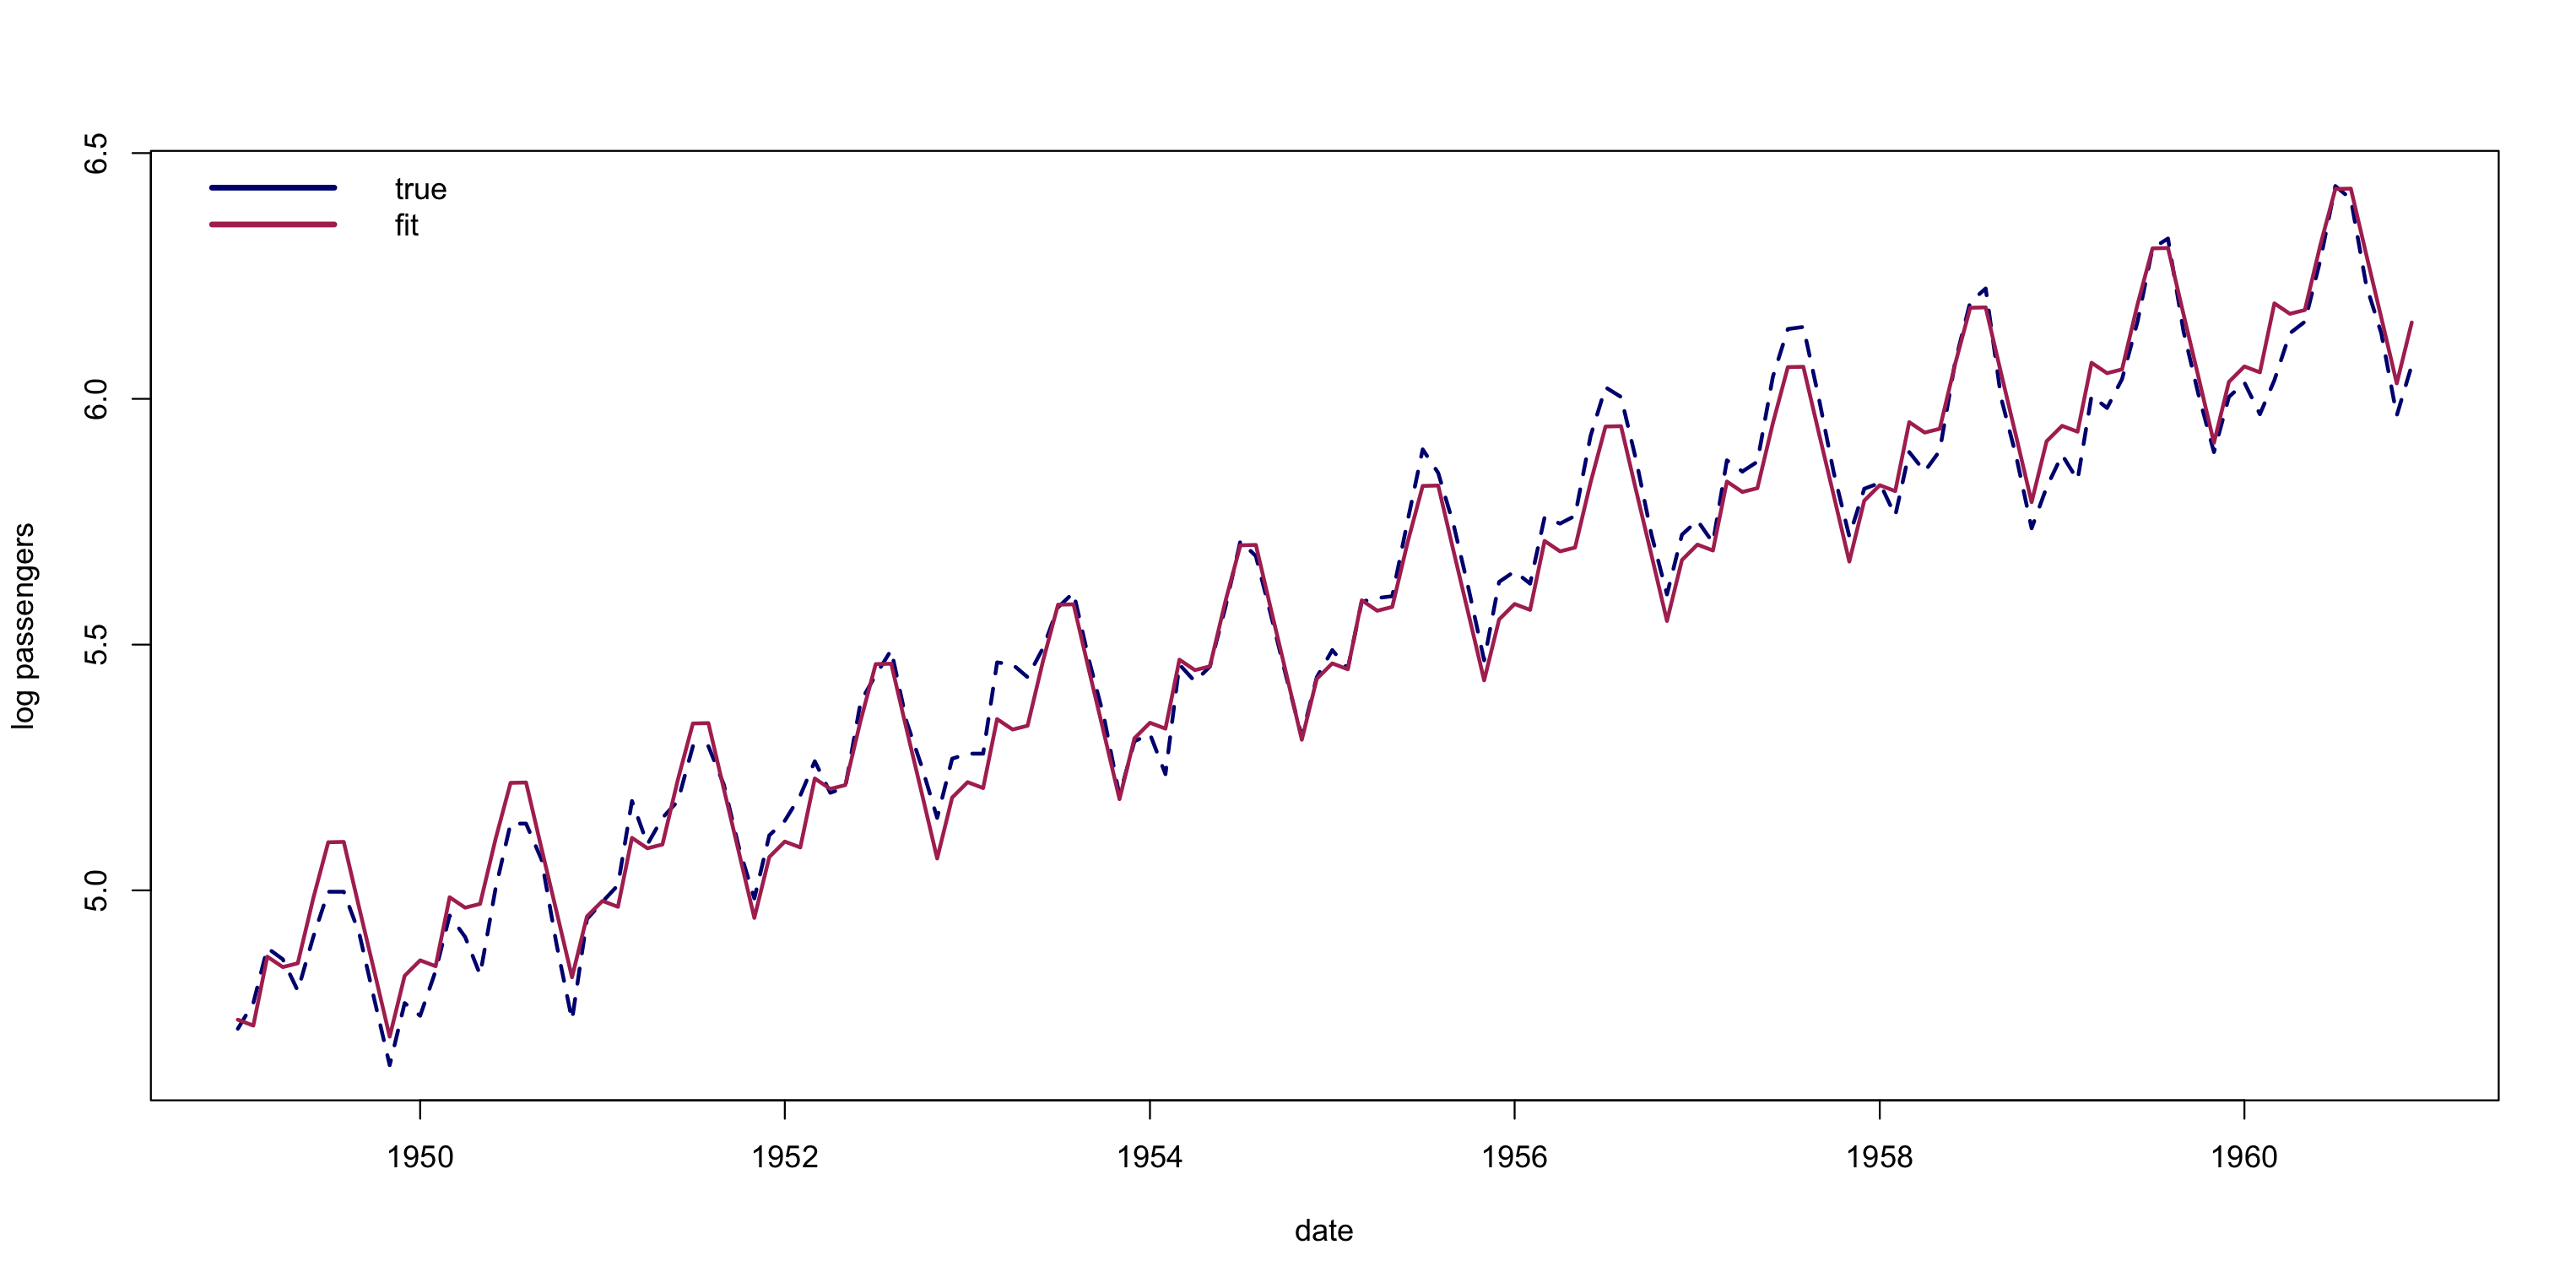

In [39]:
plot(date, log(passengers), 
	ylab="log passengers", type="l", col="navy", lty=2, lwd=2)
lines(date, air$fit, col="maroon", lwd=2)
legend("topleft", legend=c("true","fit"), bty="n", lwd=3, col=c("navy","maroon"))

Plot residuals:

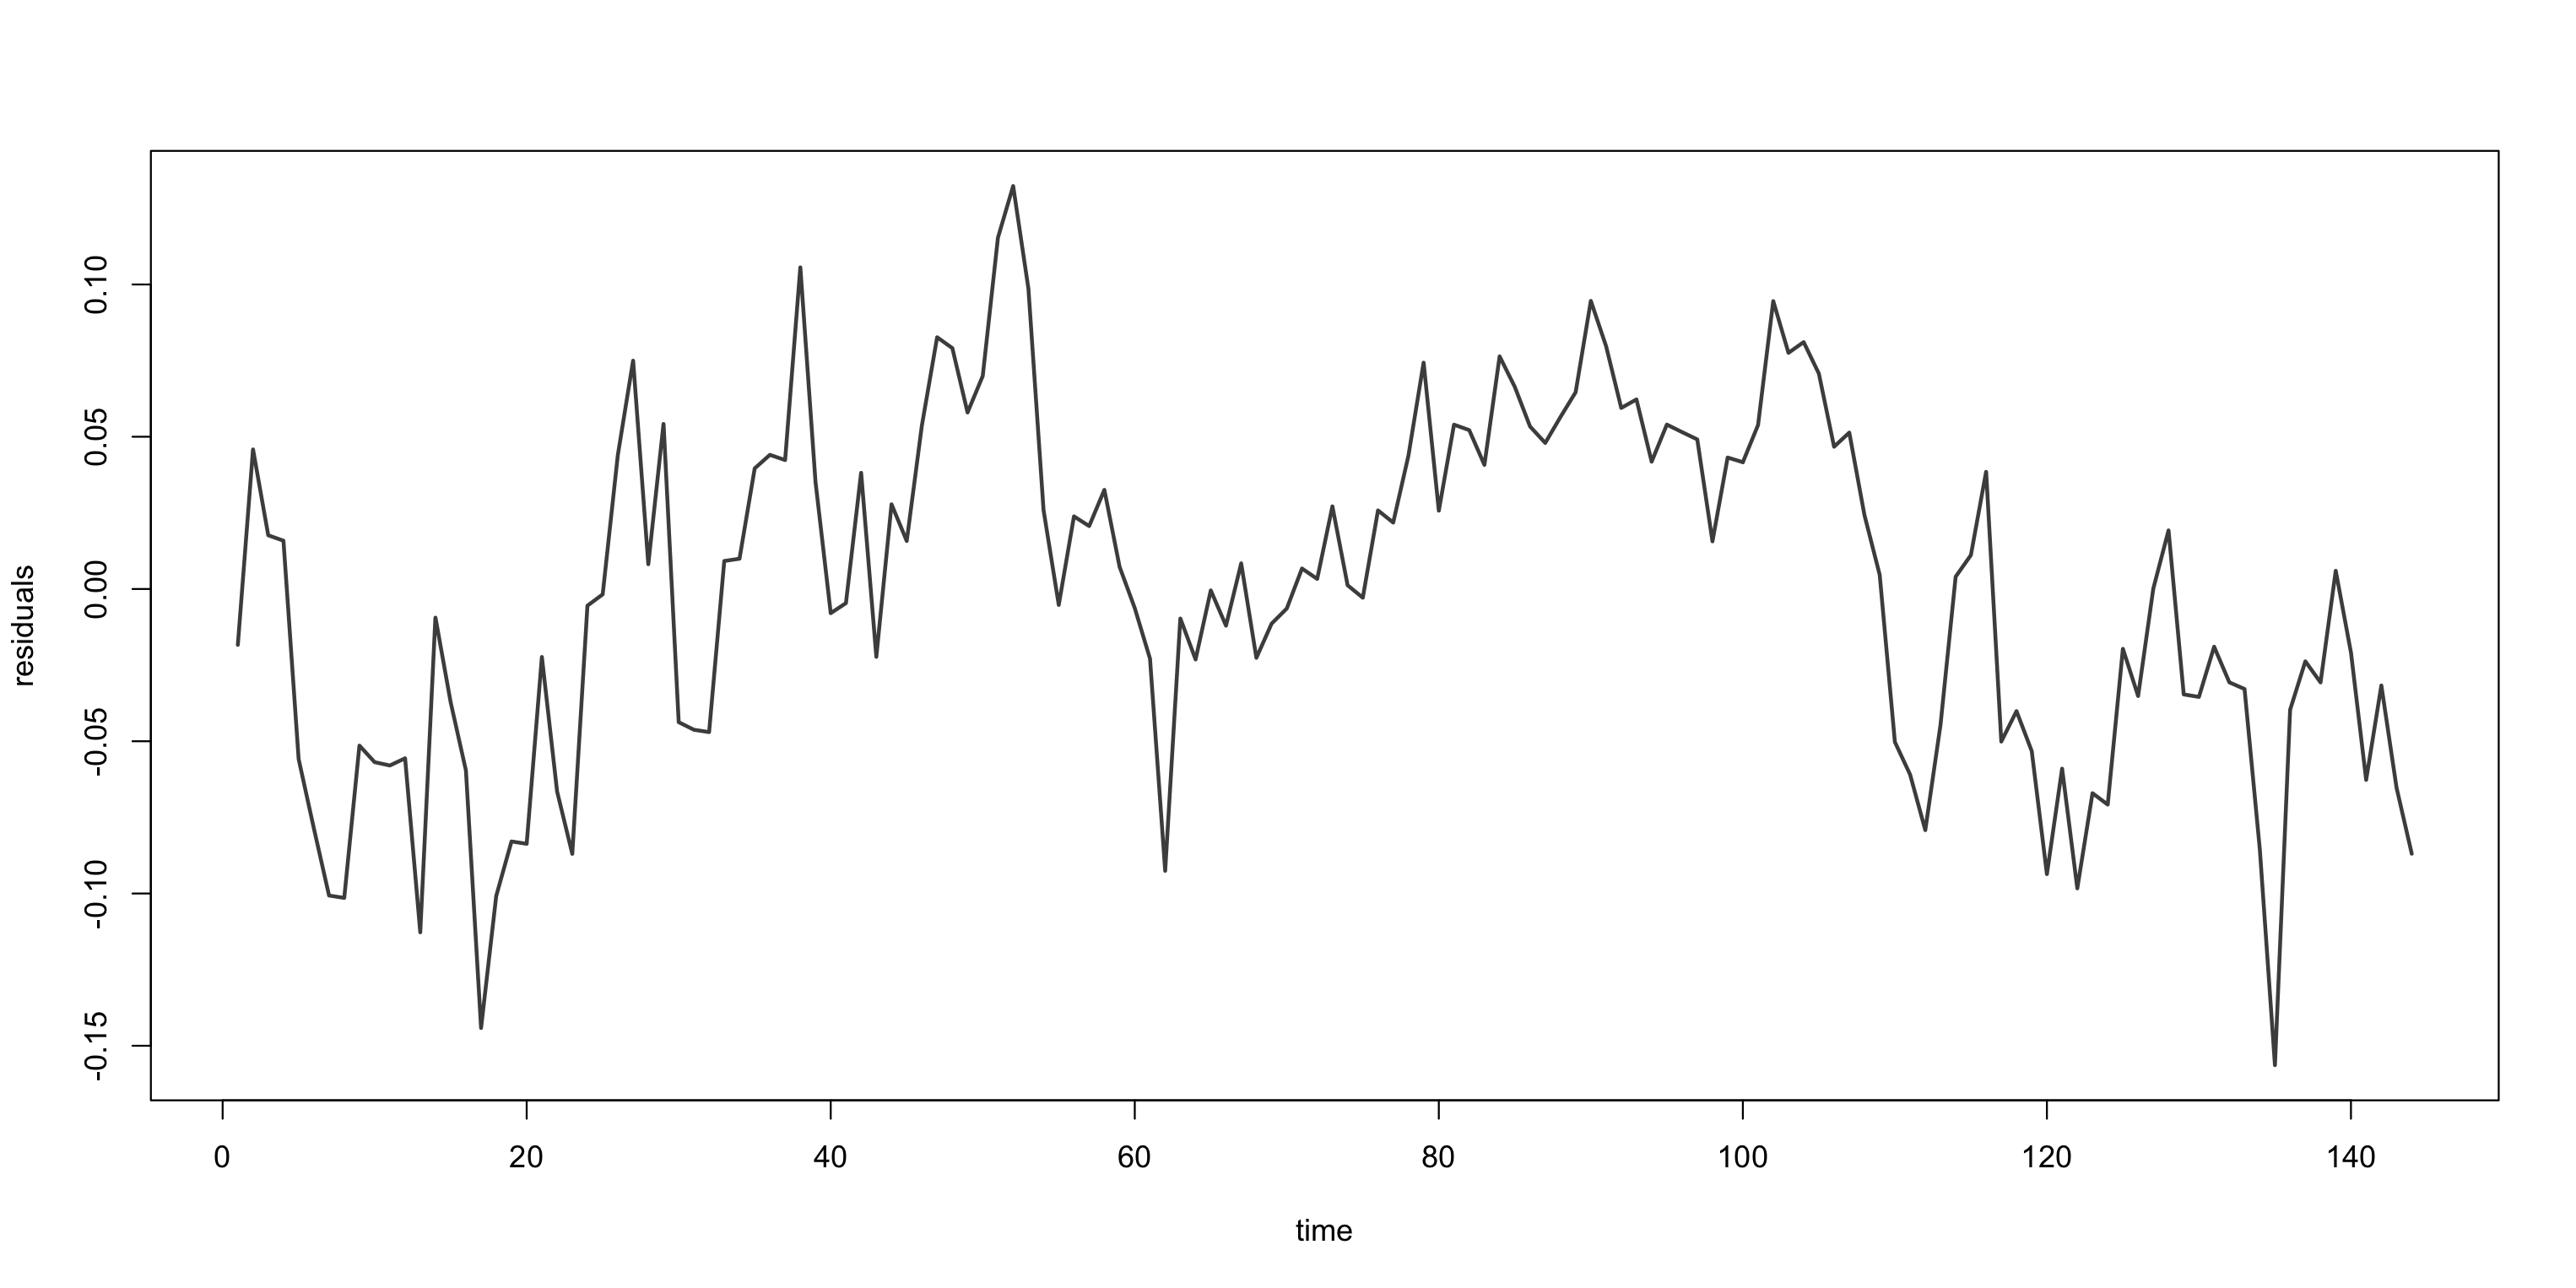

In [40]:
plot(time, air$resid, type="l", ylab="residuals", lwd=2, col="grey30")

You can calculate and plot the autocorreltion function:

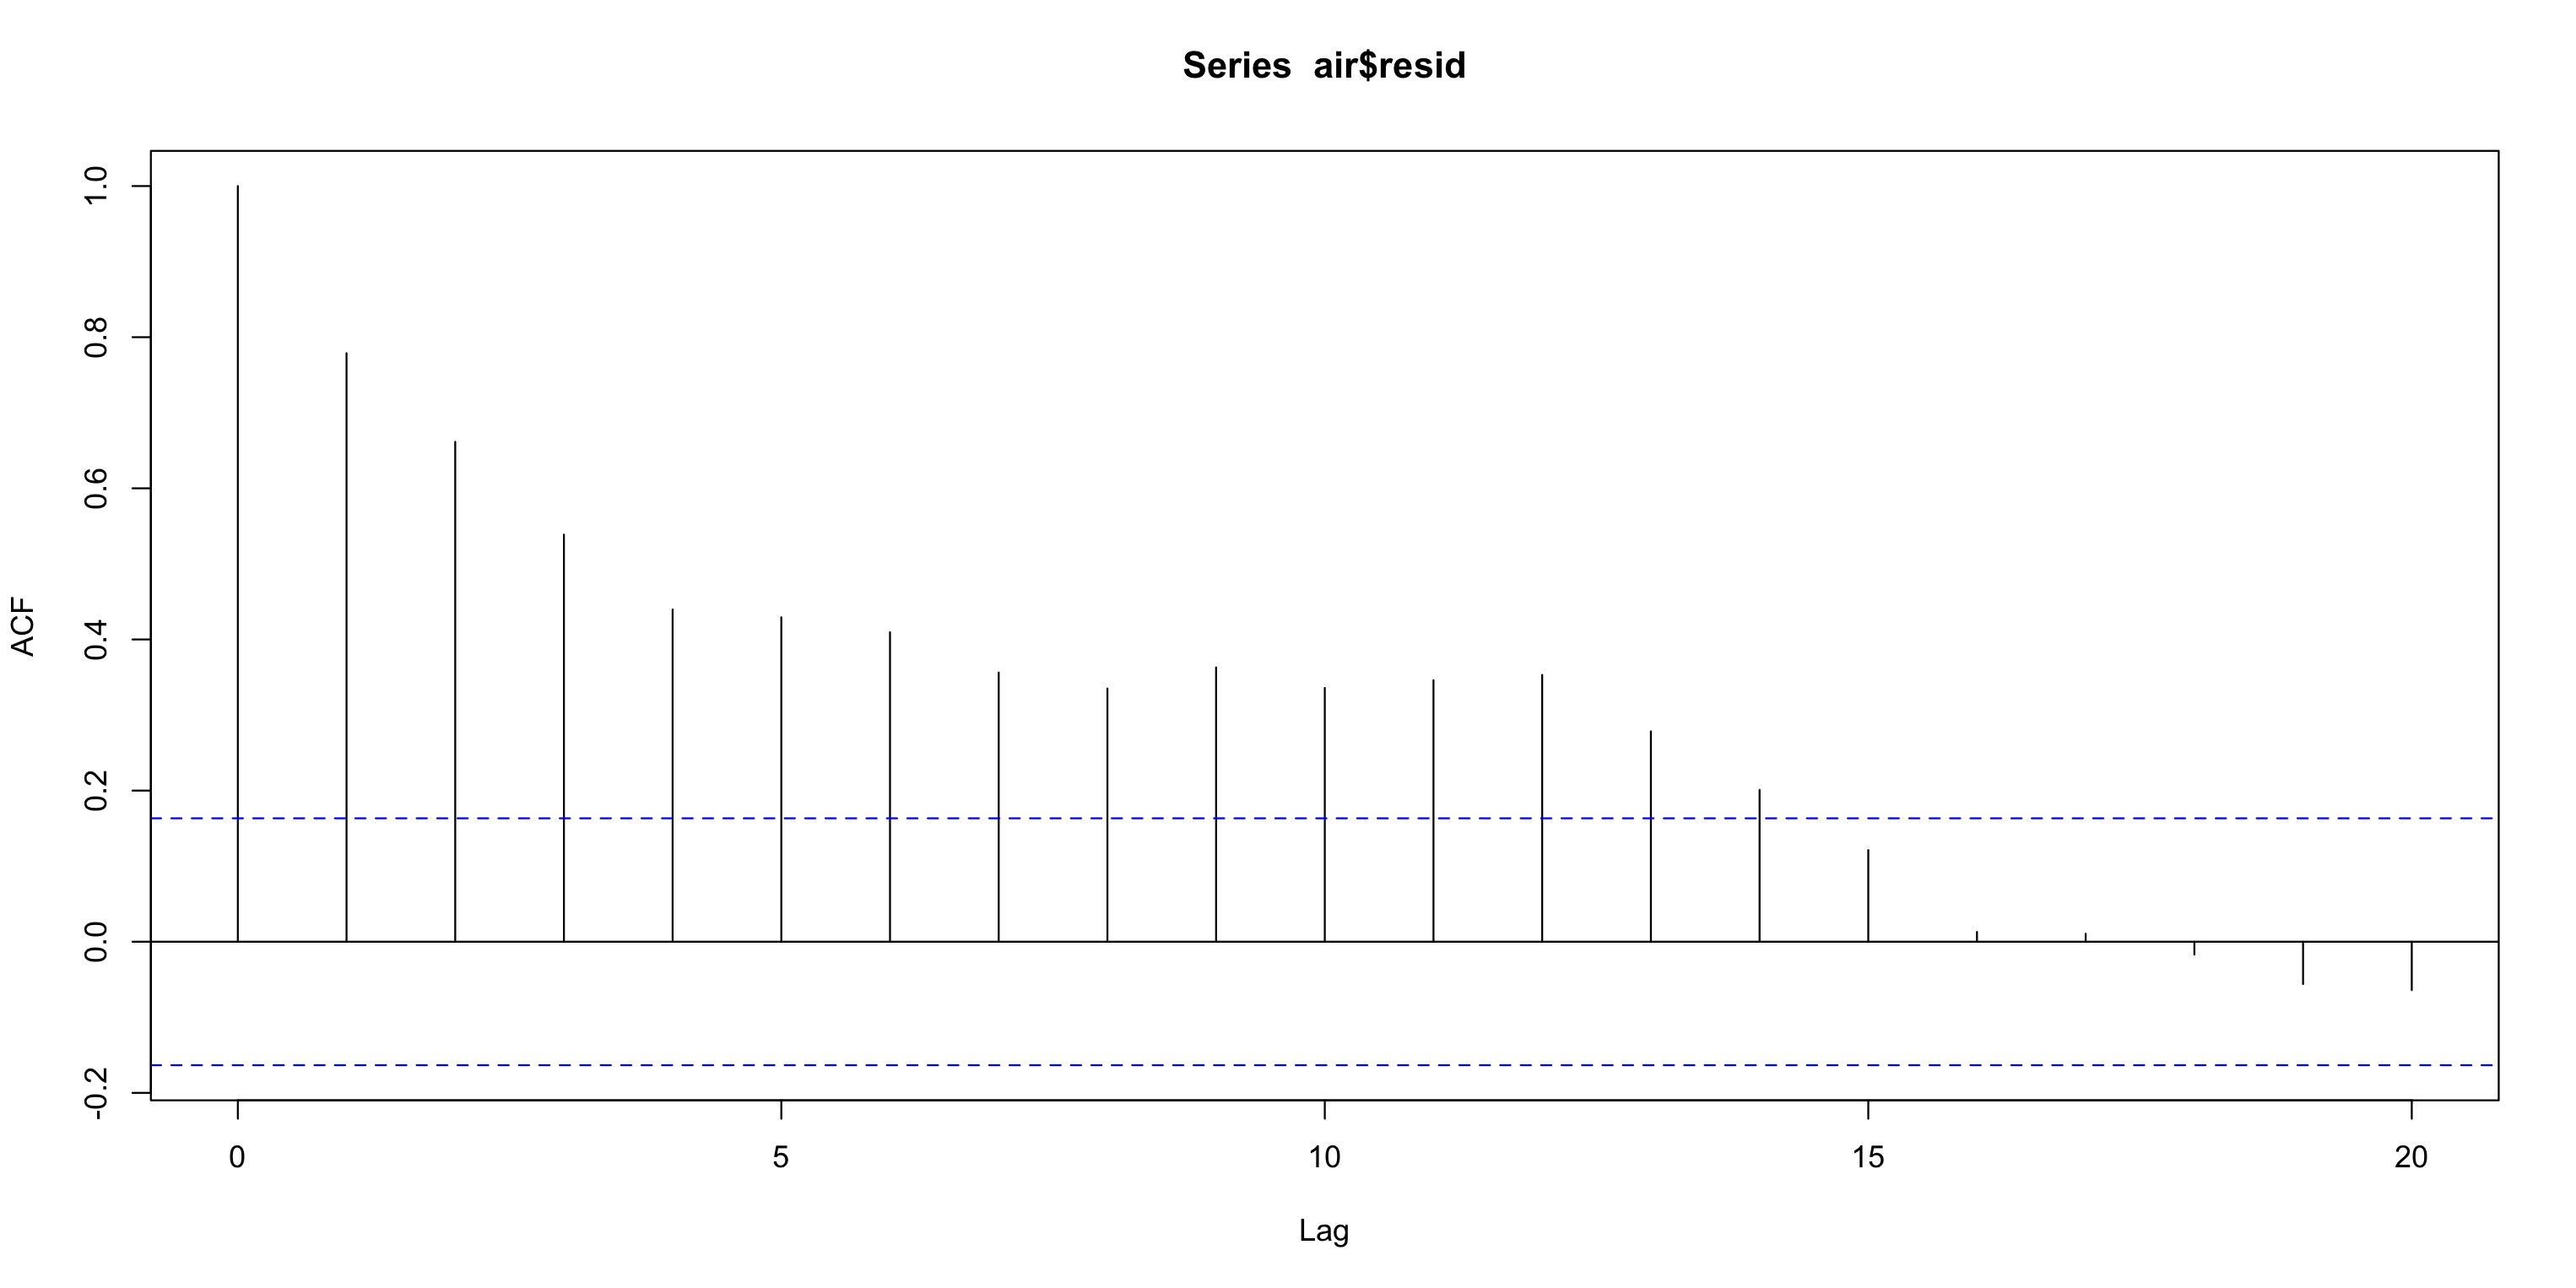

In [41]:
airac <- acf(air$resid, lag.max=20)

With a clever use of the `head` functino, we can quickly fit an autoregressive model:

In [42]:
lag <- head(log(passengers),-1)## see help(head)
passengers <- passengers[-1] 
month <- month[-1]
time <- time[-1]
summary(airAR <- glm(log(passengers) ~ time + month + lag))


Call:
glm(formula = log(passengers) ~ time + month + lag)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.098372  -0.020077   0.001508   0.021457   0.086081  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0002930  0.2584022   3.871 0.000171 ***
time         0.0020576  0.0005592   3.679 0.000342 ***
month2      -0.0344936  0.0154346  -2.235 0.027149 *  
month3       0.1132505  0.0154221   7.343 2.09e-11 ***
month4      -0.0212718  0.0167987  -1.266 0.207697    
month5       0.0011799  0.0161917   0.073 0.942021    
month6       0.1252337  0.0161513   7.754 2.35e-12 ***
month7       0.1323313  0.0192501   6.874 2.40e-10 ***
month8       0.0406287  0.0231240   1.757 0.081292 .  
month9      -0.0966085  0.0227455  -4.247 4.11e-05 ***
month10     -0.1200352  0.0177417  -6.766 4.18e-10 ***
month11     -0.1541576  0.0154616  -9.970  < 2e-16 ***
month12      0.0737118  0.0168065   4.386 2.38e-05 ***
lag          0.7930716

And we can also plot its residuals and autocorrelation function.


Autocorrelations of series ‘airAR$resid’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.109  0.101  0.004 -0.121  0.076  0.099 -0.025 -0.066  0.117 -0.005 
    11     12     13     14     15     16     17     18     19     20 
 0.069  0.205  0.049  0.022  0.073 -0.204  0.046  0.009 -0.065 -0.071 


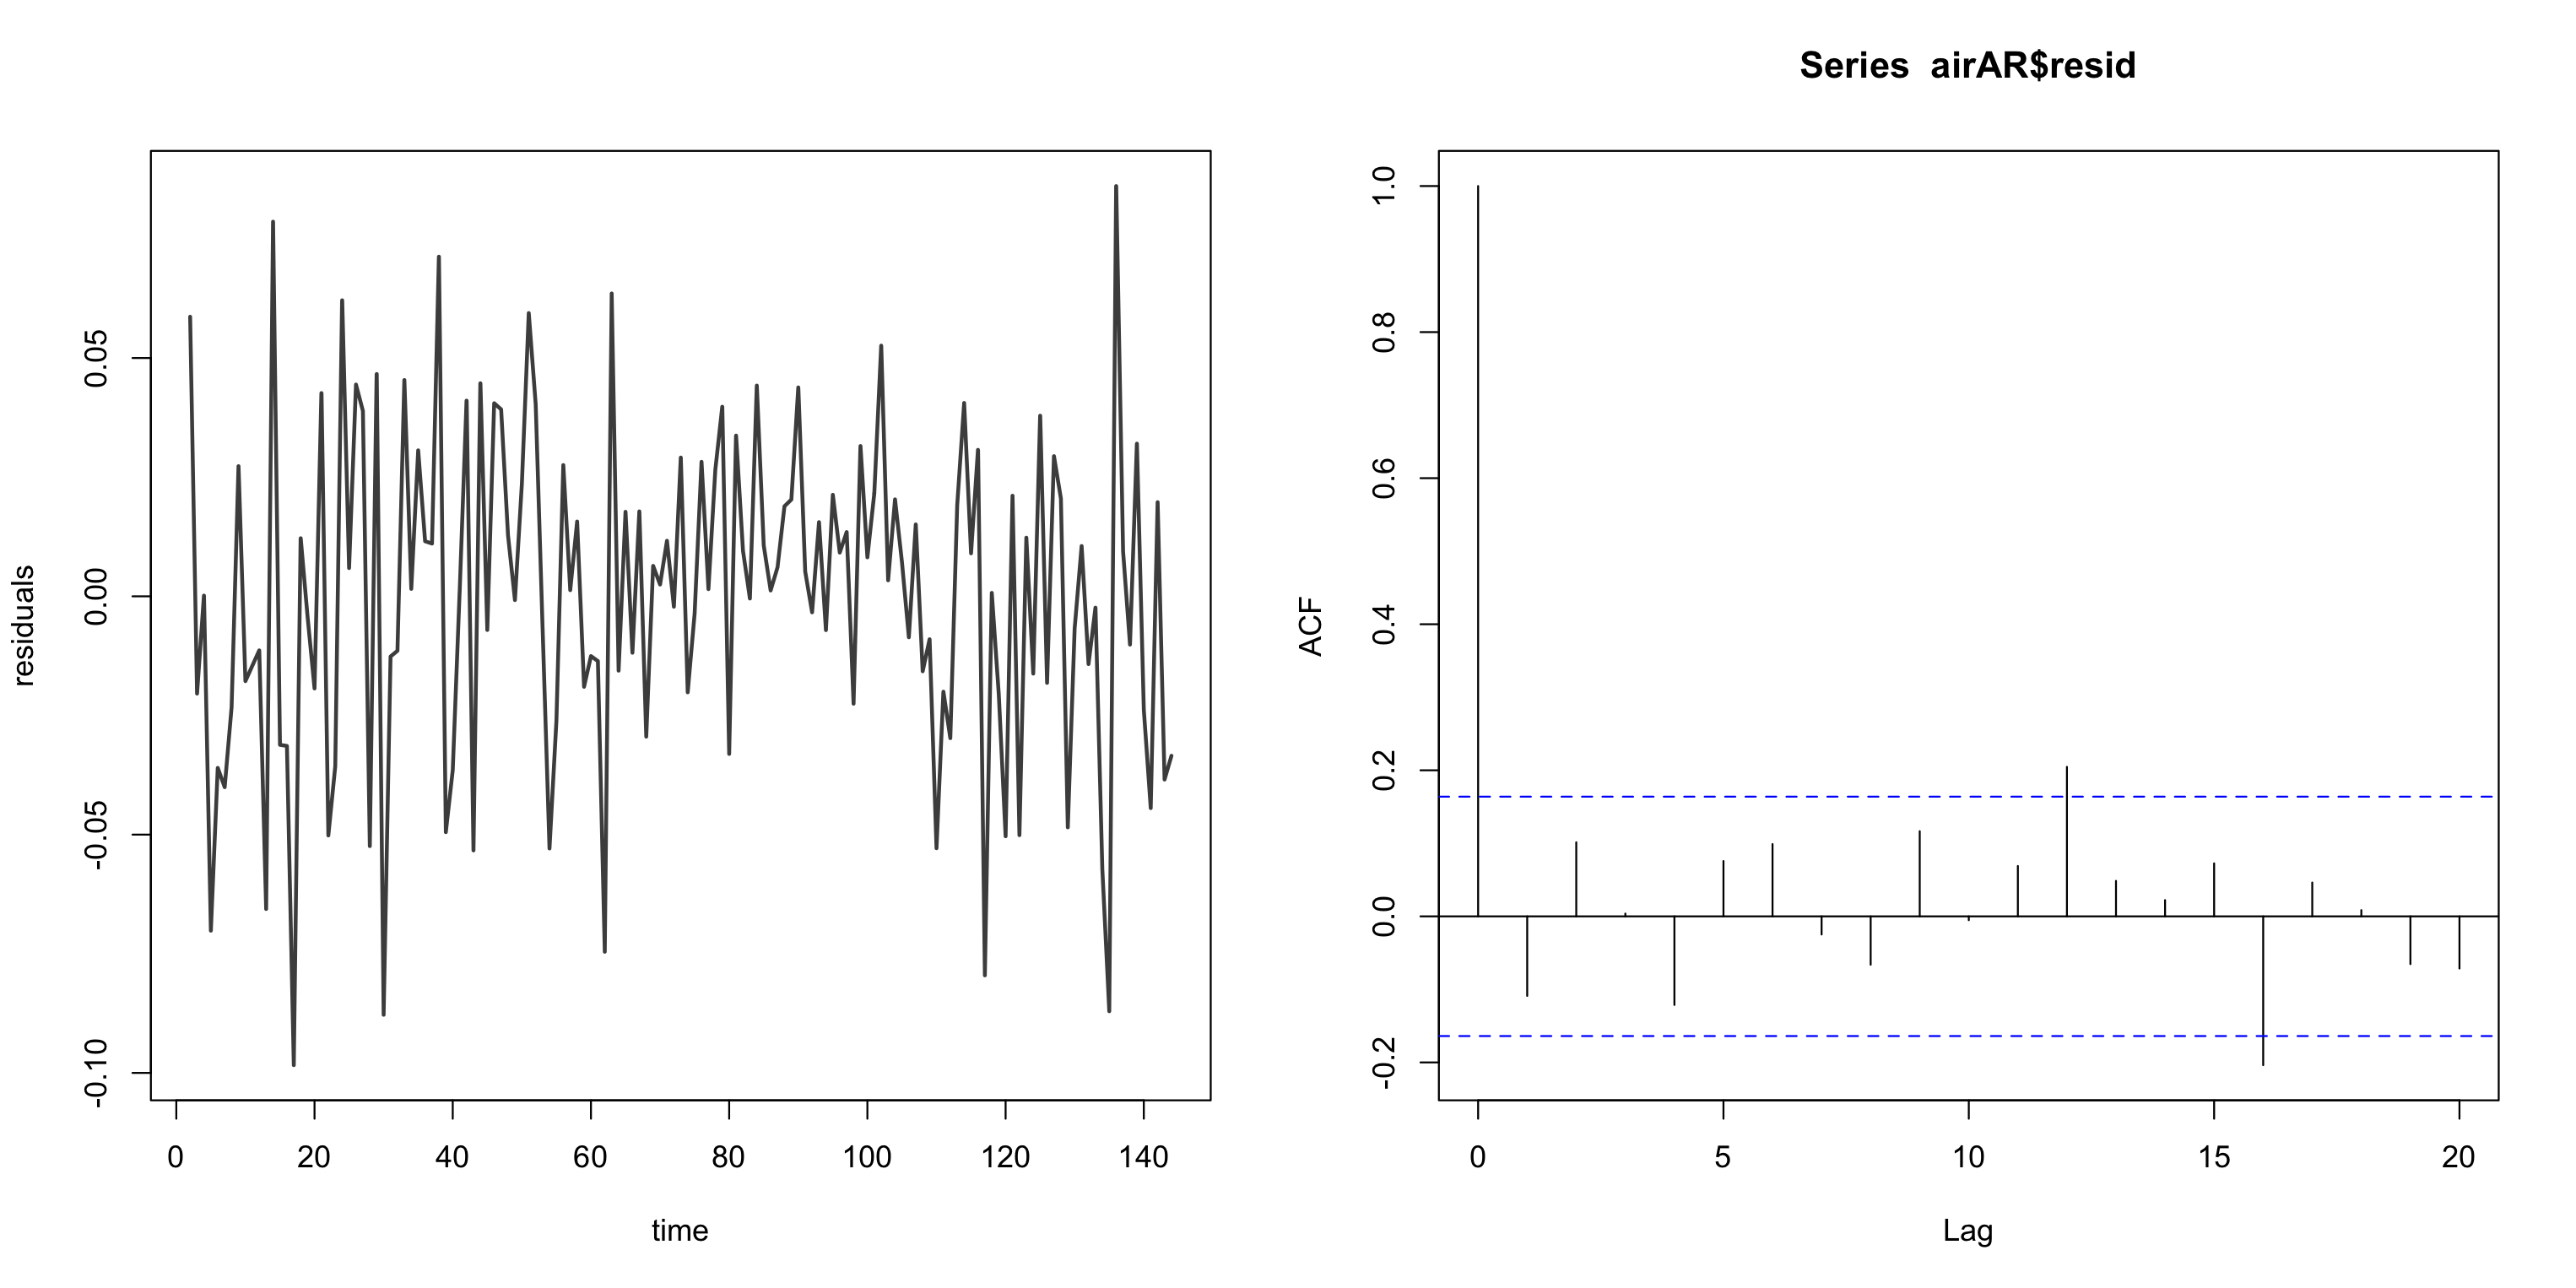

In [43]:
par(mfrow=c(1,2))
plot(time, airAR$resid, type="l", ylab="residuals", lwd=2, col="grey30")
print(acf(airAR$resid, lag.max=20))

## The chapter ends with different flavors of AR(1) series

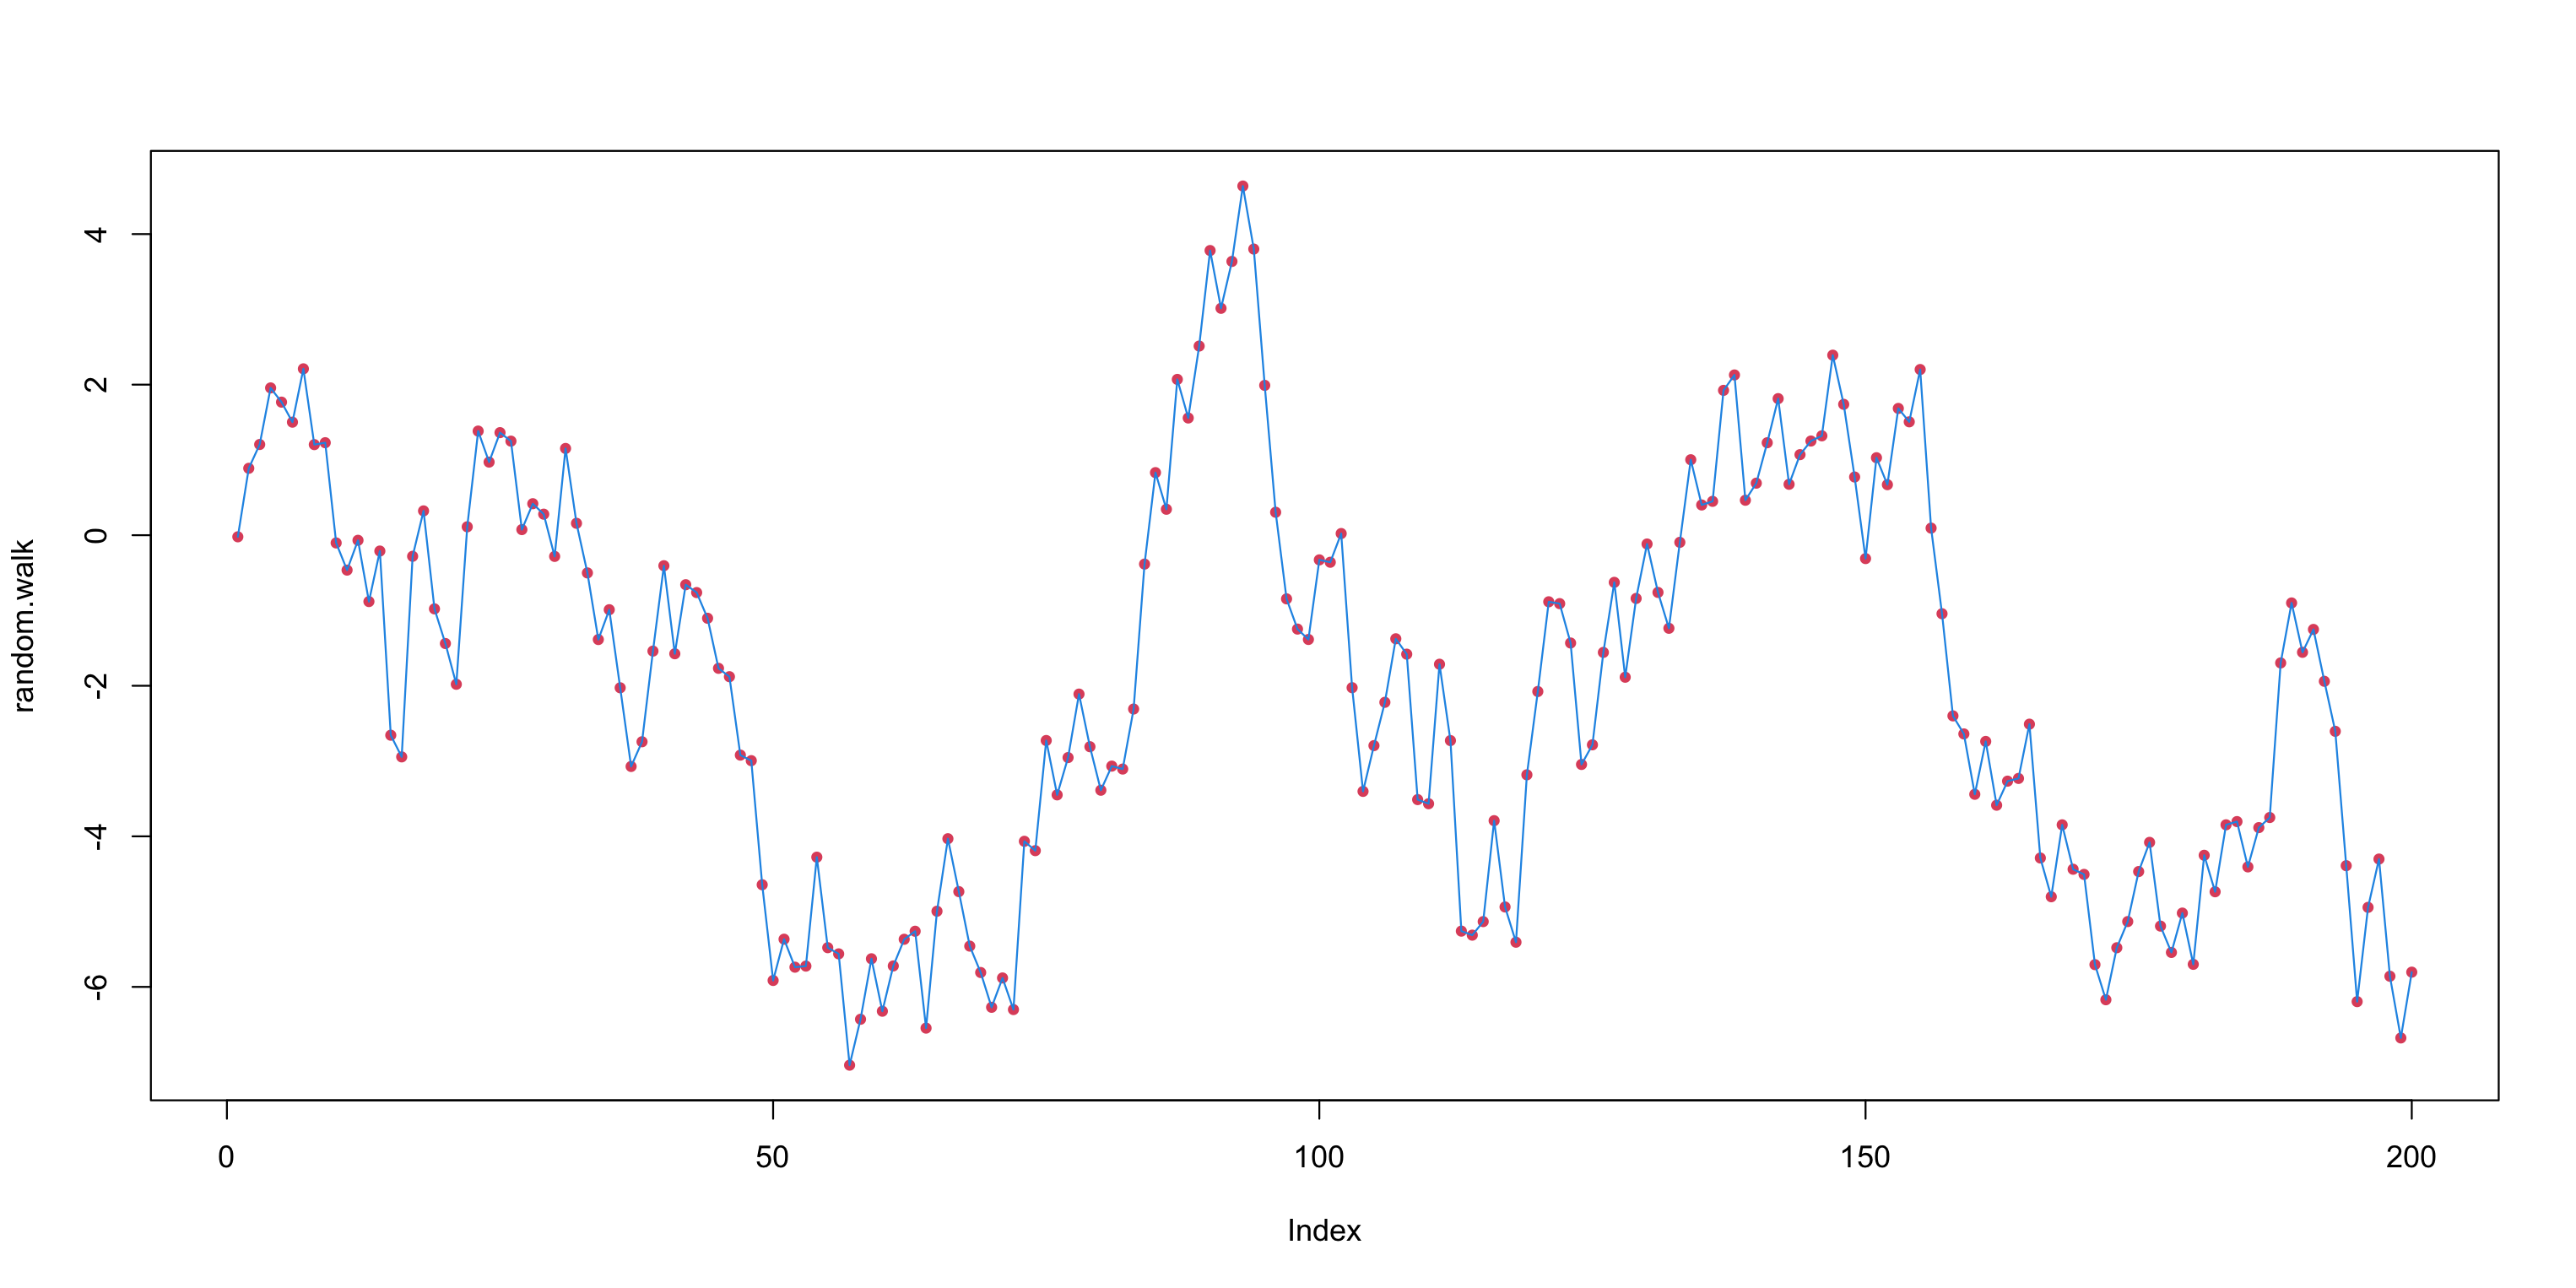

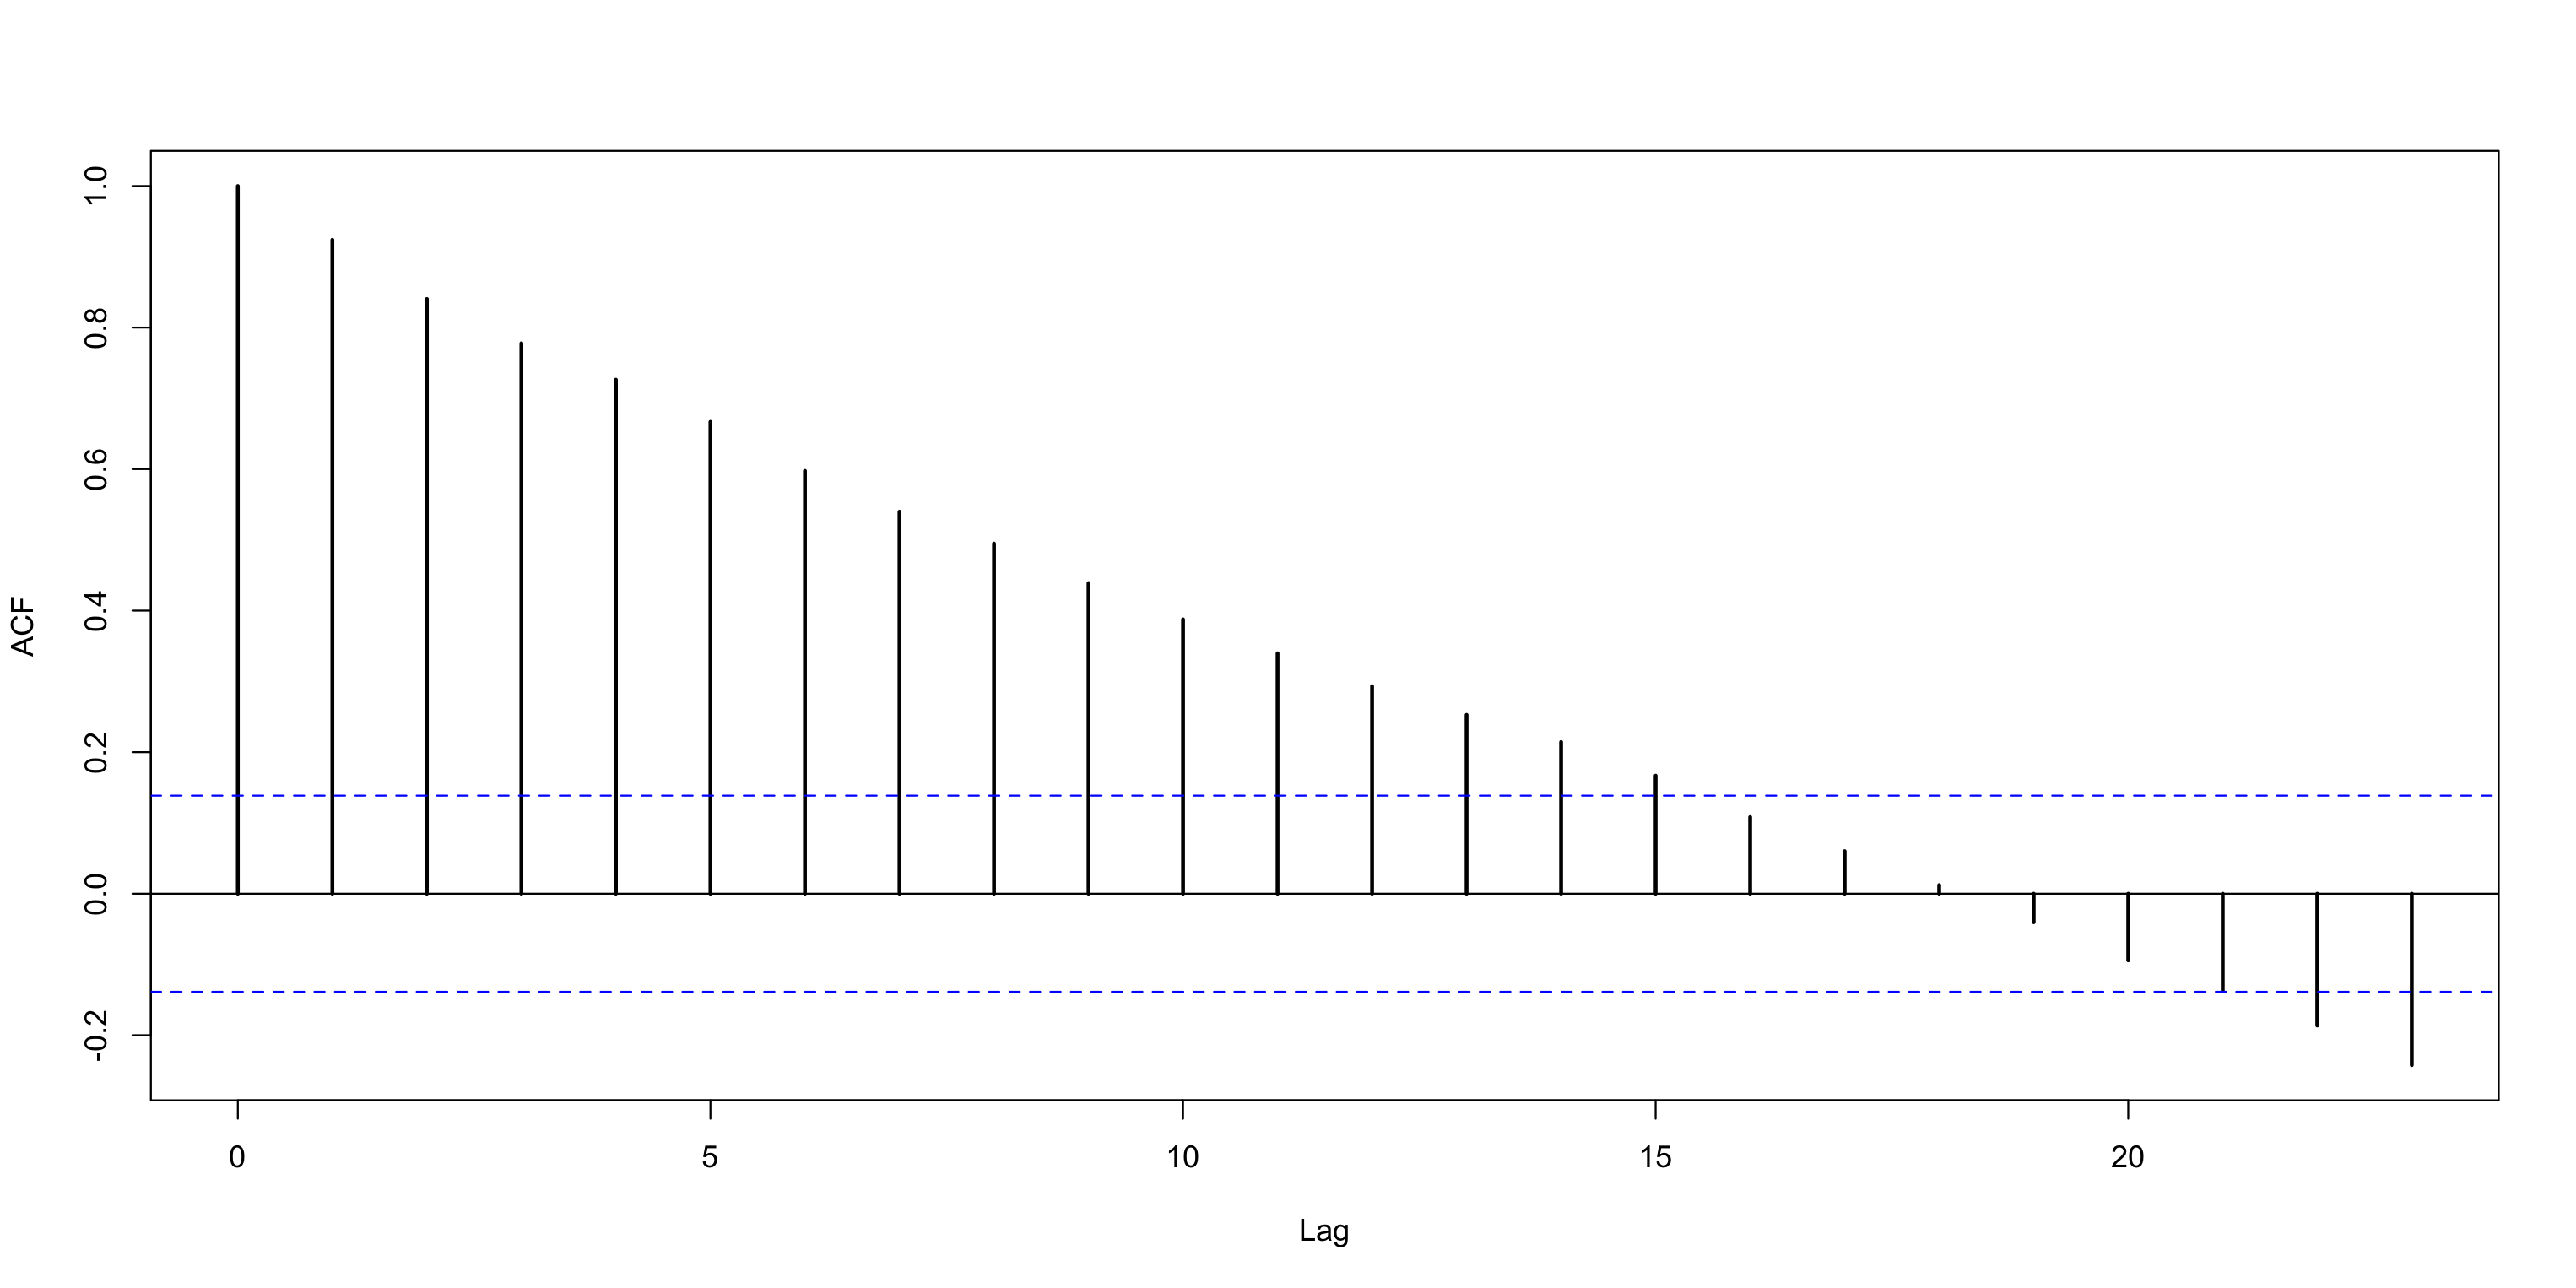

In [44]:
random.walk <- rnorm(1)
for(i in 2:200){ random.walk <- c(random.walk, random.walk[i-1]+rnorm(1)) }
plot(random.walk, pch=20, col=2)
lines(random.walk, col=4)
acf(random.walk, lwd=2, main="")

This motivaes a quick analysis of the (otherwise horrible) Dow Jones Industrial Average:

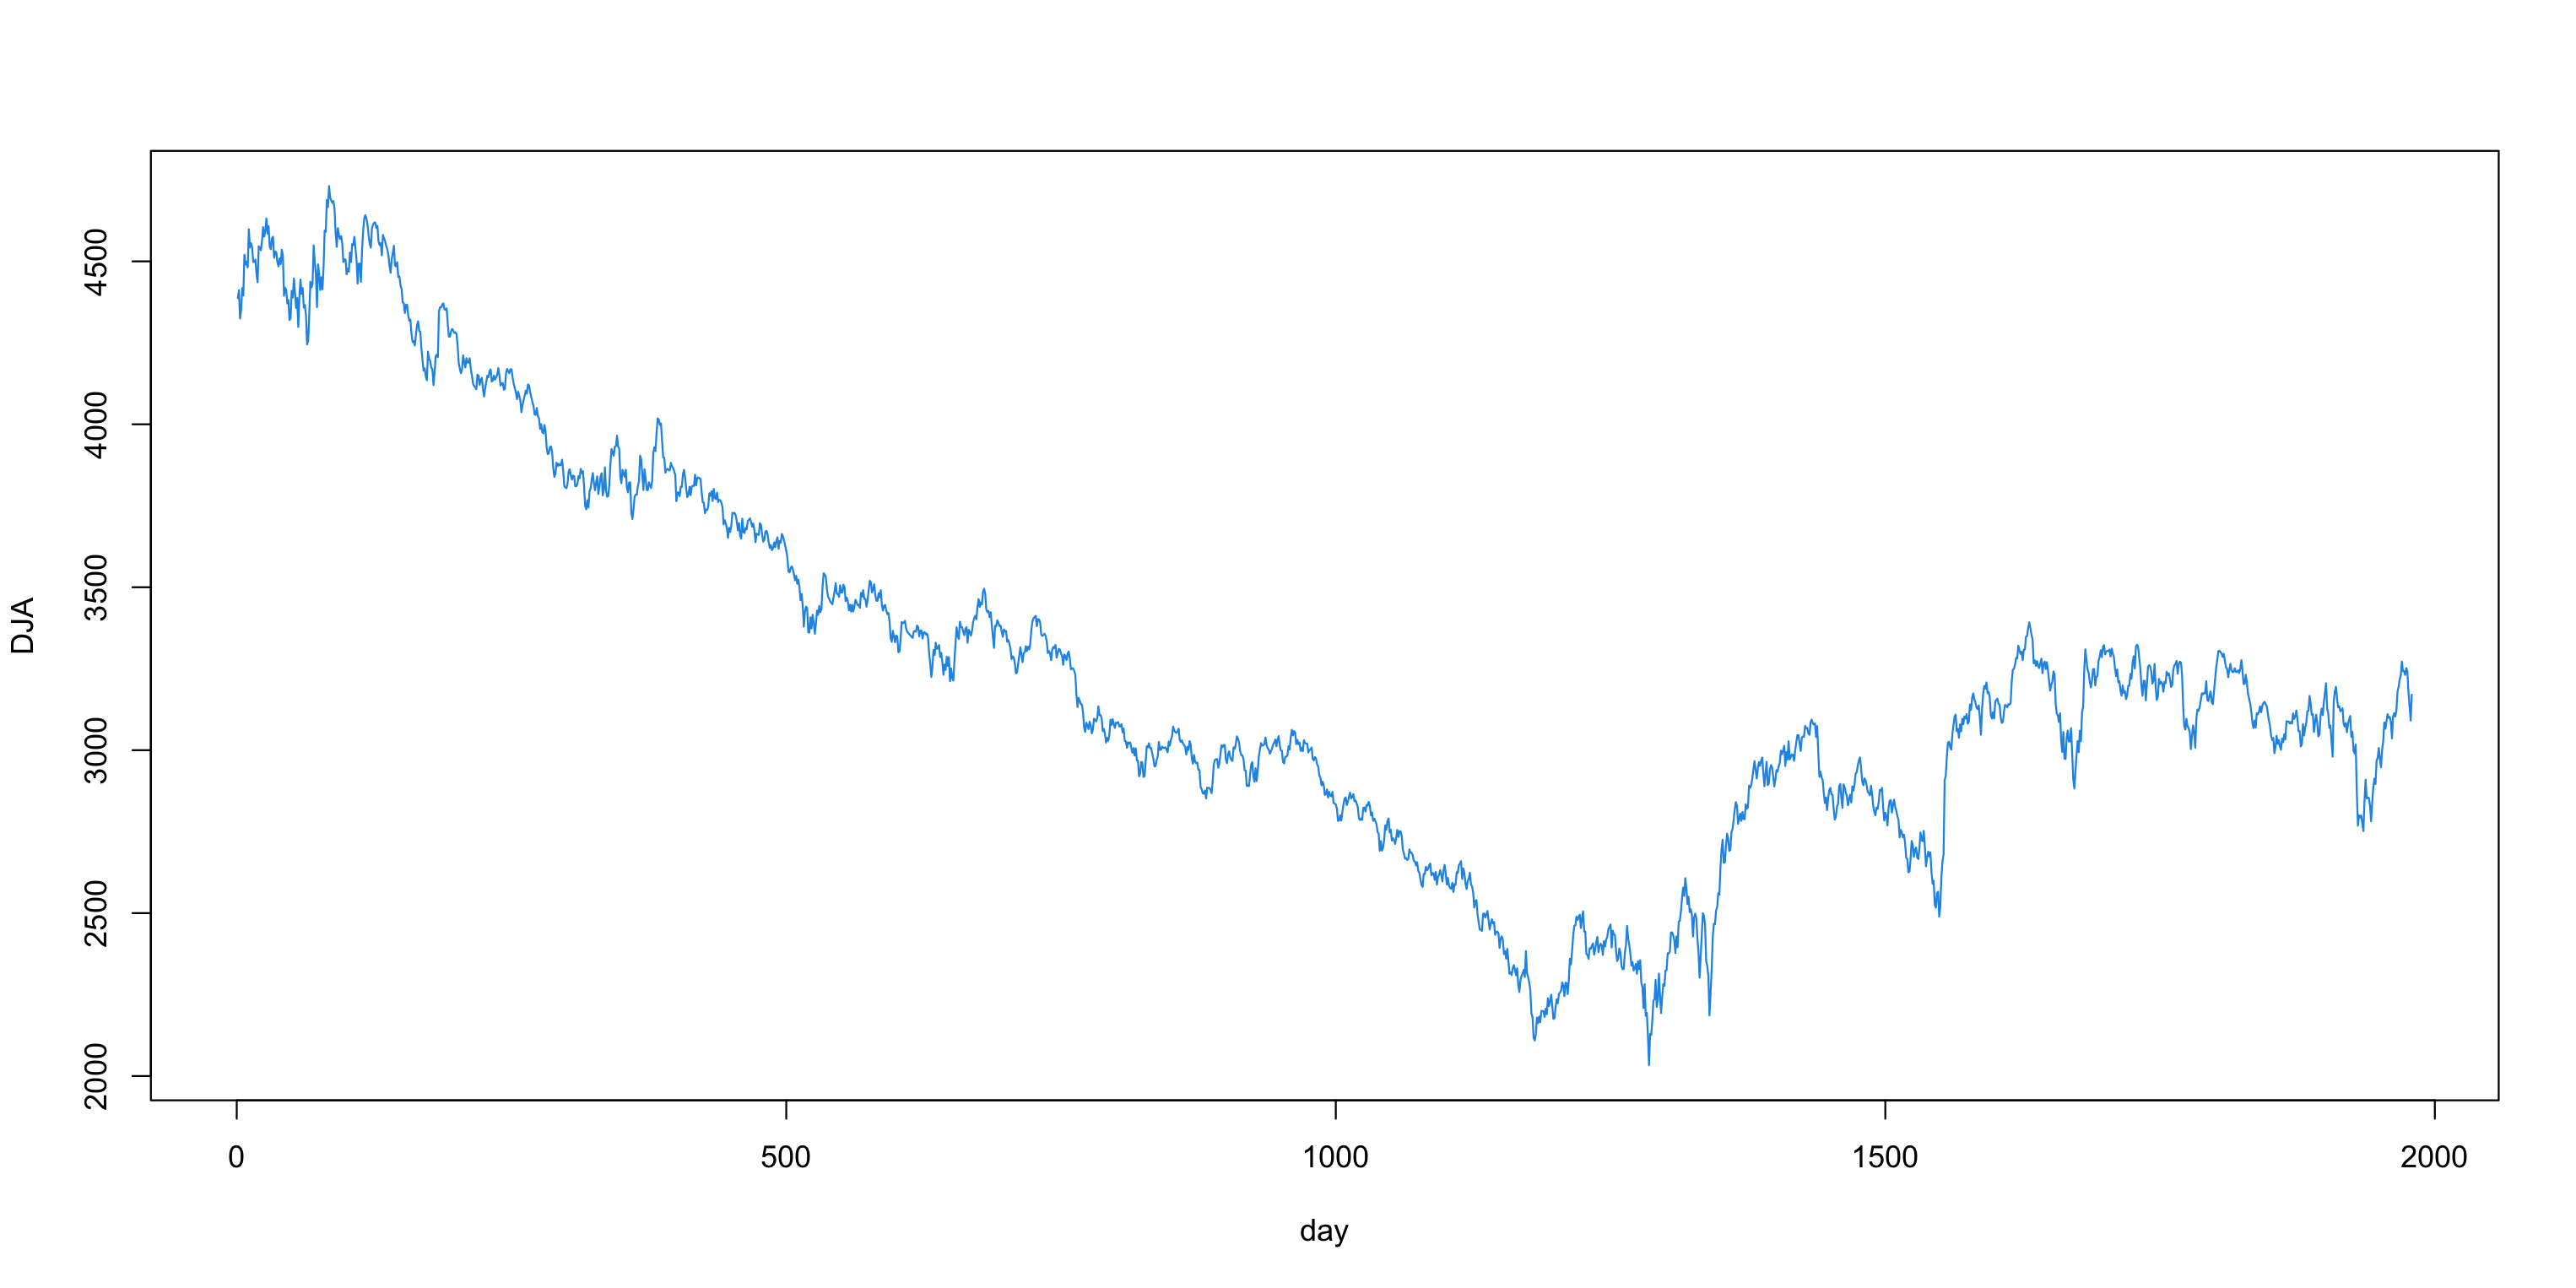

In [45]:
dja <- read.csv("dja.csv")$DJ
n <- 1979
plot(dja, type="l", col=4, xlab="day", ylab="DJA")

In [46]:
summary(ARdj <- glm(dja[2:n] ~ dja[1:(n-1)]))


Call:
glm(formula = dja[2:n] ~ dja[1:(n - 1)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-144.00   -18.55    -1.02    19.02   226.86  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.05419    4.00385   1.762   0.0782 .  
dja[1:(n - 1)]  0.99764    0.00121 824.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1032.185)

    Null deviance: 703375188  on 1977  degrees of freedom
Residual deviance:   2039598  on 1976  degrees of freedom
AIC: 19344

Number of Fisher Scoring iterations: 2


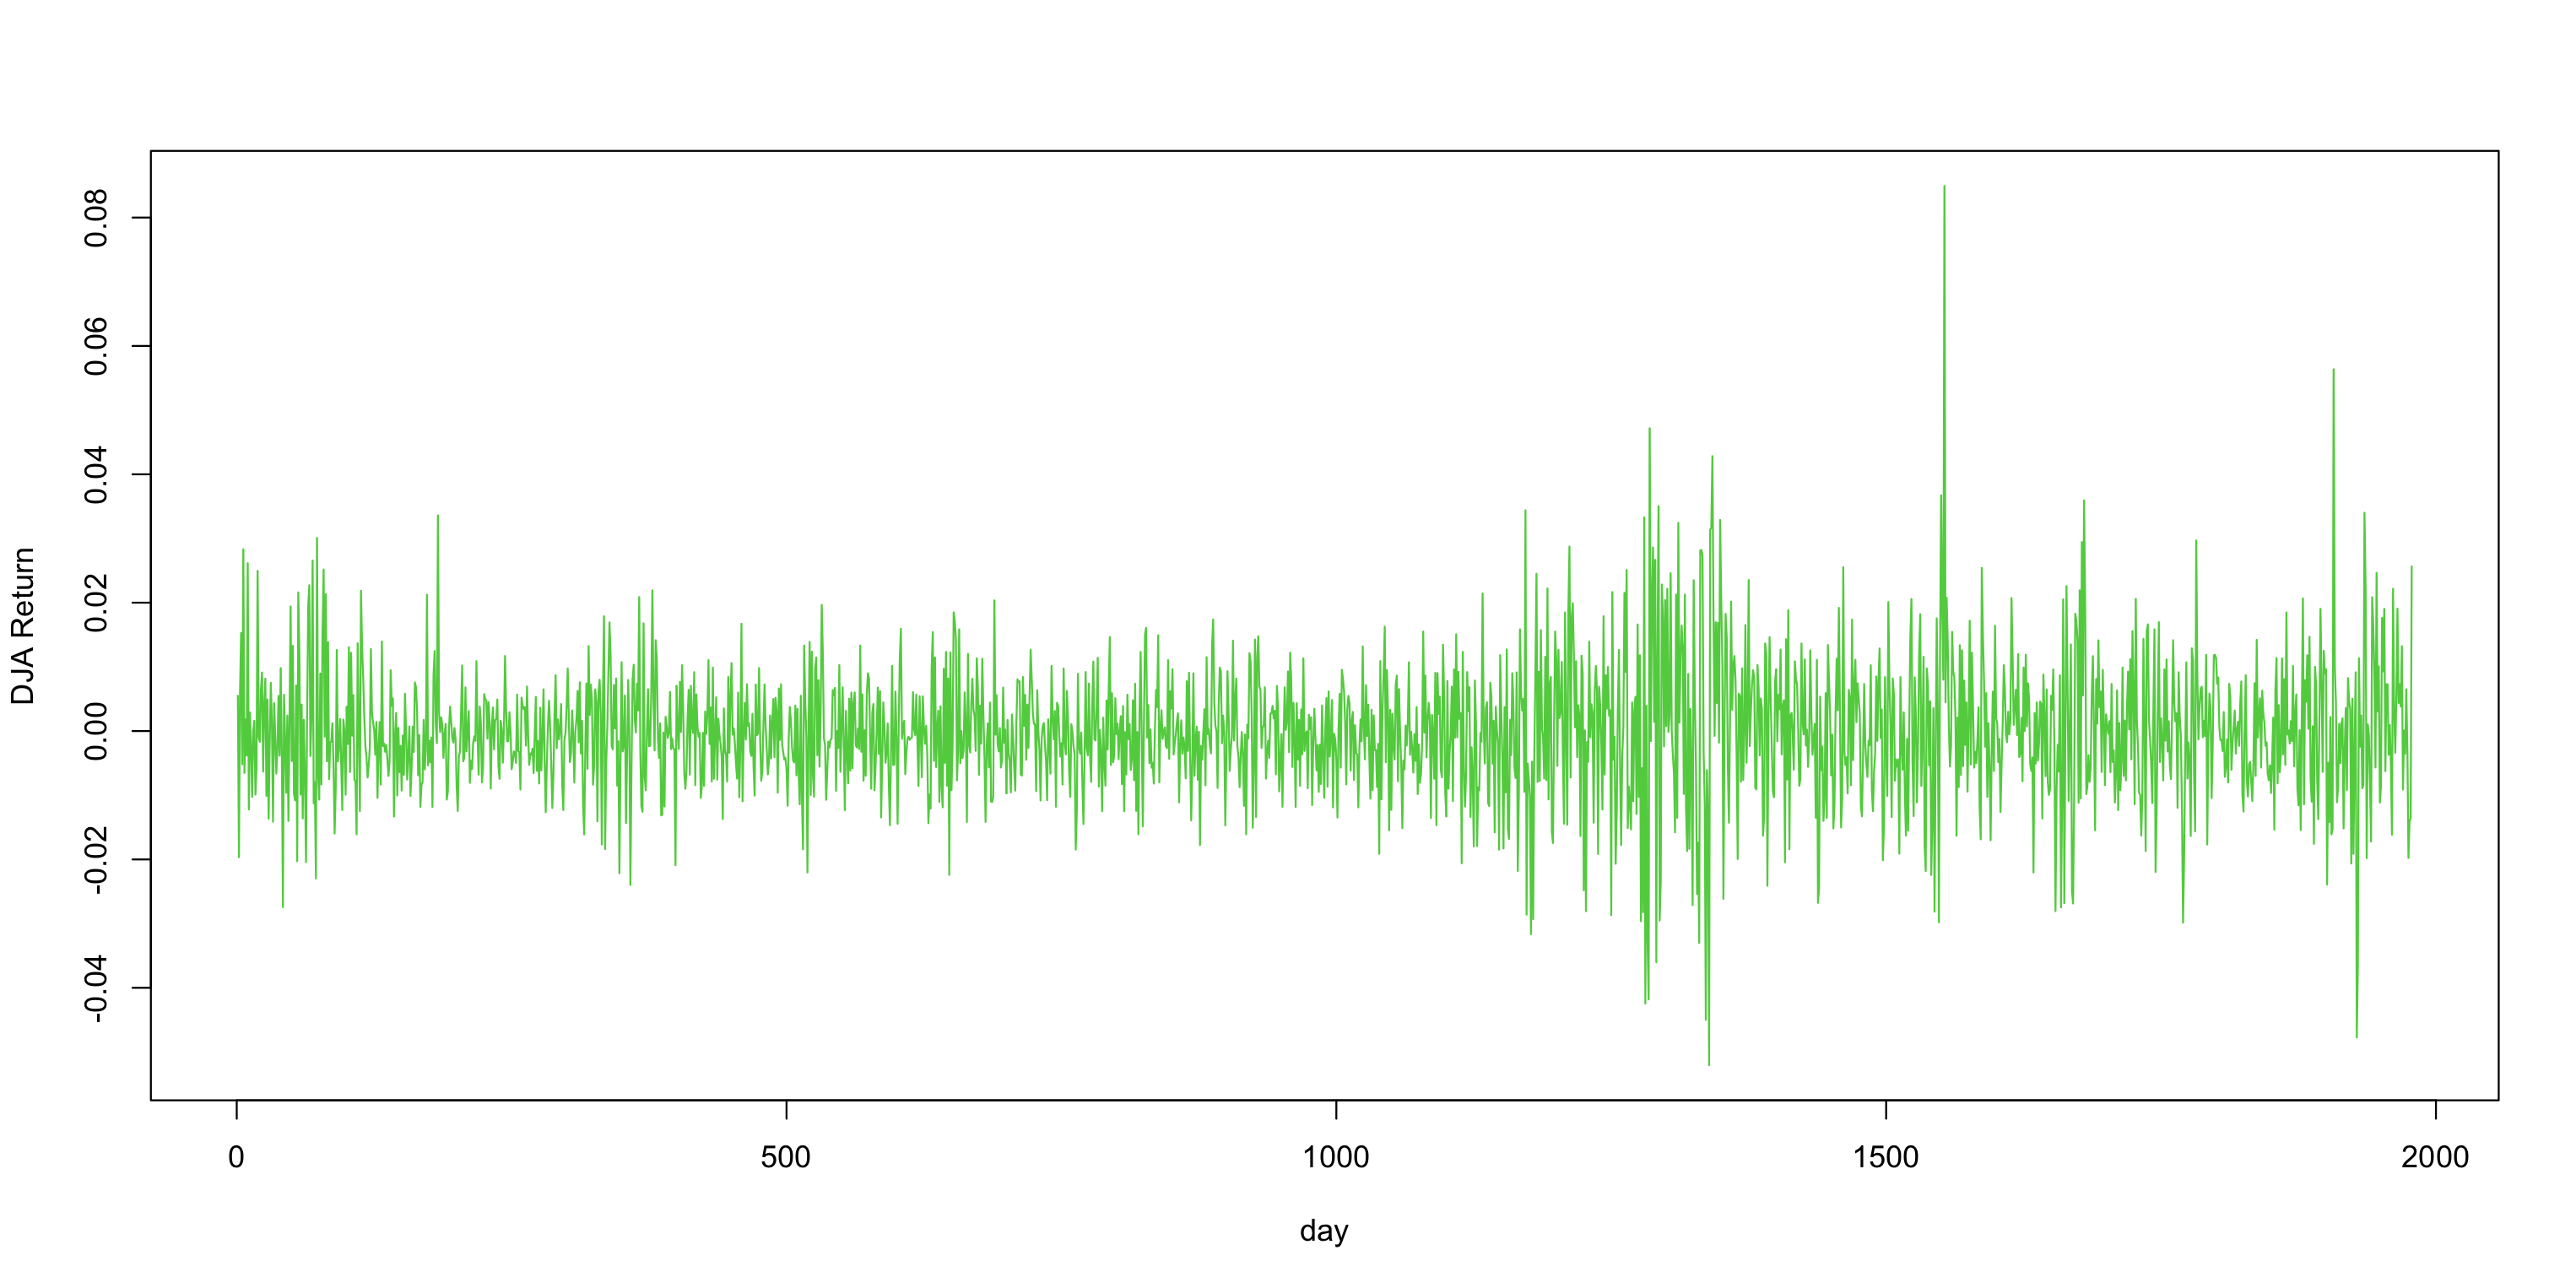

In [47]:
returns <- (dja[2:n]-dja[1:(n-1)])/dja[1:(n-1)]
plot(returns, type="l", col=3, xlab="day", ylab="DJA Return")

In [48]:
summary( glm(returns[2:n] ~ returns[1:(n-1)]) )


Call:
glm(formula = returns[2:n] ~ returns[1:(n - 1)])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.052138  -0.005867  -0.000388   0.005707   0.085140  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)        -0.0001138  0.0002363  -0.482    0.630
returns[1:(n - 1)] -0.0144411  0.0225321  -0.641    0.522

(Dispersion parameter for gaussian family taken to be 0.000110363)

    Null deviance: 0.21801  on 1976  degrees of freedom
Residual deviance: 0.21797  on 1975  degrees of freedom
  (1 observation deleted due to missingness)
AIC: -12399

Number of Fisher Scoring iterations: 2


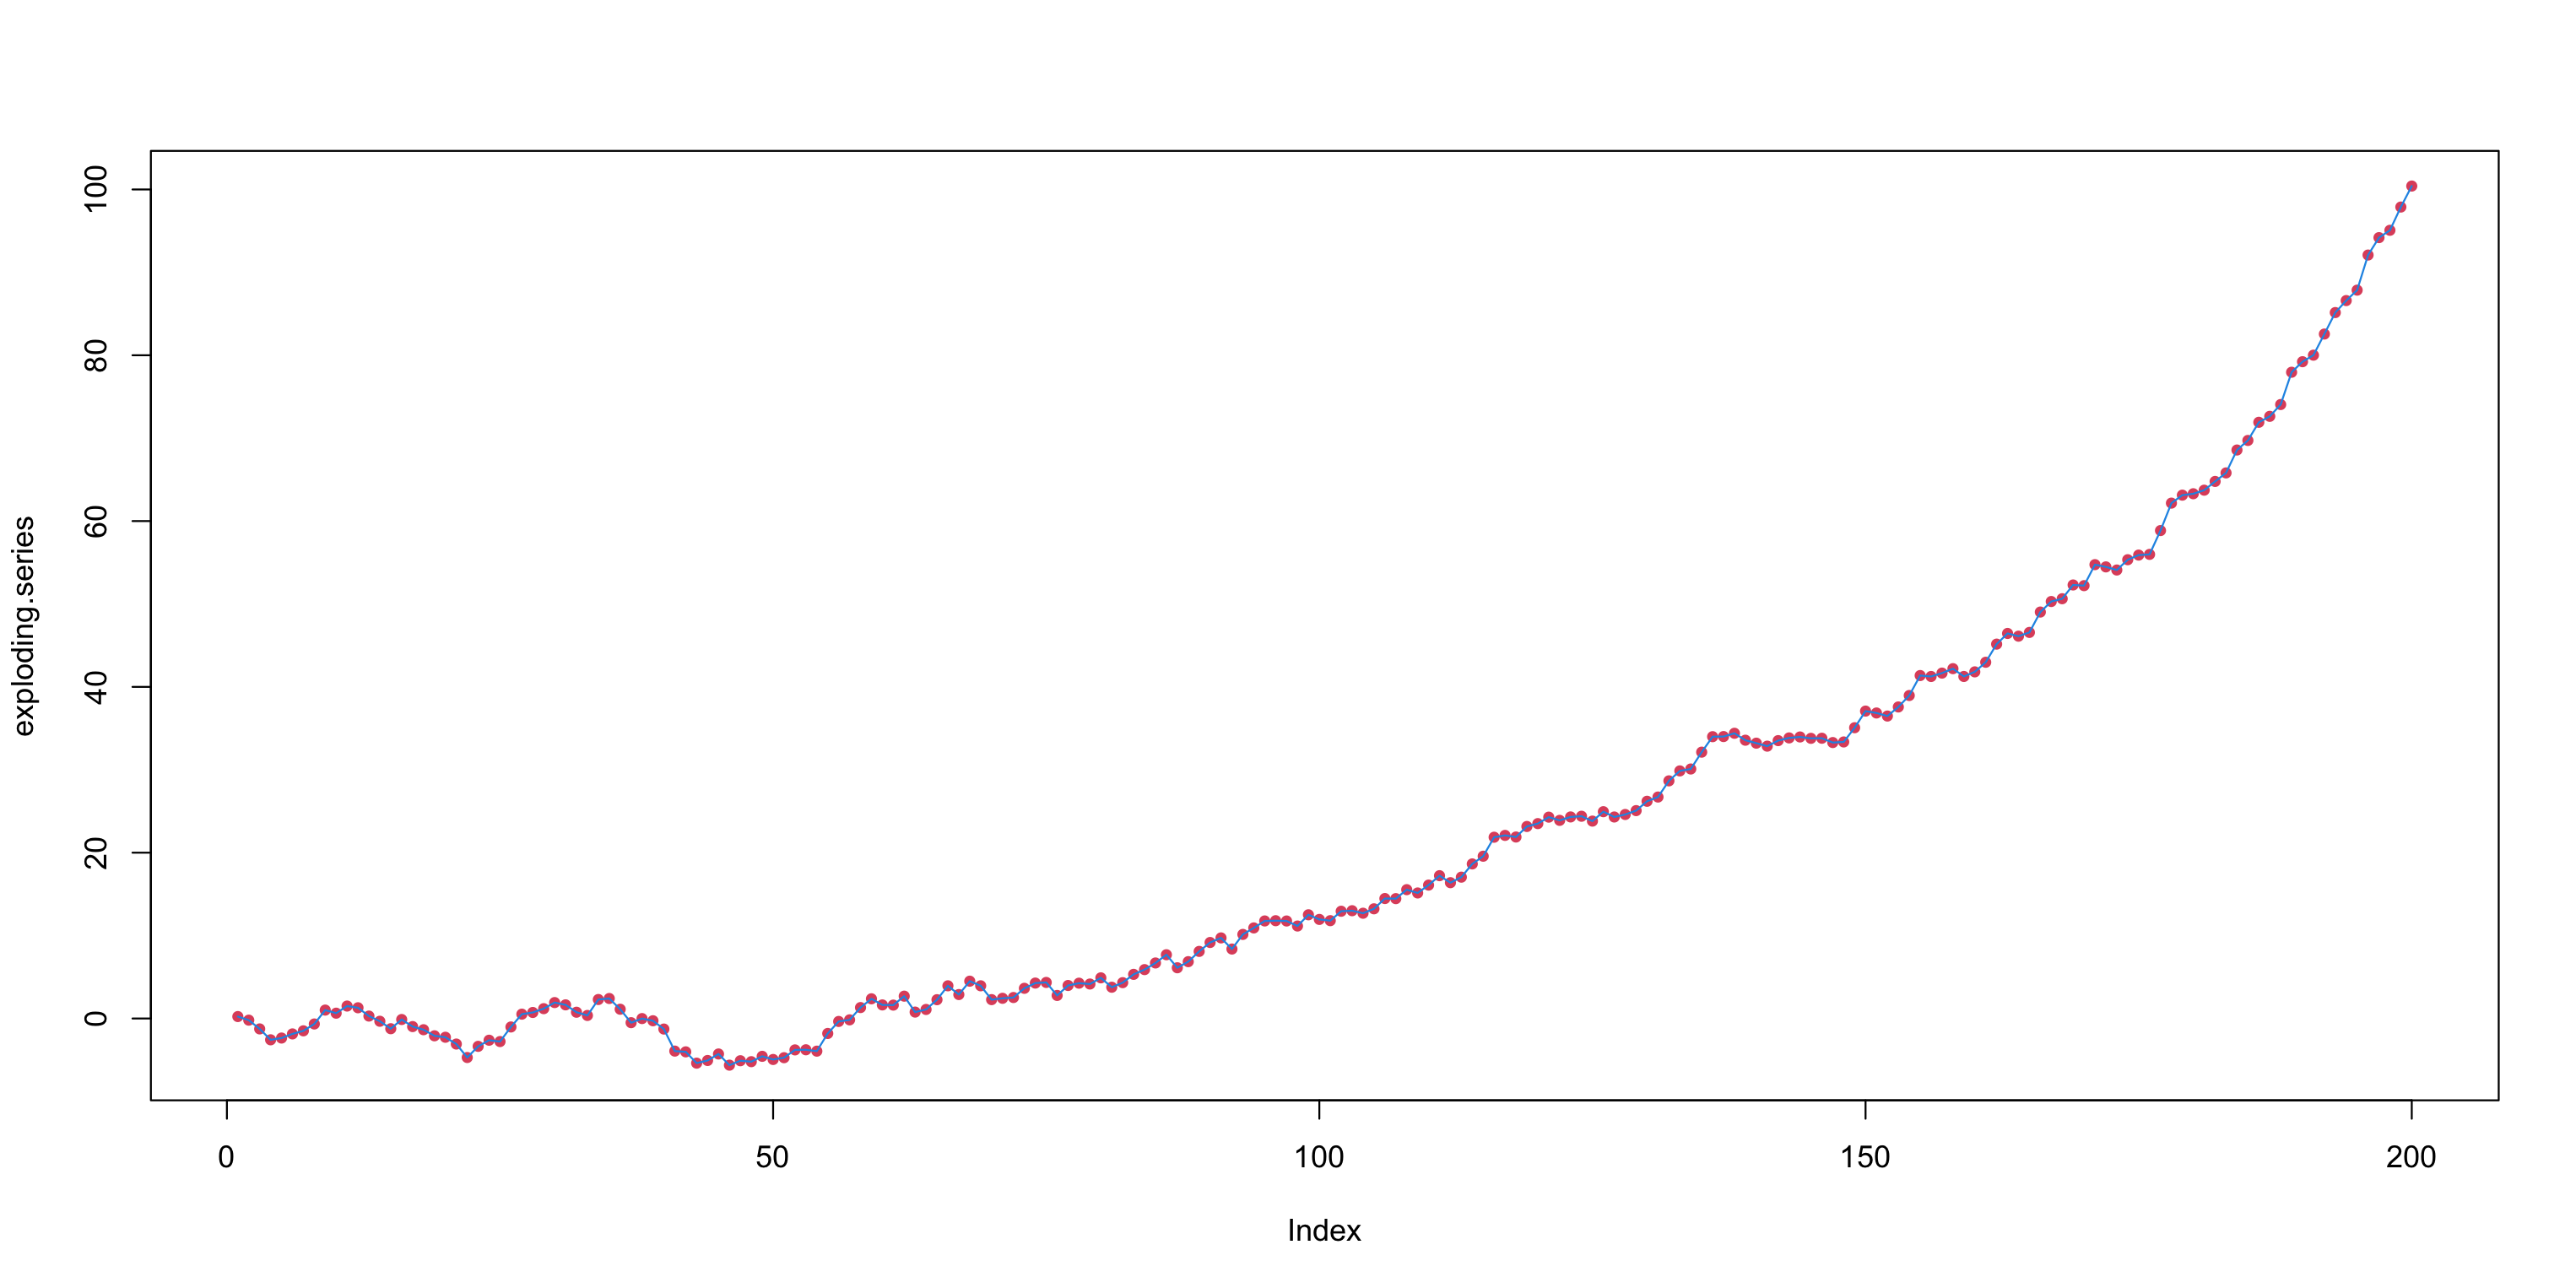

In [49]:
exploding.series <- rnorm(1)
for(i in 2:200){ exploding.series <- c(exploding.series, 1.02*exploding.series[i-1]+rnorm(1)) }
plot(exploding.series, pch=20, col=2)
lines(exploding.series, col=4)

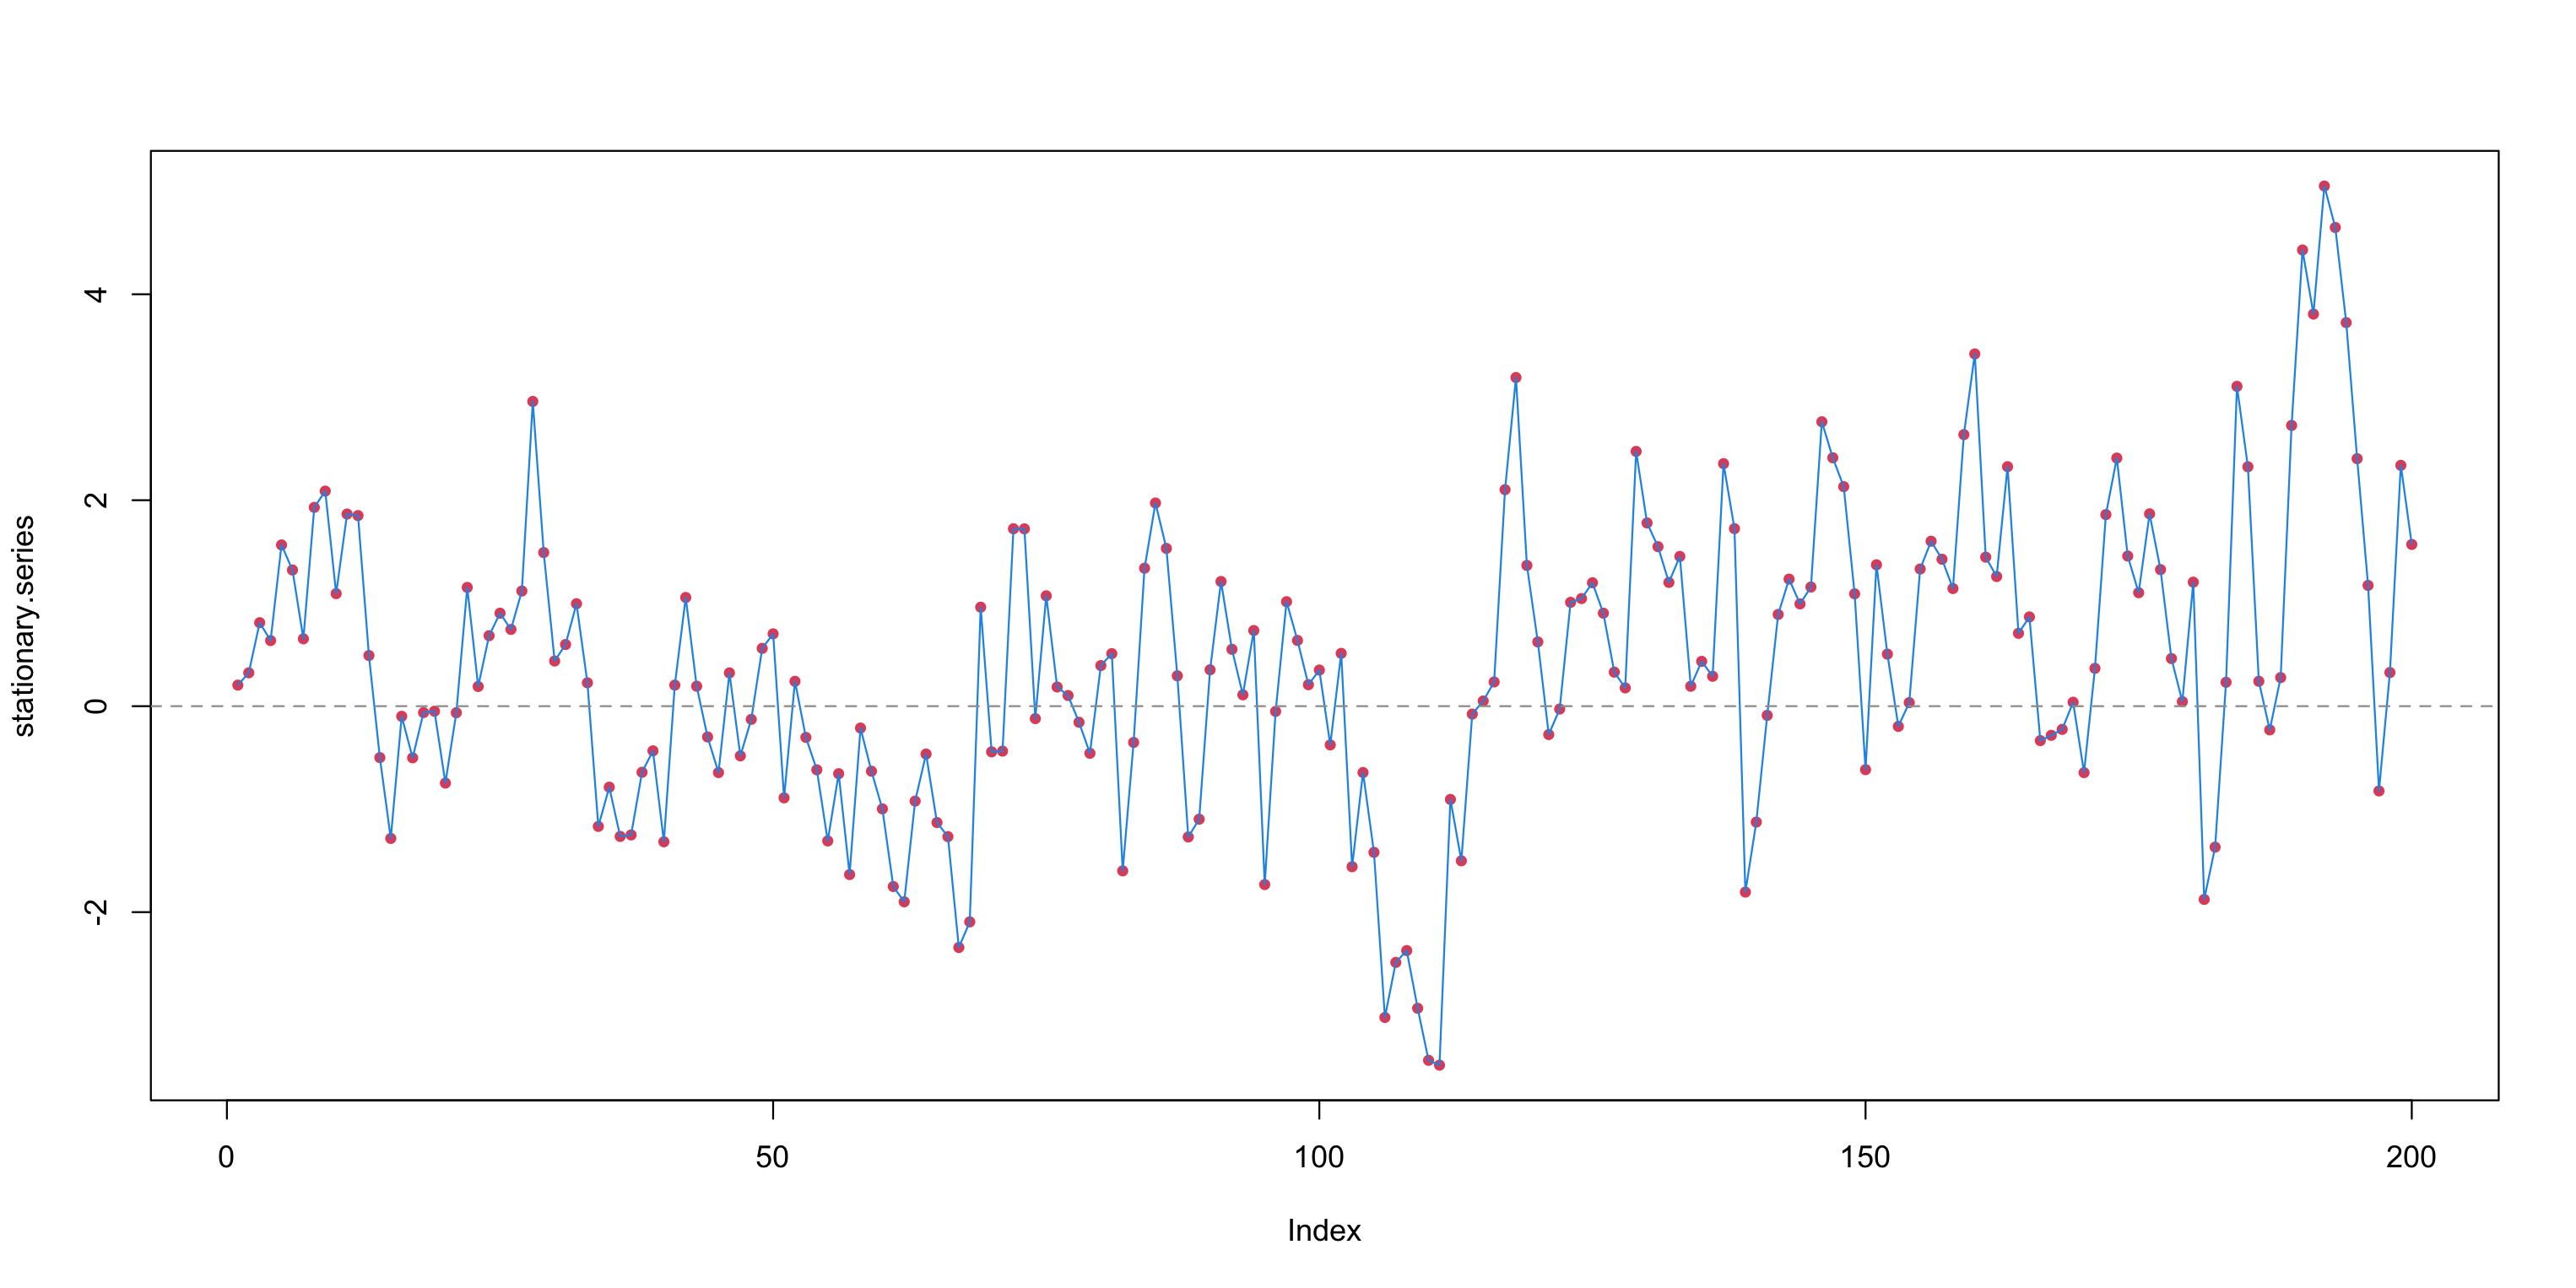

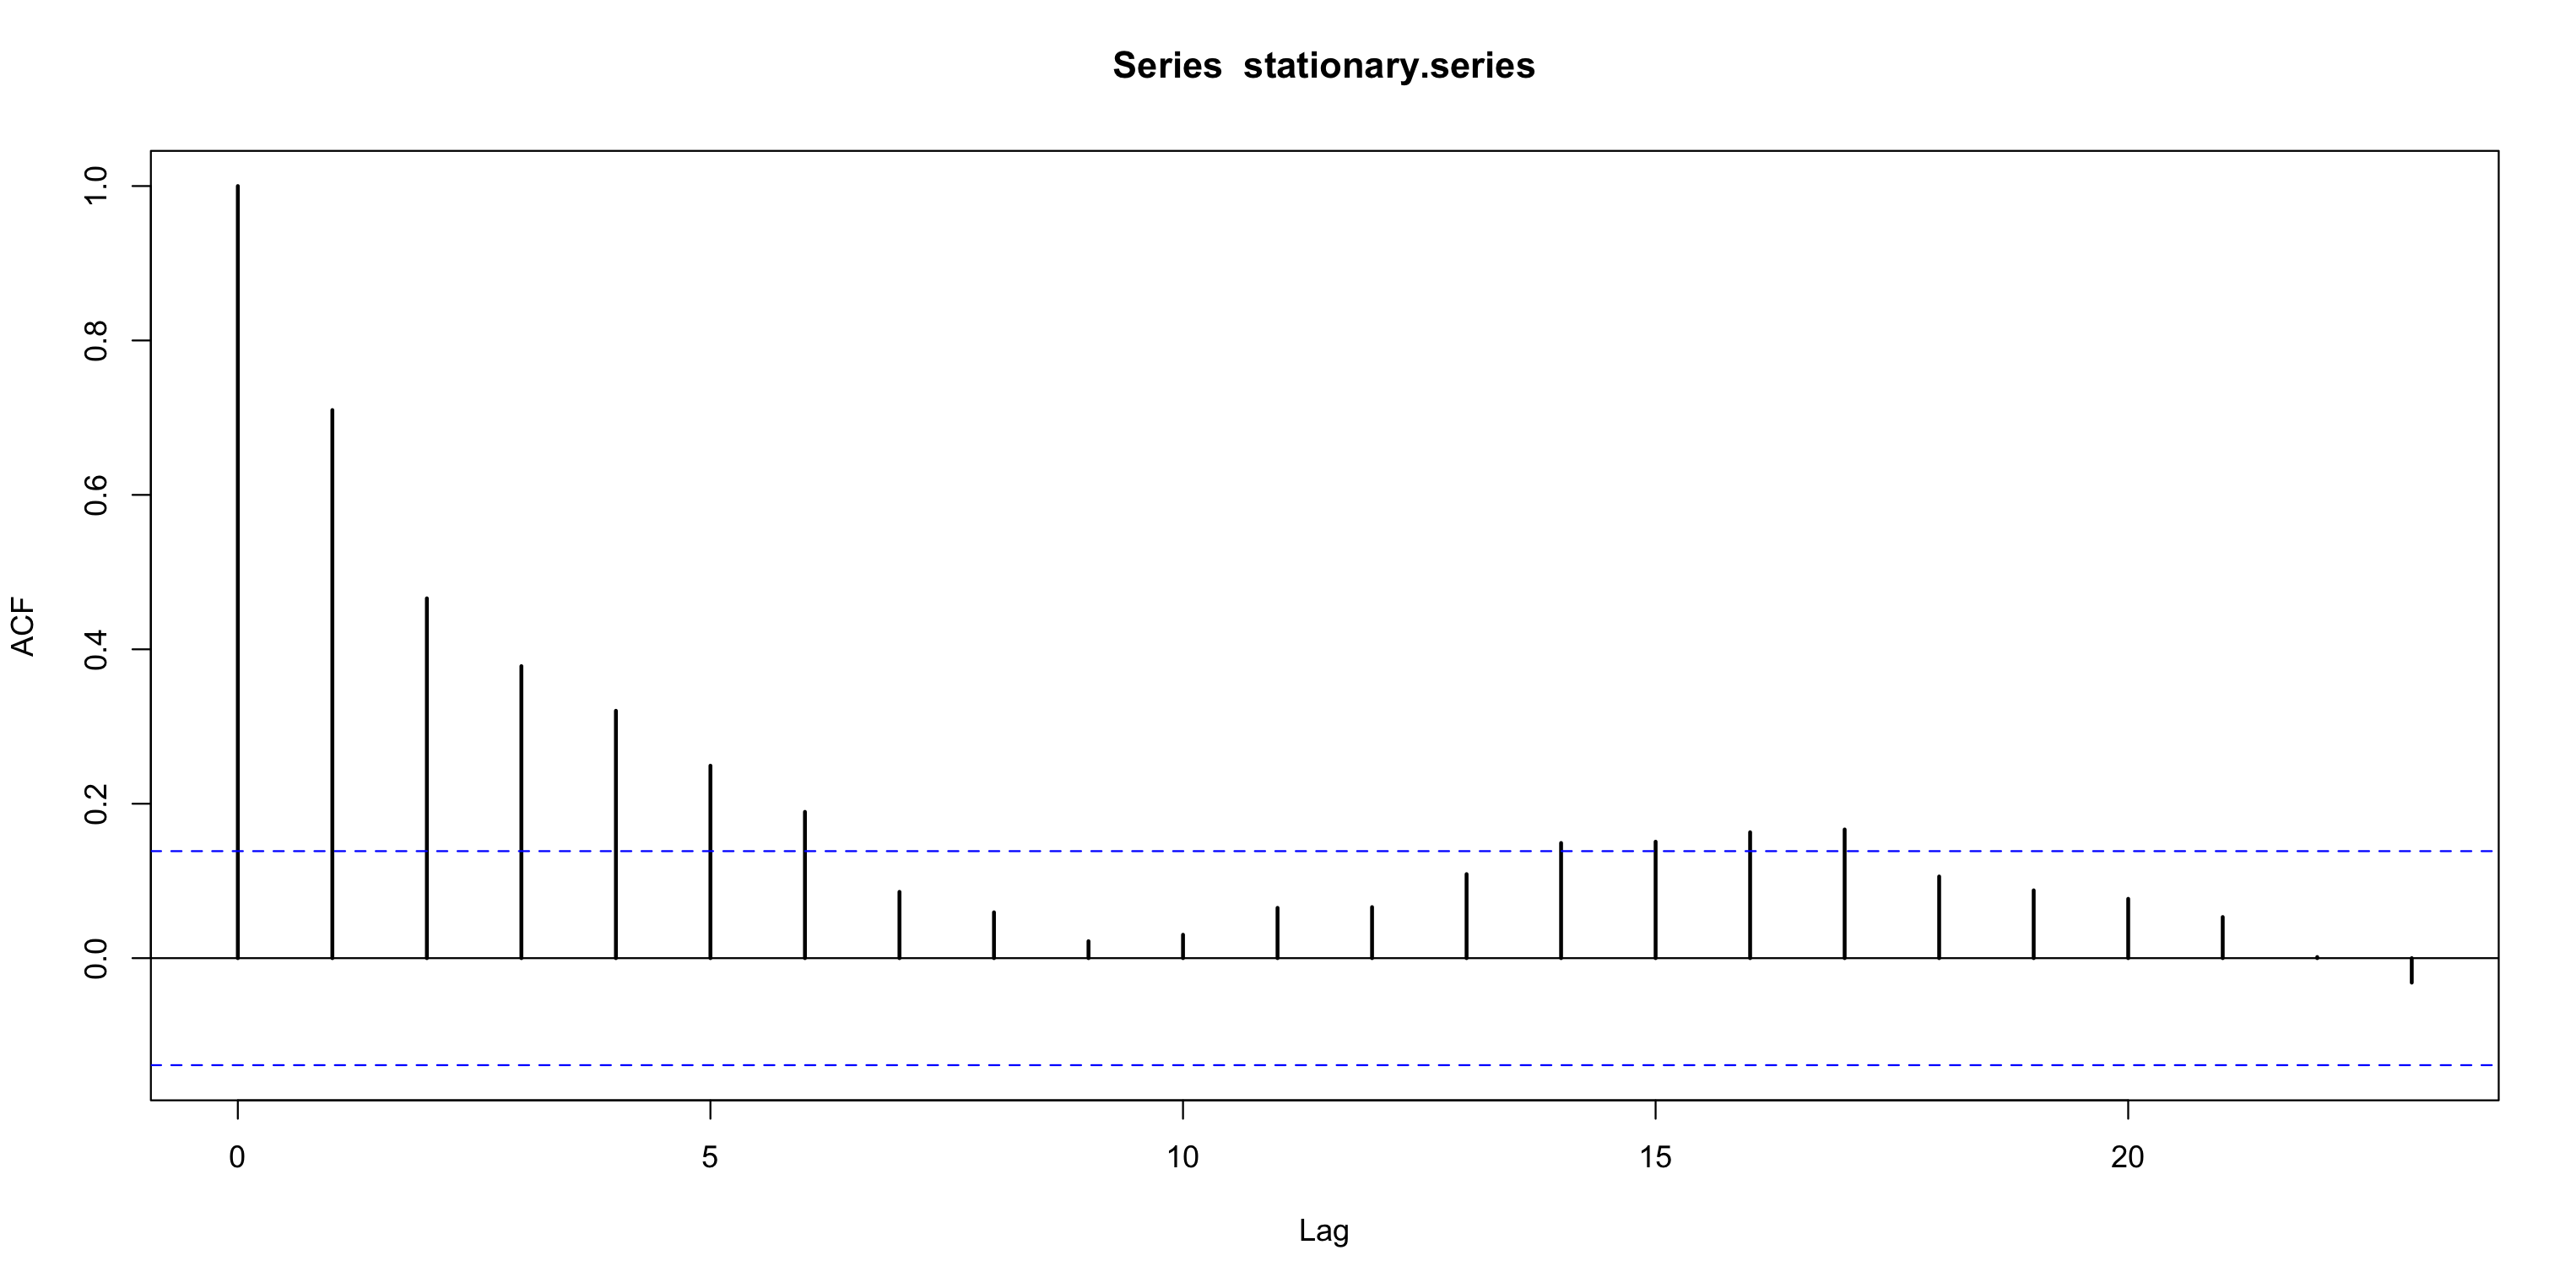

In [50]:
stationary.series <- rnorm(1)
for(i in 2:200){ stationary.series <- c(stationary.series, 0.8*stationary.series[i-1]+rnorm(1)) }
plot(stationary.series, pch=20, col=2)
lines(stationary.series, col=4)
abline(h=0, lty=2, col=8)
acf(stationary.series, lwd=2)

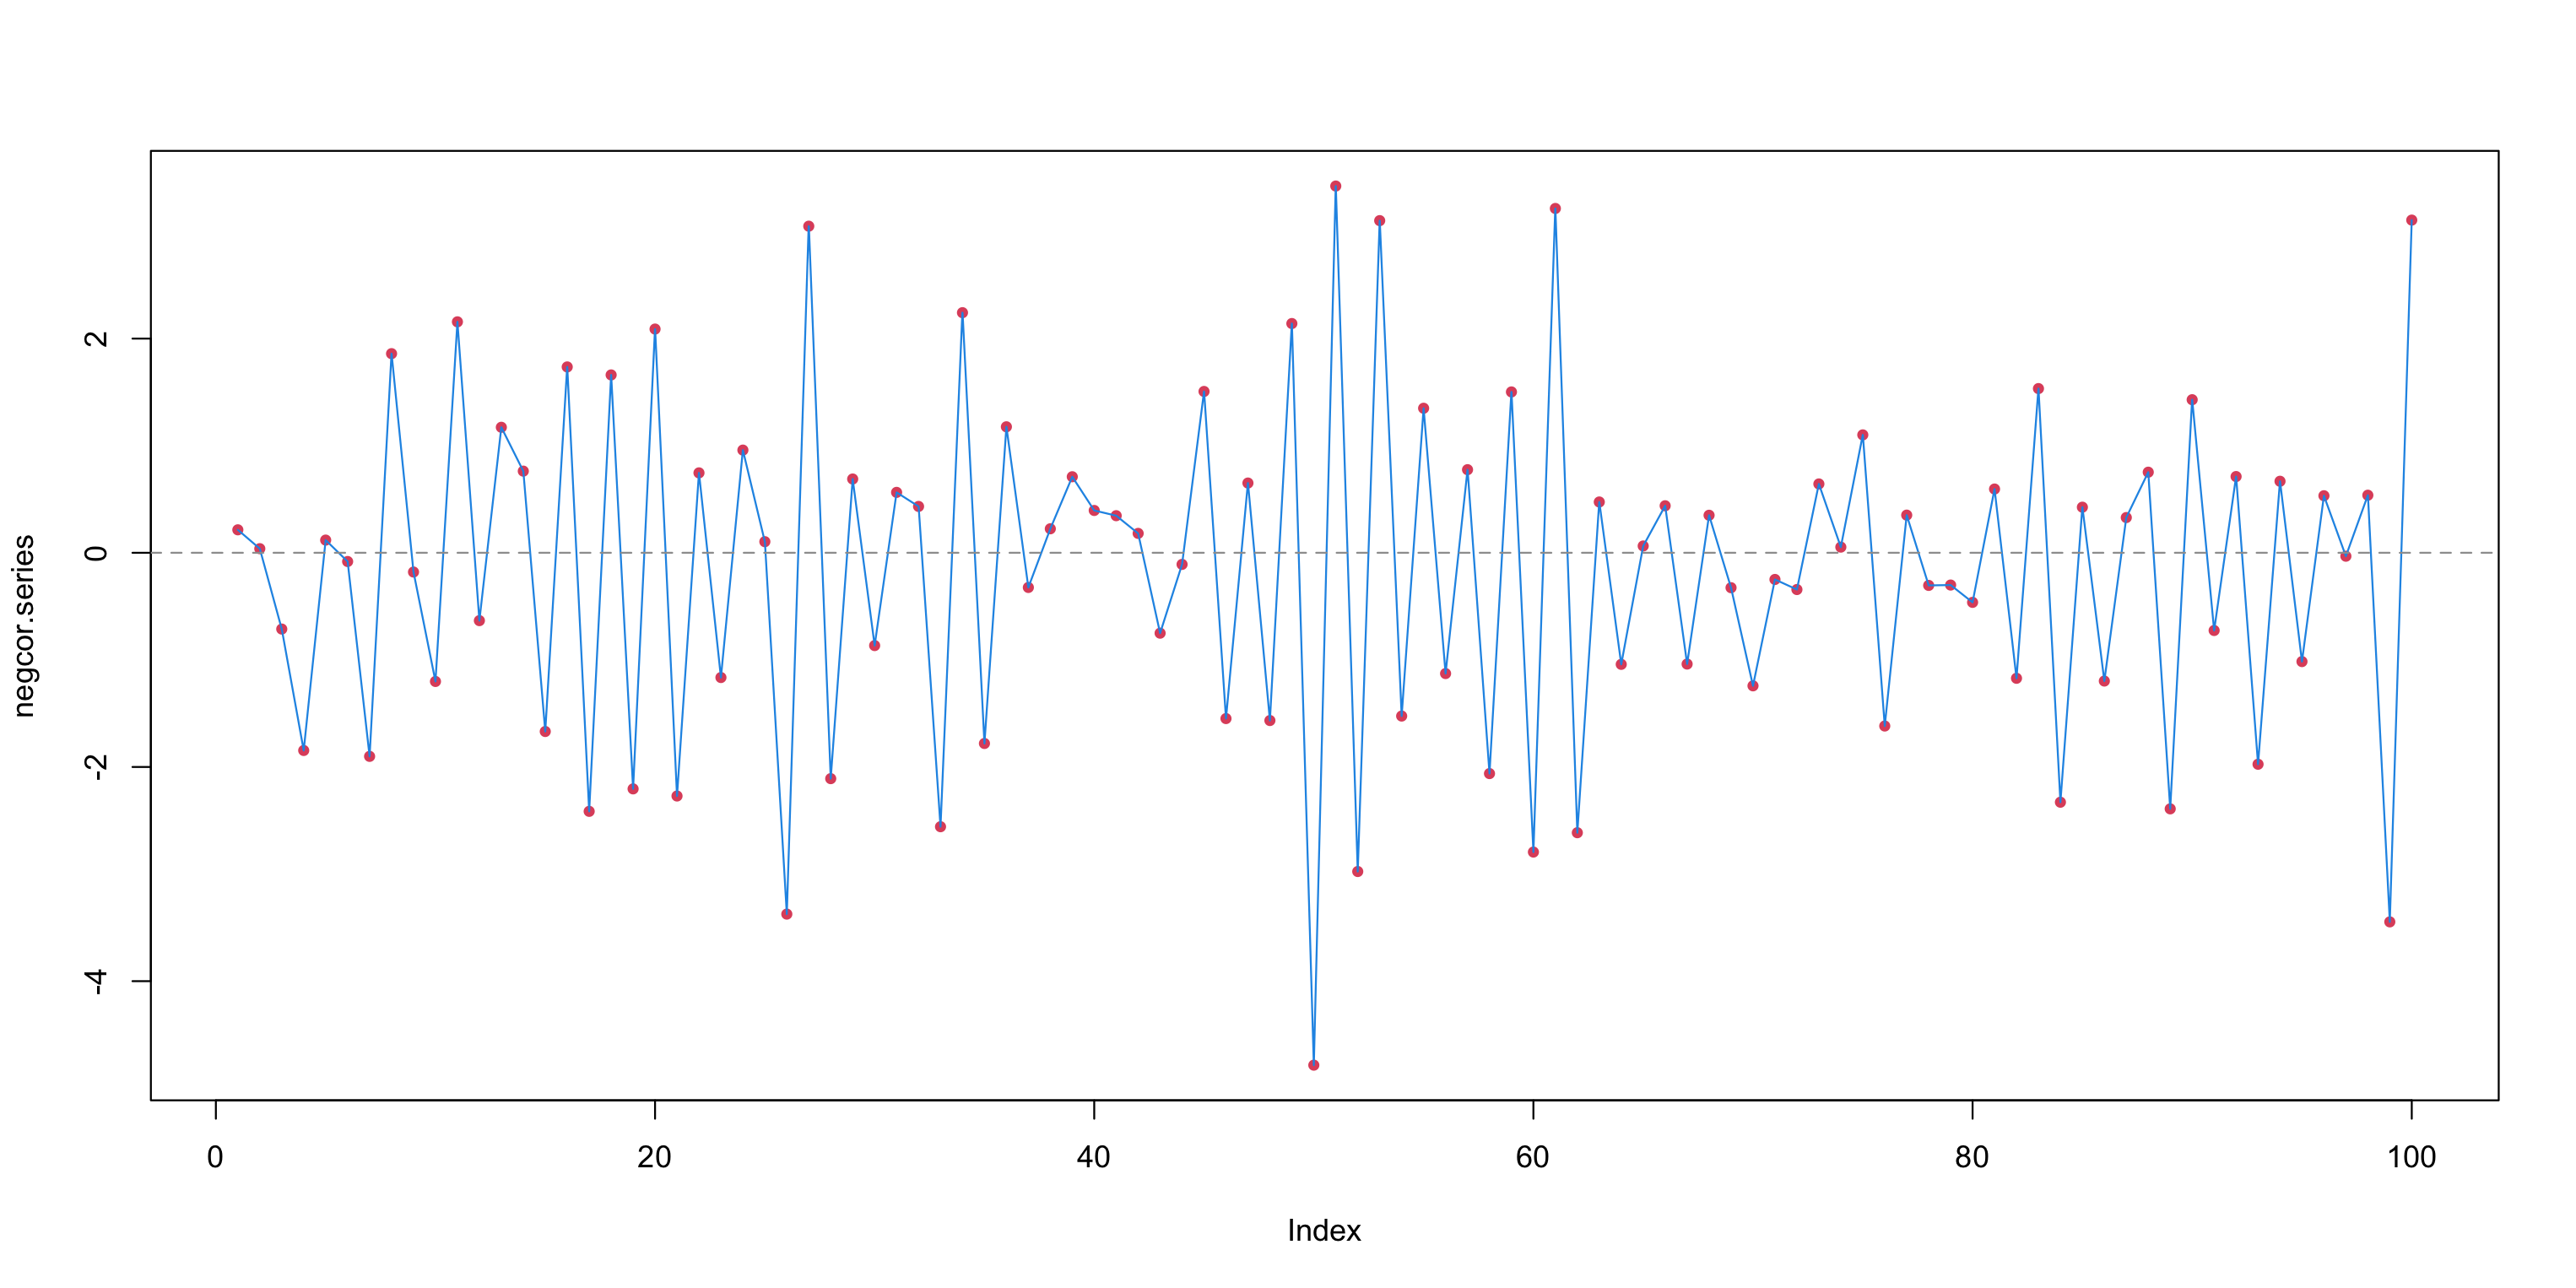

In [51]:
negcor.series <- rnorm(1)
for(i in 2:100){ negcor.series <- c(negcor.series, -0.8*negcor.series[i-1]+rnorm(1)) }
plot(negcor.series, pch=20, col=2)
lines(negcor.series, col=4)
abline(h=0, lty=2, col=8)